In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sklearn
%matplotlib inline 
import klib
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## Expanding Width of Notebook For Better View

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Set Max Rows and Columns Display for More Details

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the Data

In [5]:
df = pd.read_csv('./prosperLoanData.csv')

## Basic Data Exploration

In [6]:
df.head()

ListingKey  ListingNumber            ListingCreationDate CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup                 GroupKey               DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000           C    36  Completed  2009-08-14 00:00:00      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            CO          Other    Self-employed                       2.0                 True              True                      NaN  2007-08-26 18:41:46.780000000                  640.0                  659.0     2001-10-11 00:00:00                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000         NaN    36    Current                  NaN      0.12016        0.0920       0.0820                  0.07960         0.0249          0.05470                      6.0                     A           7.0                          2            CO   Professional         Employed                      44.0                False             False                      NaN            2014-02-27 08:28:14                  680.0                  699.0     1996-03-18 00:00:00                14.0             14.0                        29.0                     13                        389.0                   3.0             5.0                   0.0               0.0                      0.0                       1.0                        0.0                  3989.0                 0.21                  10266.0         29.0                                1.00                      2.0               0.18  $50,000-74,999   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000          HR    36  Completed  2009-12-17 00:00:00      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            GA          Other    Not available                       NaN                False              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000                  480.0                  499.0     2002-07-27 00:00:00                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed   
3  0EF5356002482

In [7]:
# Checking the dimesion of the data
df.shape

(113937, 81)

In [8]:
# Checking columns names
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6

In [9]:
# Info about the data and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [10]:
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

## Remove Duplicates

In [11]:
df.drop_duplicates(inplace=True)

## Dropping unncessesary columns

In [12]:
df.drop(['ListingKey','ListingNumber','BorrowerState','GroupKey','LoanKey','LoanNumber','MemberKey'],axis=1,inplace=True)

In [13]:
# Checking the null values data types
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

CreditGrade / object
ClosedDate / object
BorrowerAPR / float64
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperRating (Alpha) / object
ProsperScore / float64
Occupation / object
EmploymentStatus / object
EmploymentStatusDuration / float64
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
FirstRecordedCreditLine / object
CurrentCreditLines / float64
OpenCreditLines / float64
TotalCreditLinespast7years / float64
InquiriesLast6Months / float64
TotalInquiries / float64
CurrentDelinquencies / float64
AmountDelinquent / float64
DelinquenciesLast7Years / float64
PublicRecordsLast10Years / float64
PublicRecordsLast12Months / float64
RevolvingCreditBalance / float64
BankcardUtilization / float64
AvailableBankcardCredit / float64
TotalTrades / float64
TradesNeverDelinquent (percentage) / float64
TradesOpenedLast6Months / float64
DebtToIncomeRatio / float64
TotalProsperLoans / float64
TotalProsperPaymentsBi

## Changing Data types

In [14]:
# Converting the above column into date and time
def convert_date_time_cols(df, cols):
    for col in cols:
        # Convert the column to datetime datatype
        df[col] = pd.to_datetime(df[col], errors='coerce')

        # For rows where the column contains date and time, keep the original column as datetime datatype
        df[col] = df[col].where(df[col].dt.time != pd.Timestamp.min.time(), df[col].dt.date)

    return df

In [15]:
convert_date_time_cols(df, ['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate'])

ListingCreationDate CreditGrade  Term              LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)               Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup        DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  \
0      2007-08-26 19:09:29.263           C    36               Completed 2009-08-14      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0                    Other    Self-employed                       2.0                 True              True 2007-08-26 18:41:46.780                  640.0                  659.0              2001-10-11                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999              True          3083.333333                NaN   
1      2014-02-27 08:28:07.900         NaN    36                 Current        NaT      0.12016        0.0920       0.0820                  0.07960         0.0249          0.05470                      6.0                     A           7.0                          2             Professional         Employed                      44.0                False             False 2014-02-27 08:28:14.000                  680.0                  699.0              1996-03-18                14.0             14.0                        29.0                     13                        389.0                   3.0             5.0                   0.0               0.0                      0.0                       1.0                        0.0                  3989.0                 0.21                  10266.0         29.0                                1.00                      2.0               0.18  $50,000-74,999              True          6125.000000                NaN   
2      2007-01-05 15:00:47.090          HR    36               Completed 2009-12-17      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0                    Other    Not available                       NaN                False              True 2007-01-02 14:09:10.060                  480.0                  499.0              2002-07-27                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed              True          2083.333333                NaN   
3      2012-10-22 11:02:35.010         NaN    36                 Current       

In [16]:
# Reconfirming changed datatypes
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

CreditGrade / object
ClosedDate / datetime64[ns]
BorrowerAPR / float64
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperRating (Alpha) / object
ProsperScore / float64
Occupation / object
EmploymentStatus / object
EmploymentStatusDuration / float64
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
FirstRecordedCreditLine / datetime64[ns]
CurrentCreditLines / float64
OpenCreditLines / float64
TotalCreditLinespast7years / float64
InquiriesLast6Months / float64
TotalInquiries / float64
CurrentDelinquencies / float64
AmountDelinquent / float64
DelinquenciesLast7Years / float64
PublicRecordsLast10Years / float64
PublicRecordsLast12Months / float64
RevolvingCreditBalance / float64
BankcardUtilization / float64
AvailableBankcardCredit / float64
TotalTrades / float64
TradesNeverDelinquent (percentage) / float64
TradesOpenedLast6Months / float64
DebtToIncomeRatio / float64
TotalProsperLoans / float64
TotalP

## Missing Values Treatment

In [17]:
# Checking total the missing values in each column 
df.isnull().sum()

ListingCreationDate                        0
CreditGrade                            84984
Term                                       0
LoanStatus                                 0
ClosedDate                             58848
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ProsperScore                           29084
ListingCategory (numeric)                  0
Occupation                              3588
EmploymentStatus                        2255
EmploymentStatusDuration                7625
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
DateCreditPulled                           0
CreditScoreRangeLower                    591
CreditScor

In [18]:
# Checking unique data types in order to fill category wise
df.dtypes.unique()

array([dtype('<M8[ns]'), dtype('O'), dtype('int64'), dtype('float64'),
       dtype('bool')], dtype=object)

## Handling the Missing Values

In [19]:
# Fill null values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill null values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object', 'bool', 'M8[ns]' ]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

#### Above the "numerical_cols", "categorical_cols" are index not dataframes

In [20]:
# Reconfirming eihter values have imputed or not
df.isnull().sum()

ListingCreationDate                    0
CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
DateCreditPulled                       0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
FirstRecordedCreditLine                0
CurrentCreditLin

In [21]:
# Checking the unique data types in main data frame for divsion into categorical and numerical parts
print(df.dtypes.unique())

[dtype('<M8[ns]') dtype('O') dtype('int64') dtype('float64') dtype('bool')]


## Dividing the main data frame into Categorical and Numerical values

In [22]:
# creating the categorical columns dataframe 
cat_cols = df.select_dtypes(include = ['object', 'bool'])

In [23]:
# creating the numerical columns dataframe 
num_cols = df.select_dtypes(include=['int', 'float'])

In [24]:
# let's check either all Nan and null values are filled or not
print (num_cols.isna().sum())
cat_cols.isna().sum()

Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLas

CreditGrade               0
LoanStatus                0
ProsperRating (Alpha)     0
Occupation                0
EmploymentStatus          0
IsBorrowerHomeowner       0
CurrentlyInGroup          0
IncomeRange               0
IncomeVerifiable          0
LoanOriginationQuarter    0
dtype: int64

In [25]:
print (df.shape)
print (cat_cols.shape)
print (num_cols.shape)

(113937, 74)
(113937, 10)
(113937, 59)


## Plotting the Box Plots for Outliers Detection

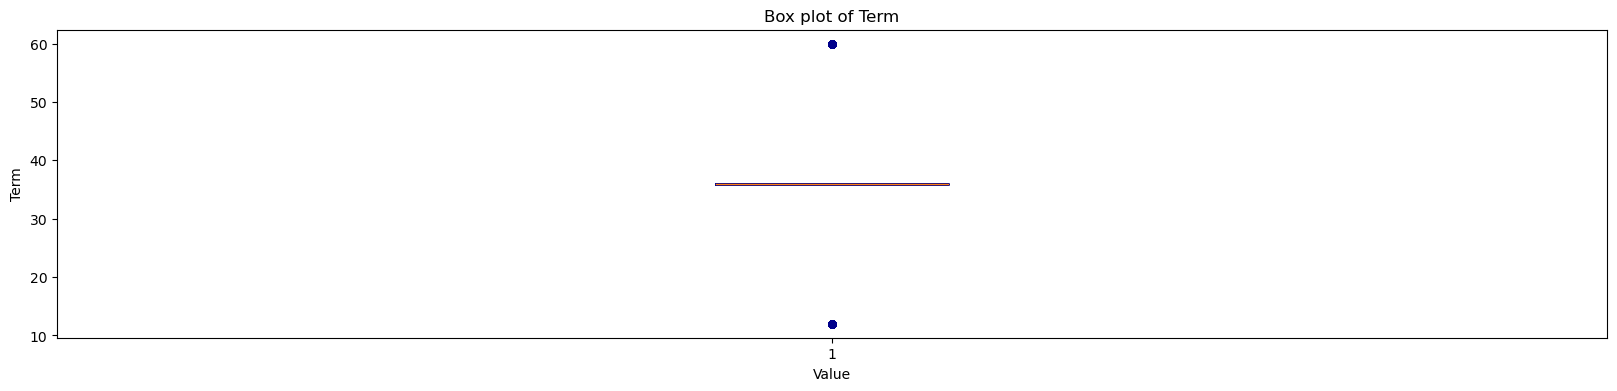

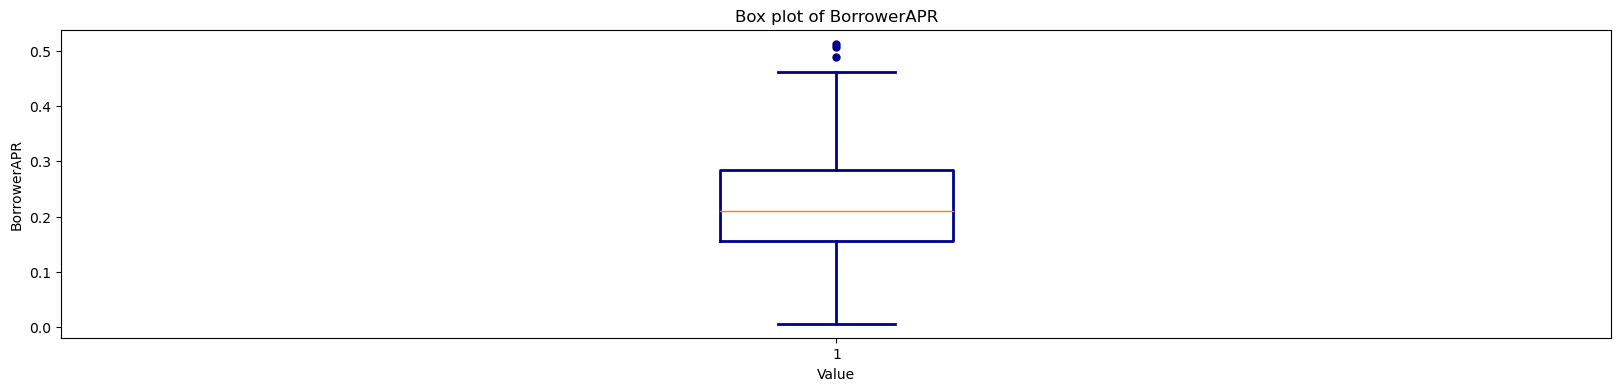

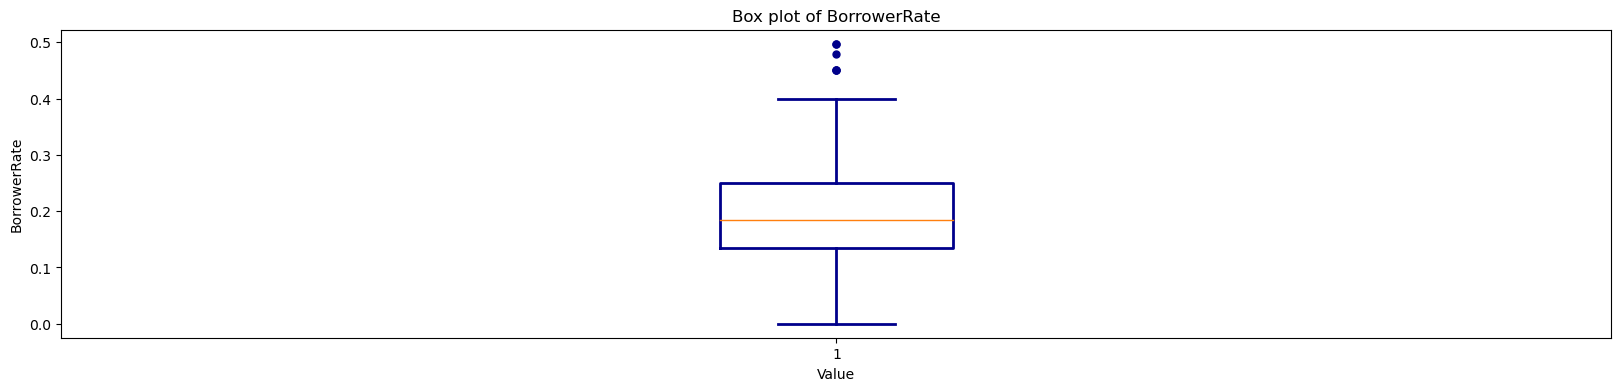

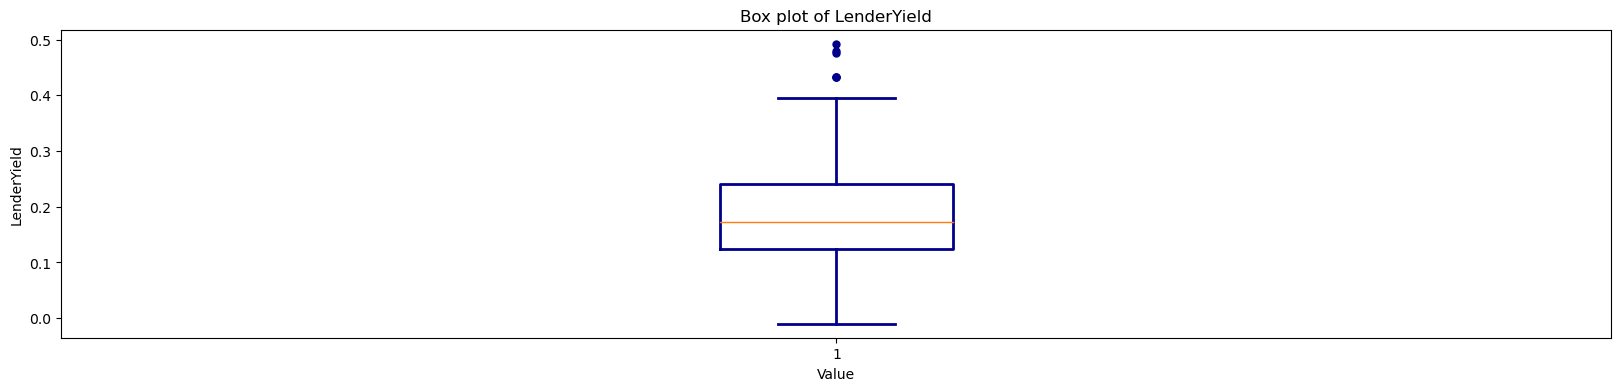

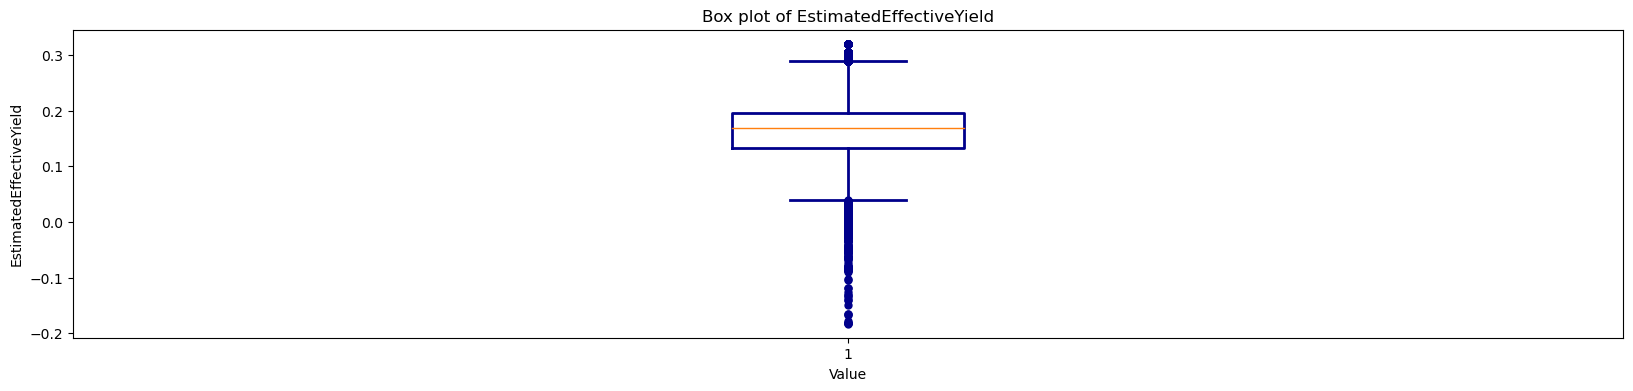

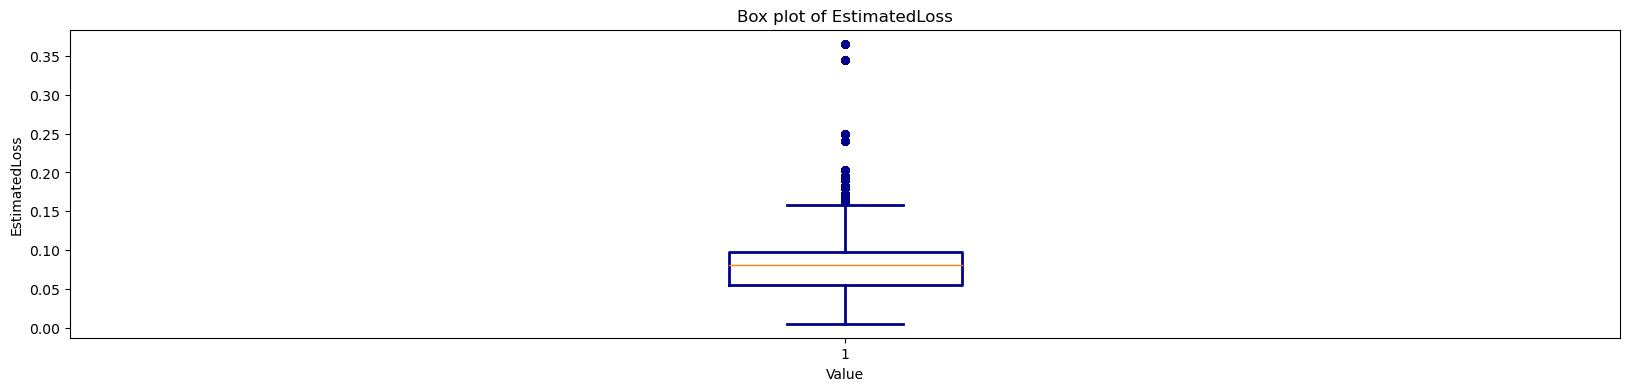

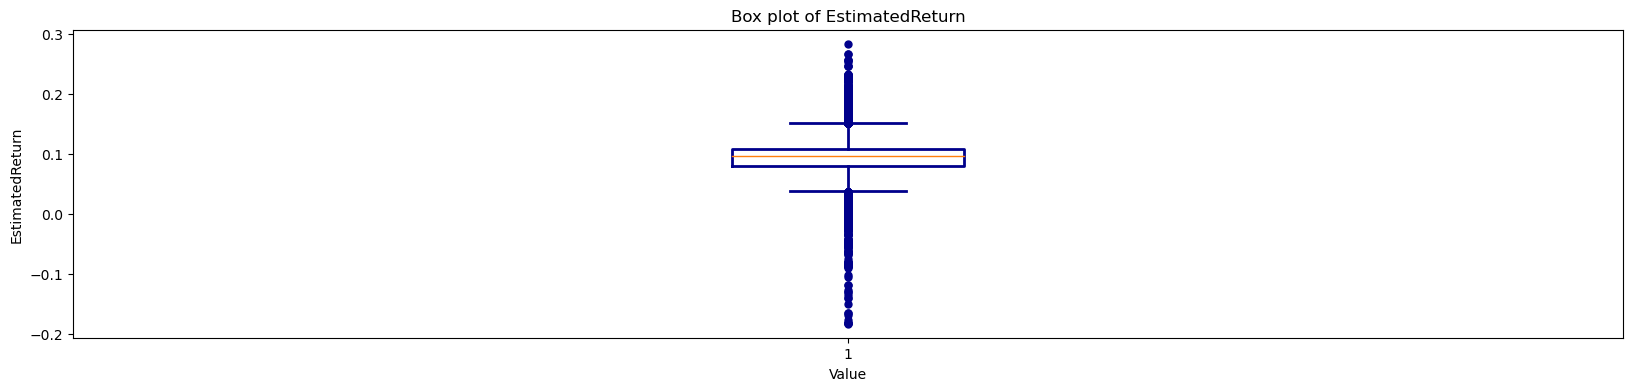

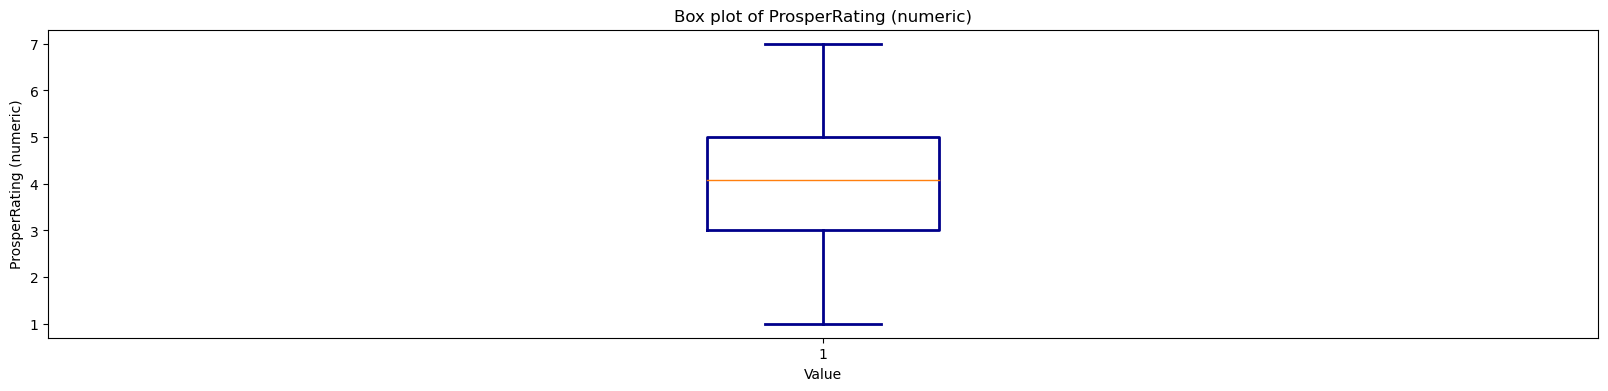

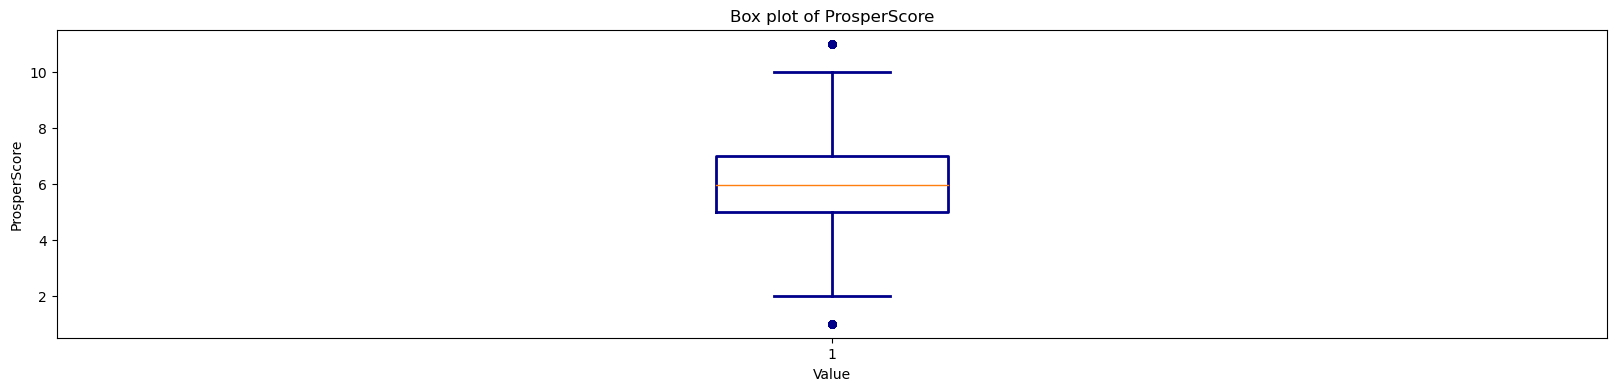

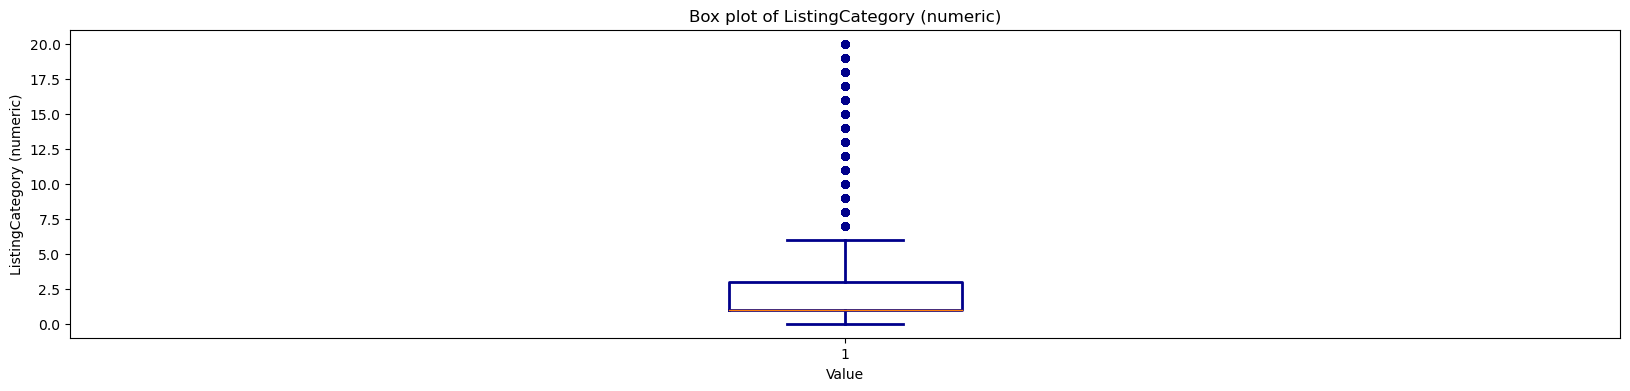

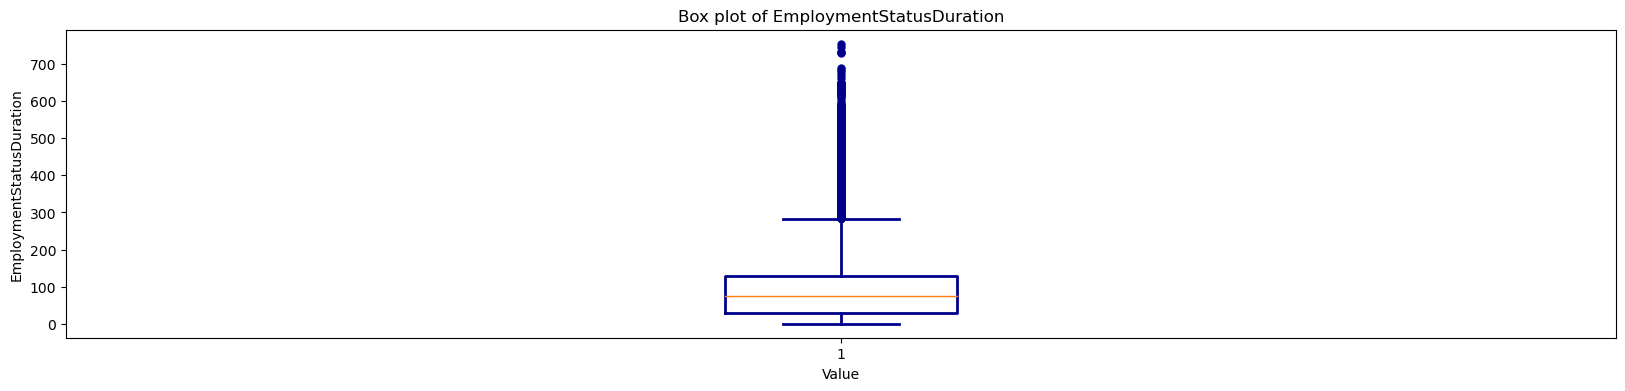

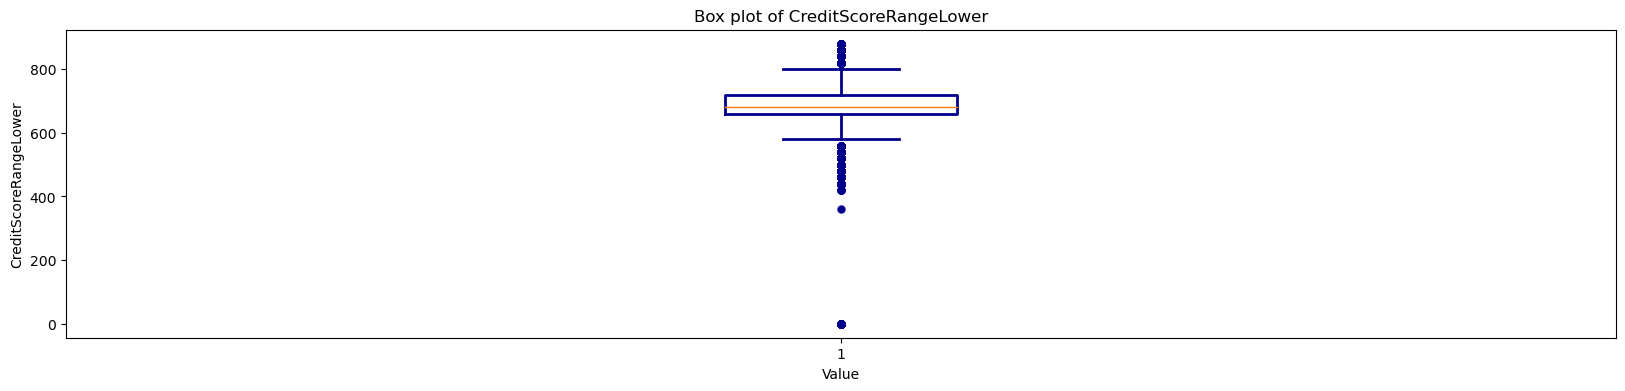

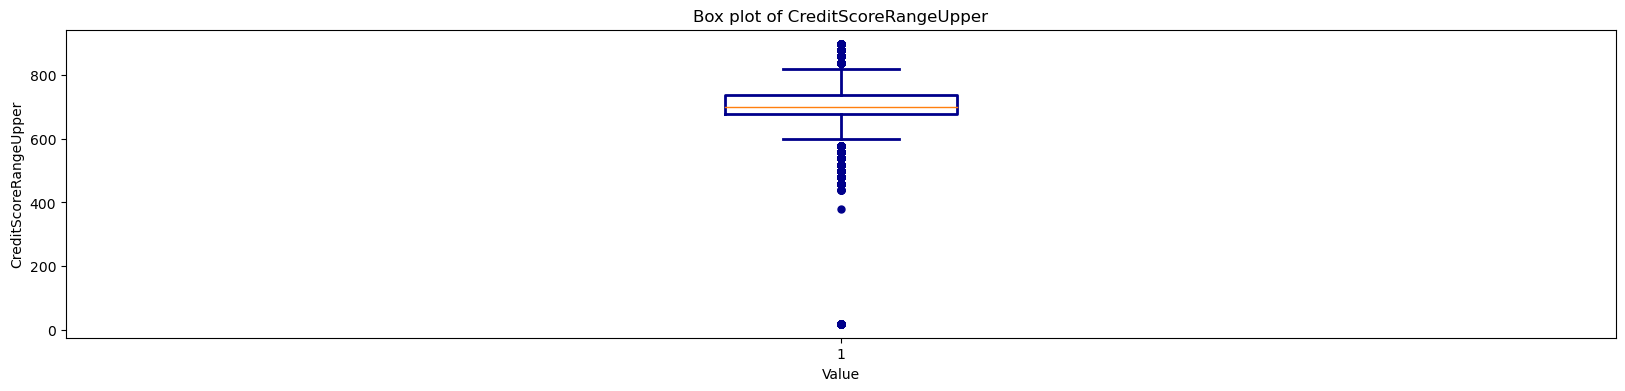

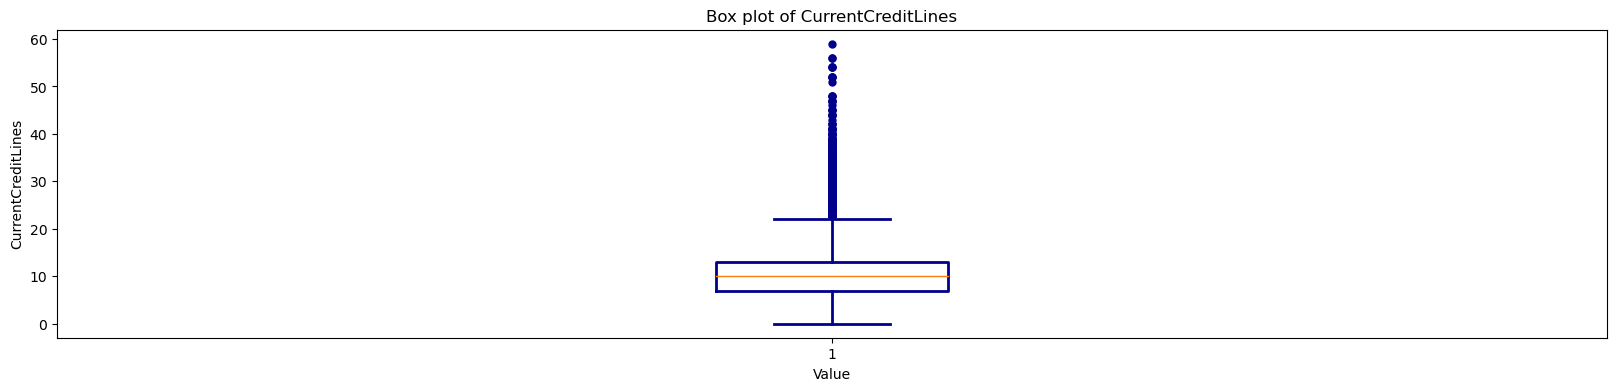

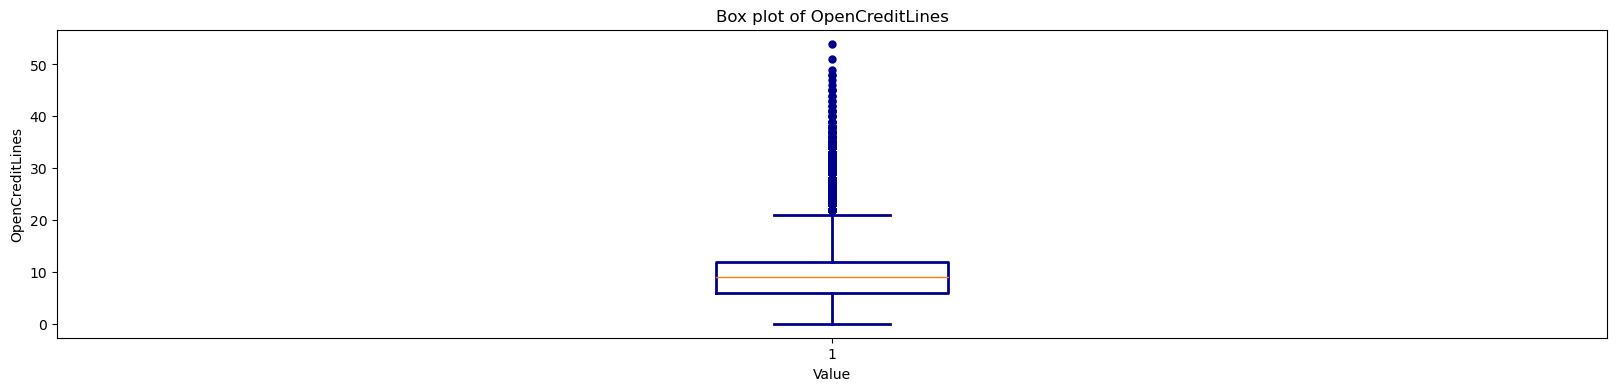

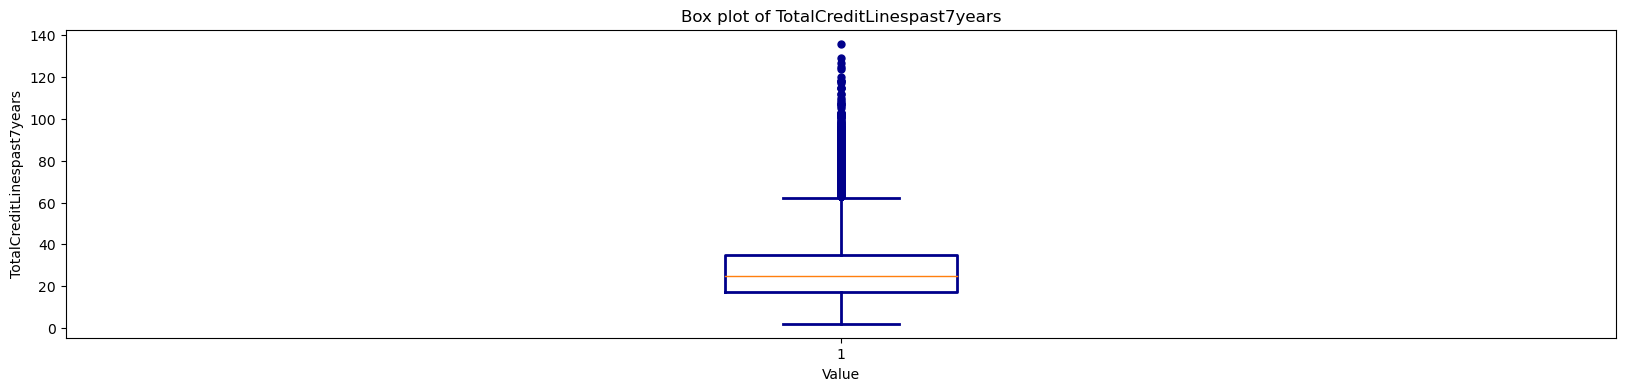

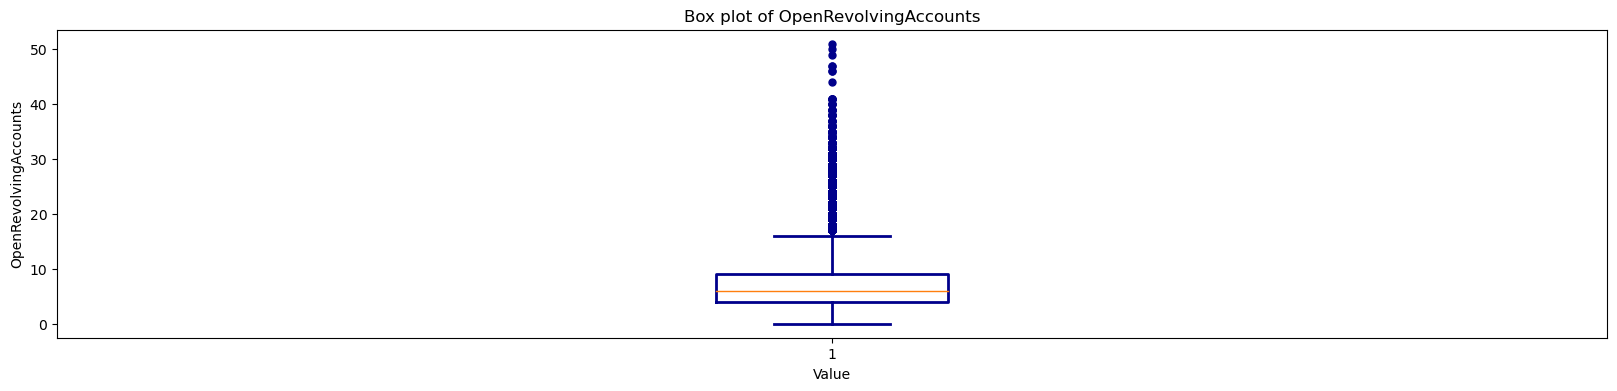

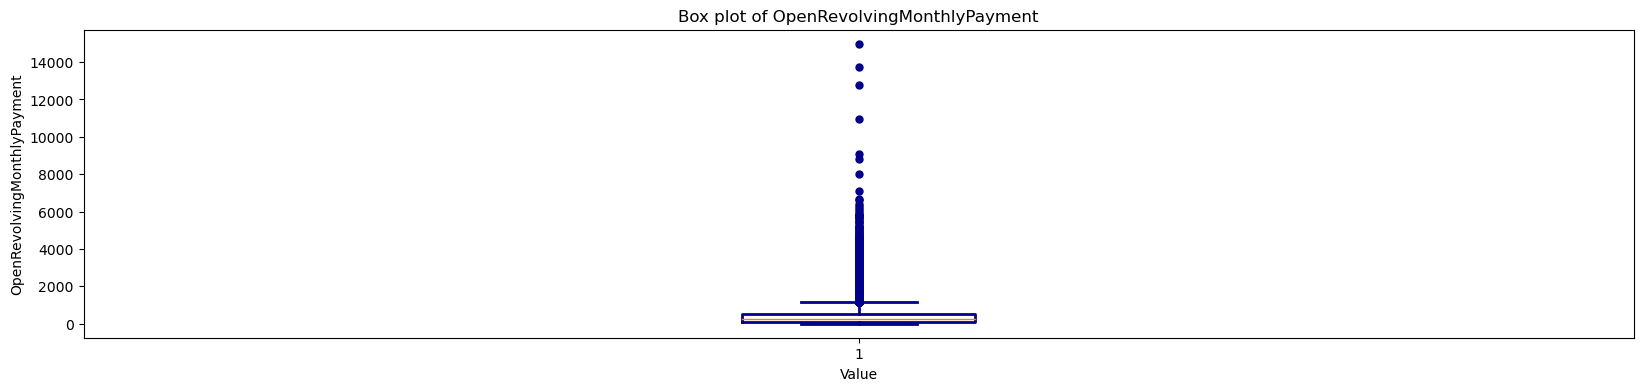

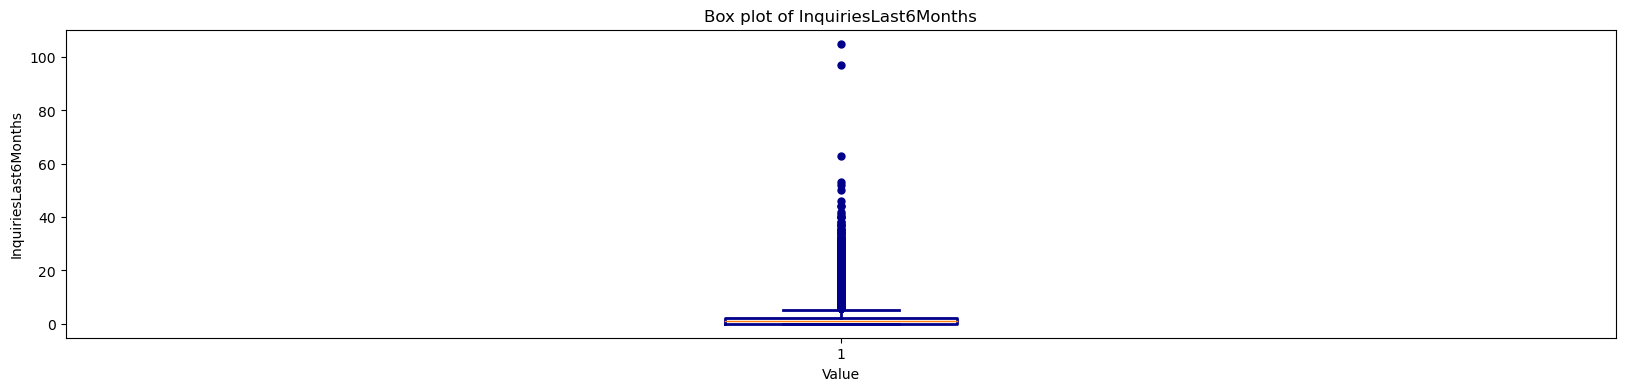

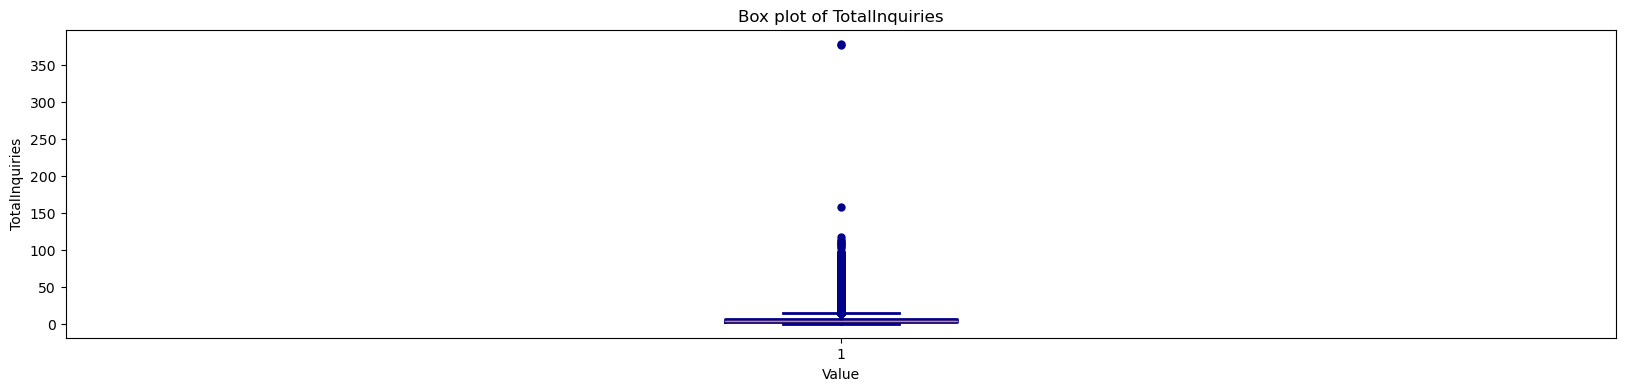

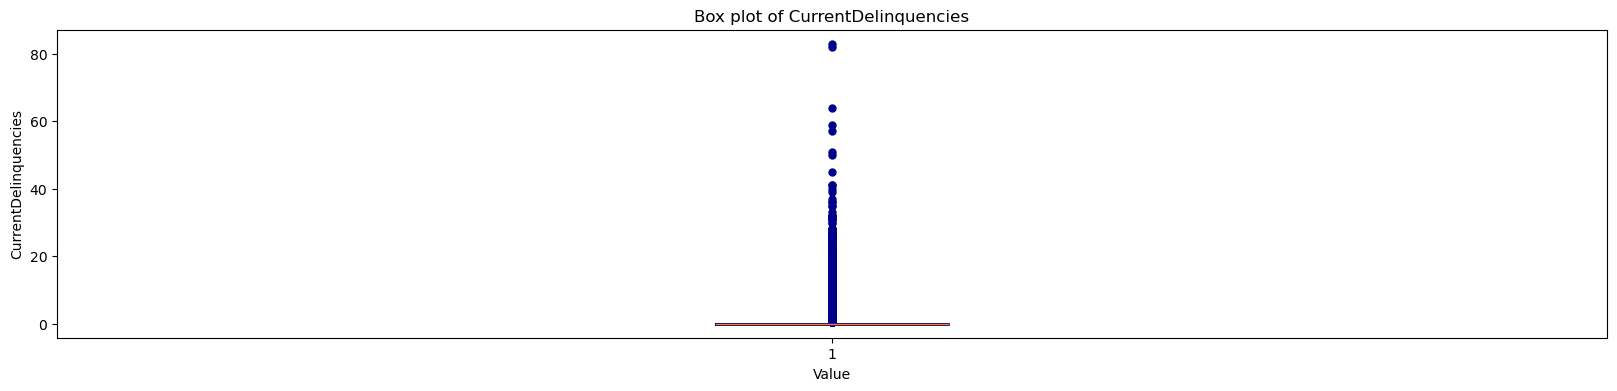

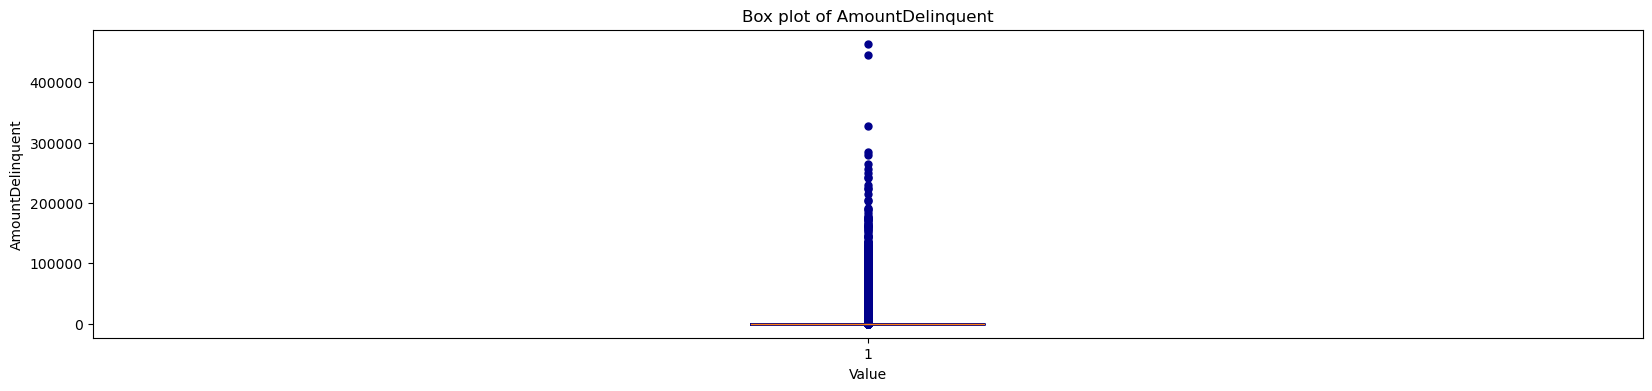

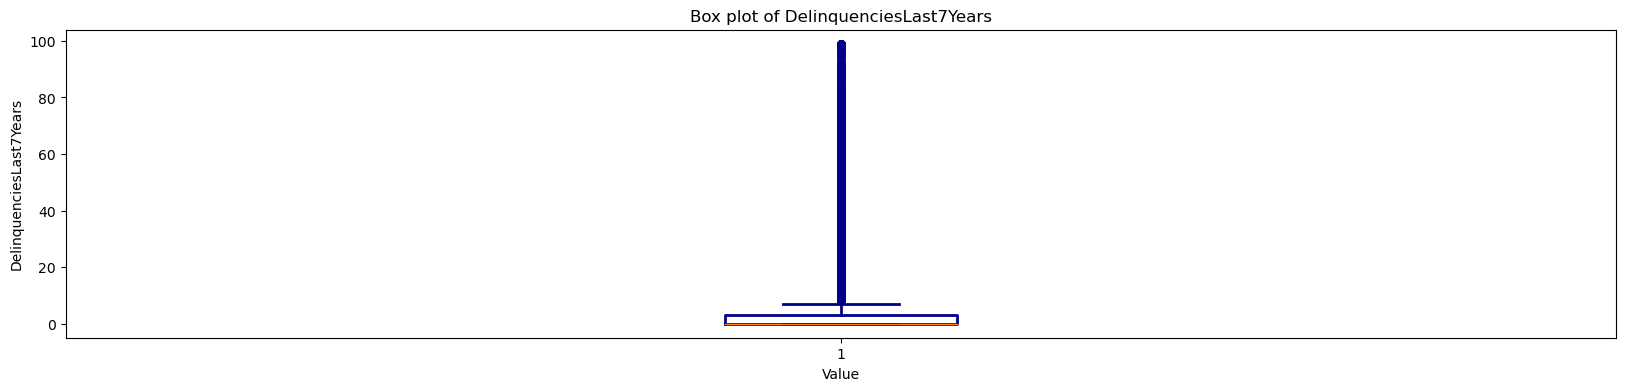

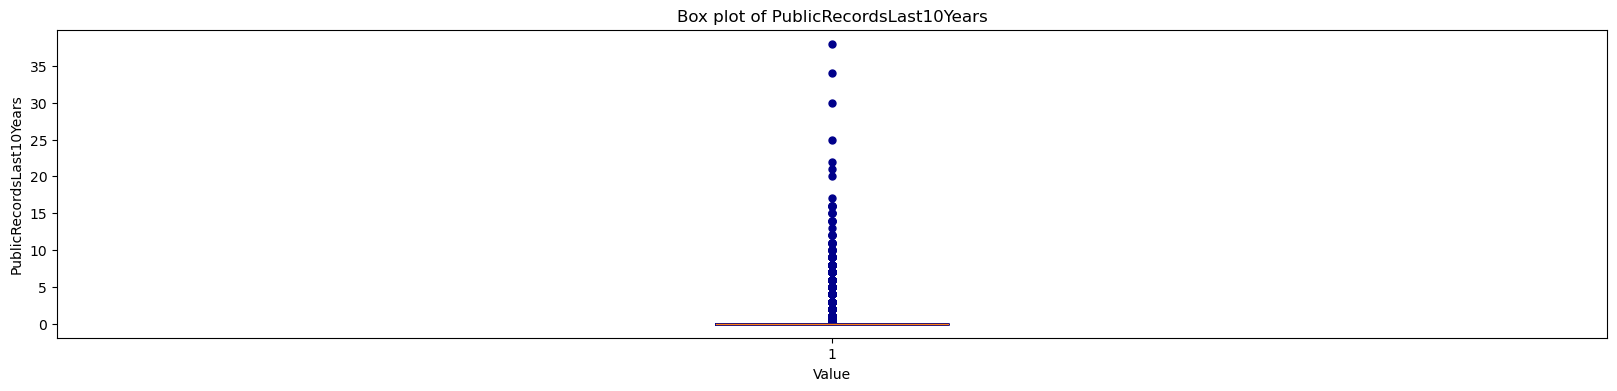

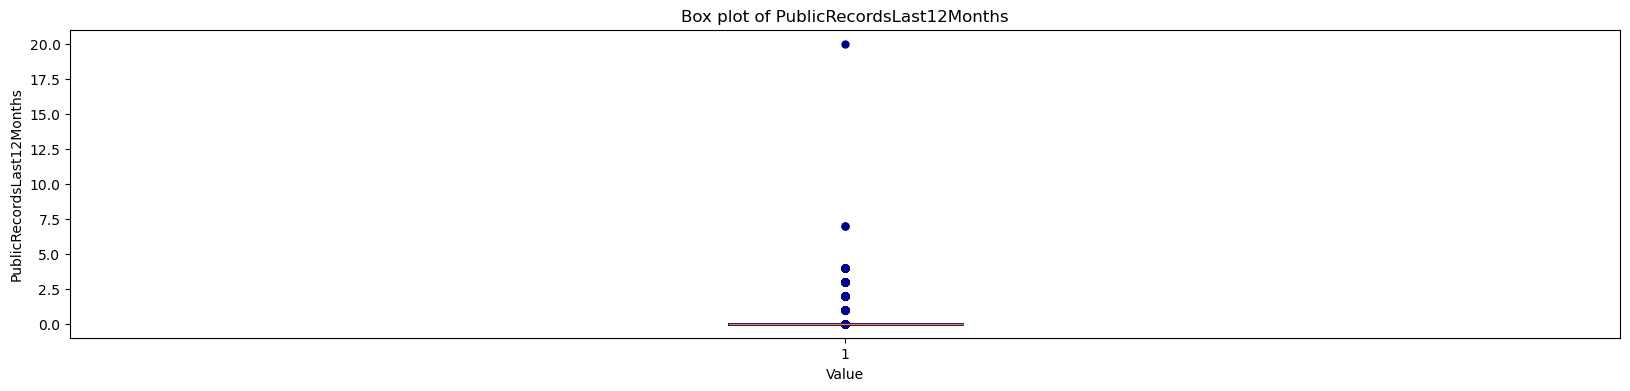

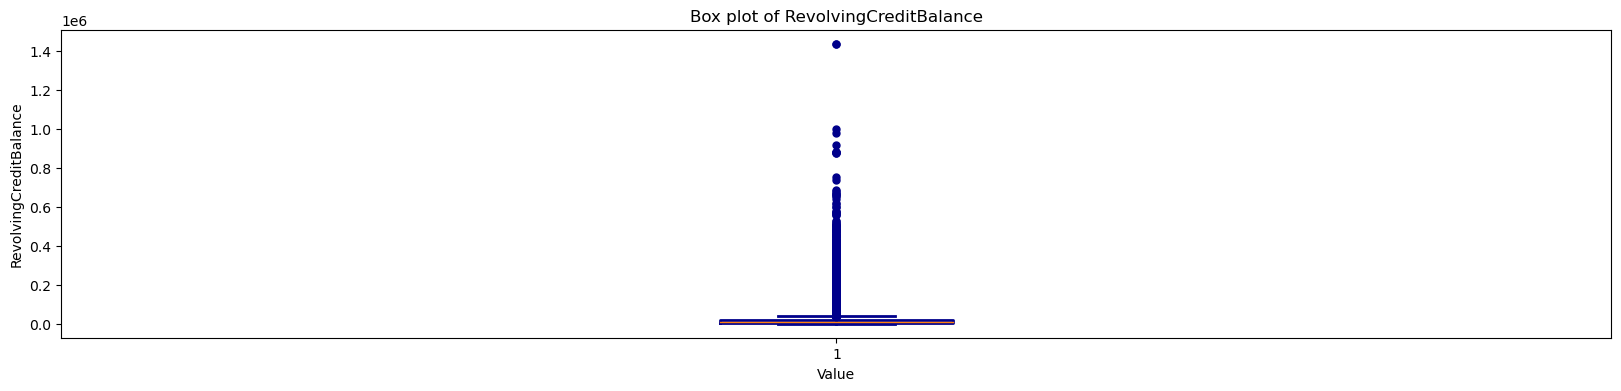

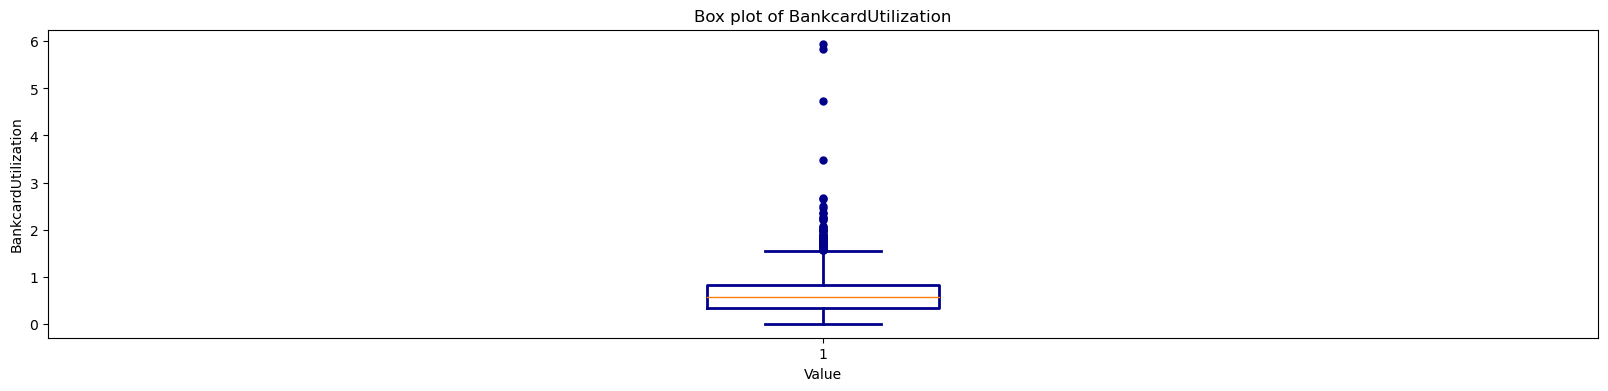

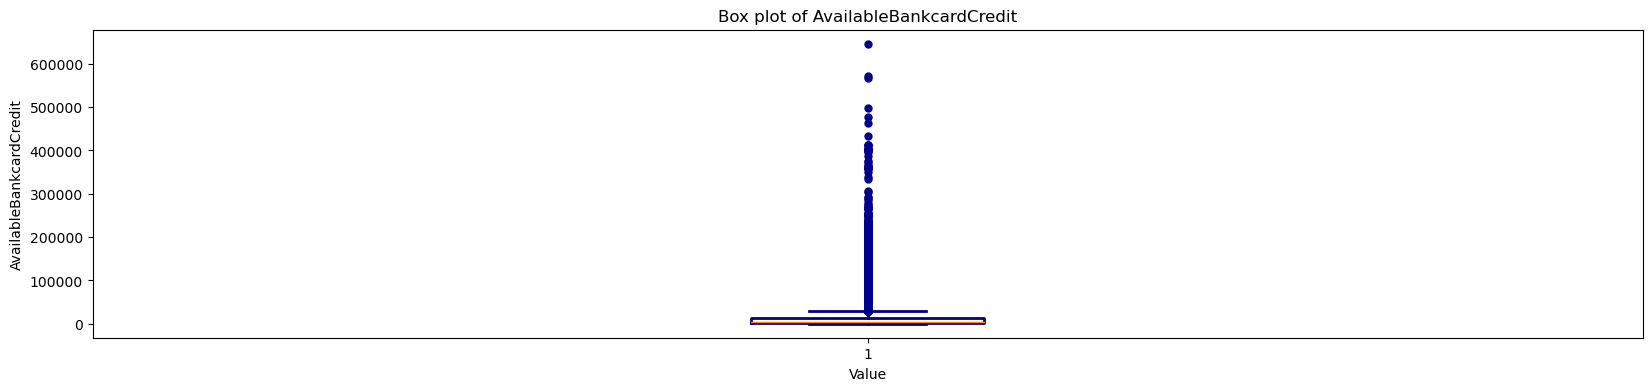

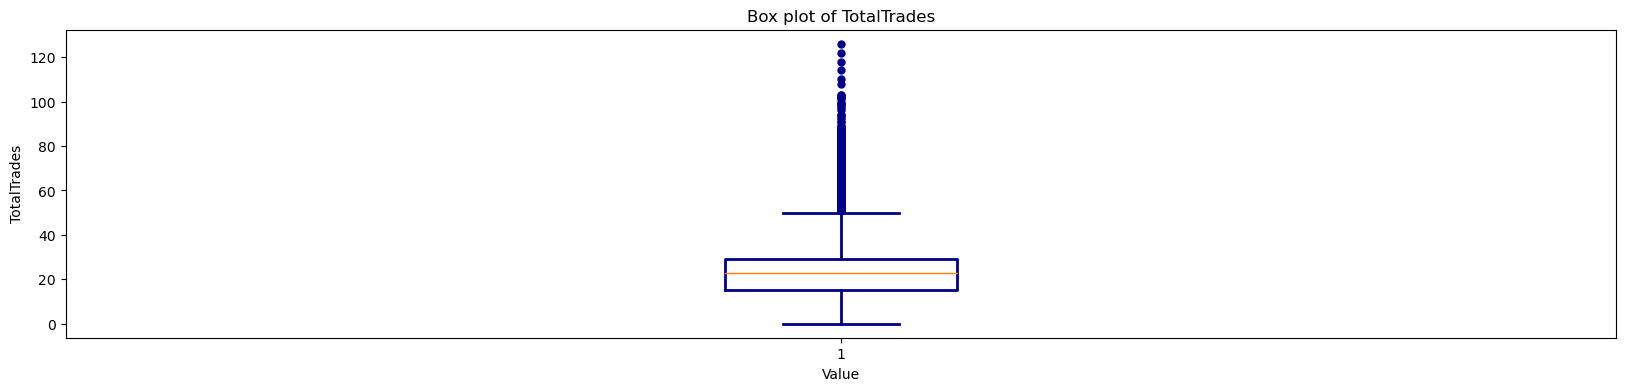

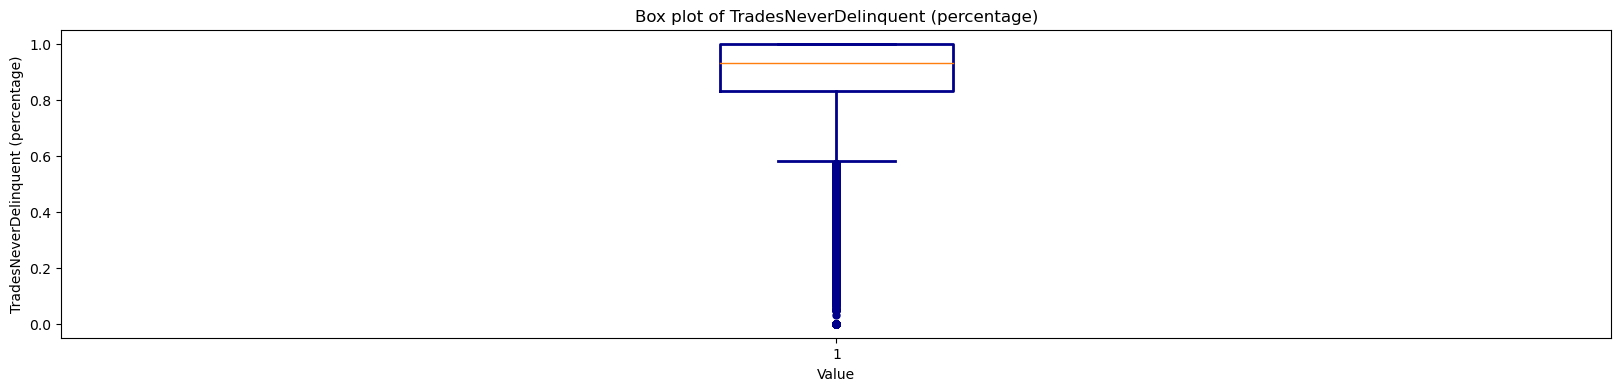

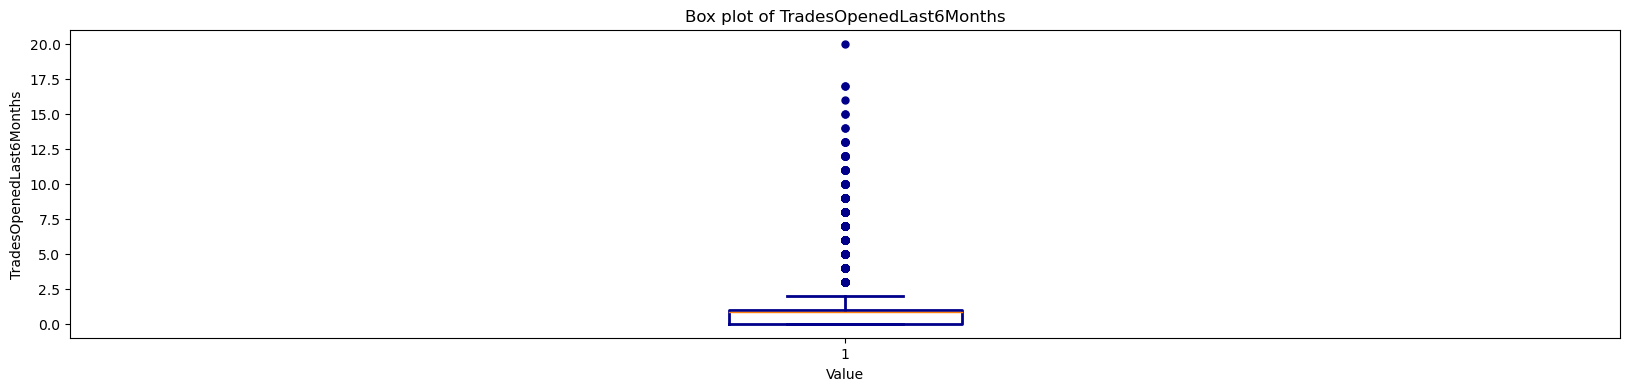

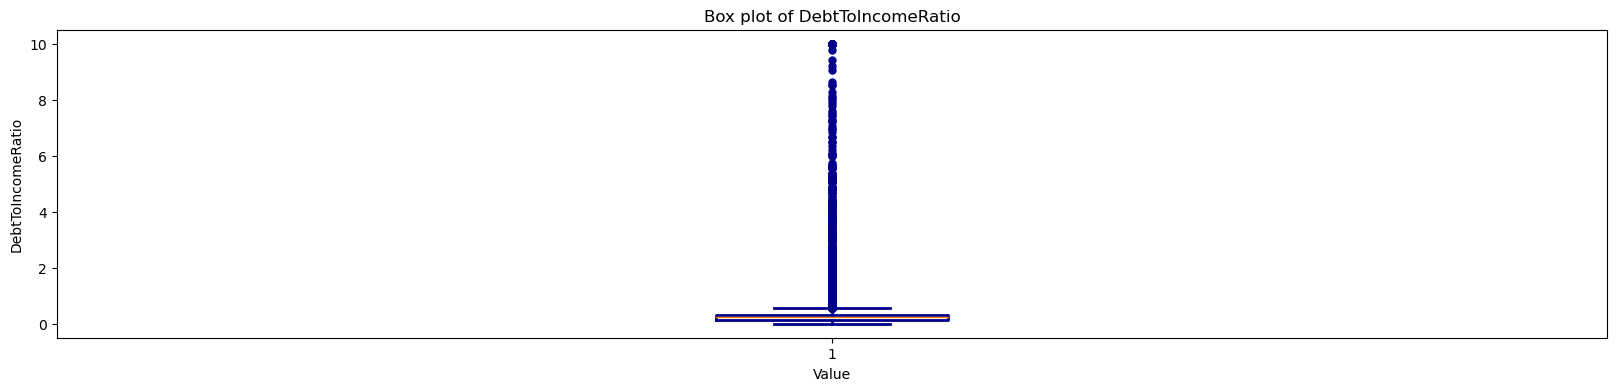

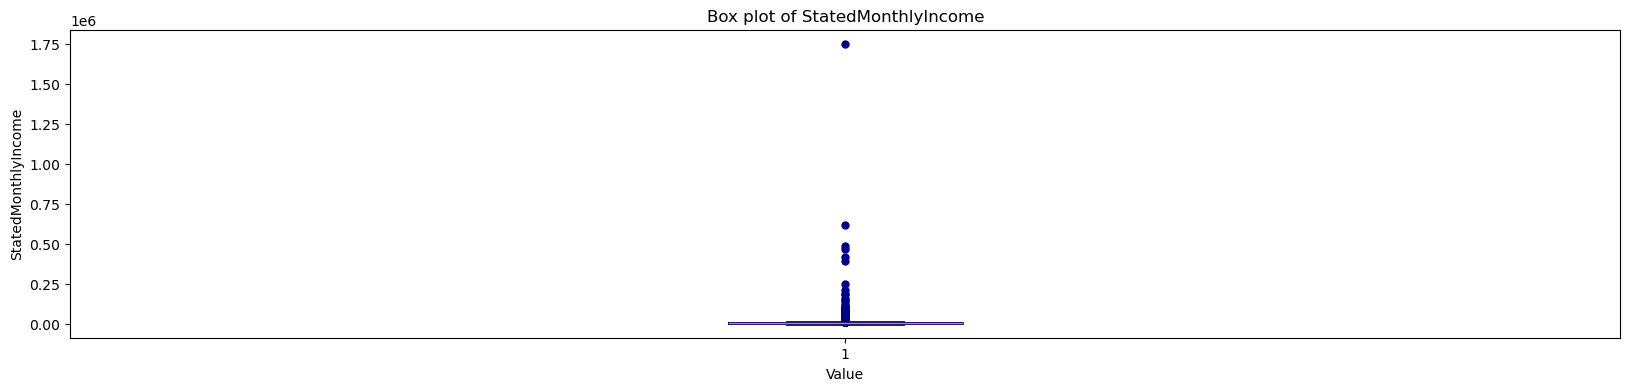

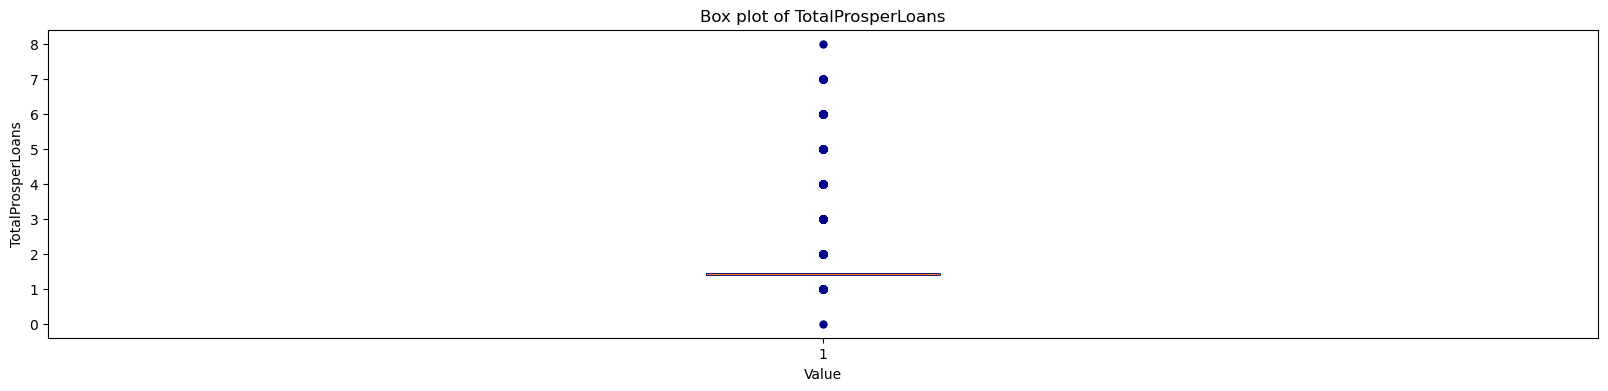

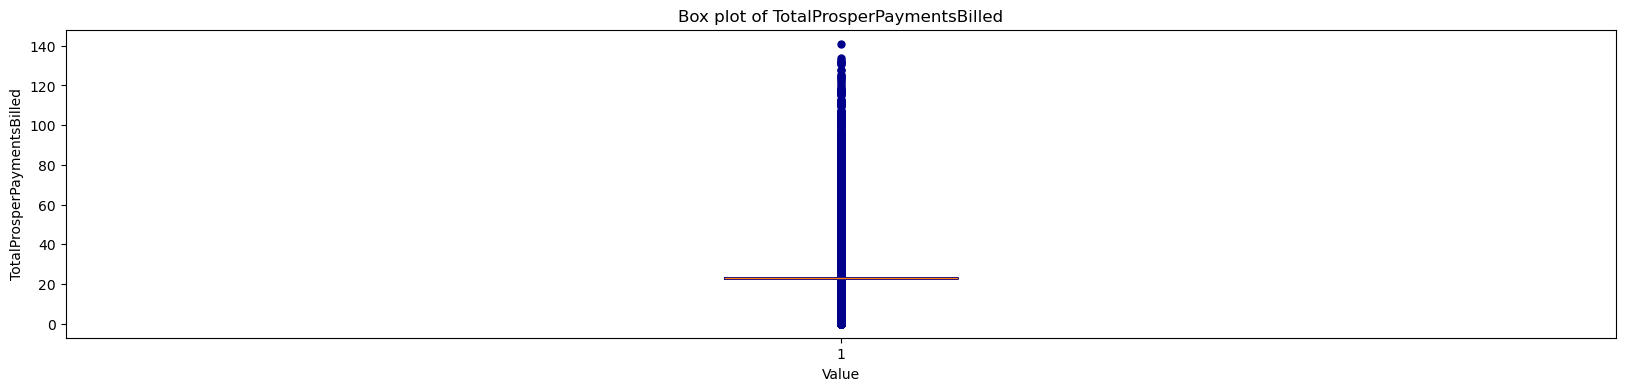

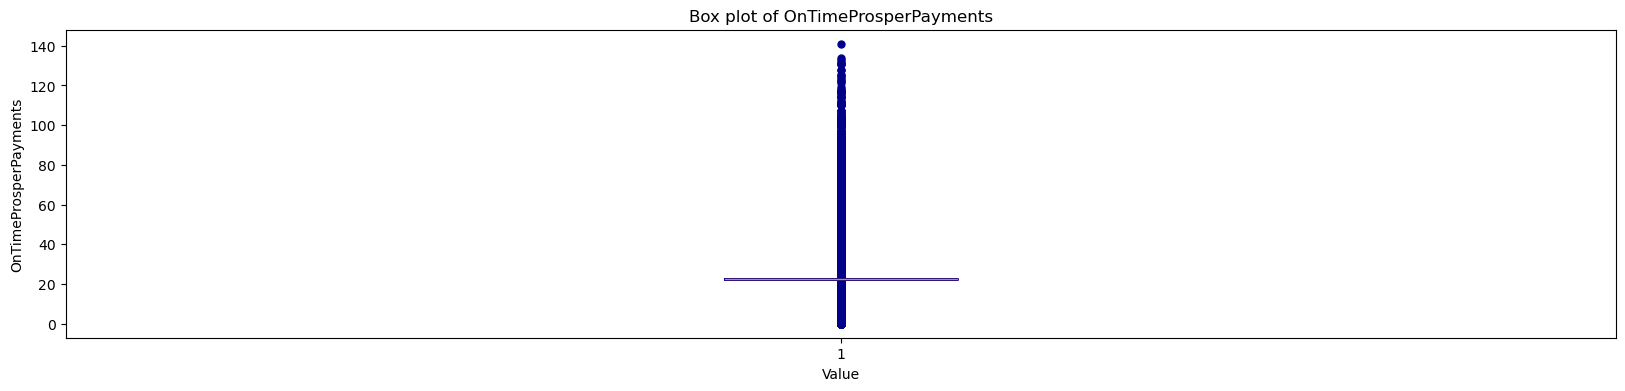

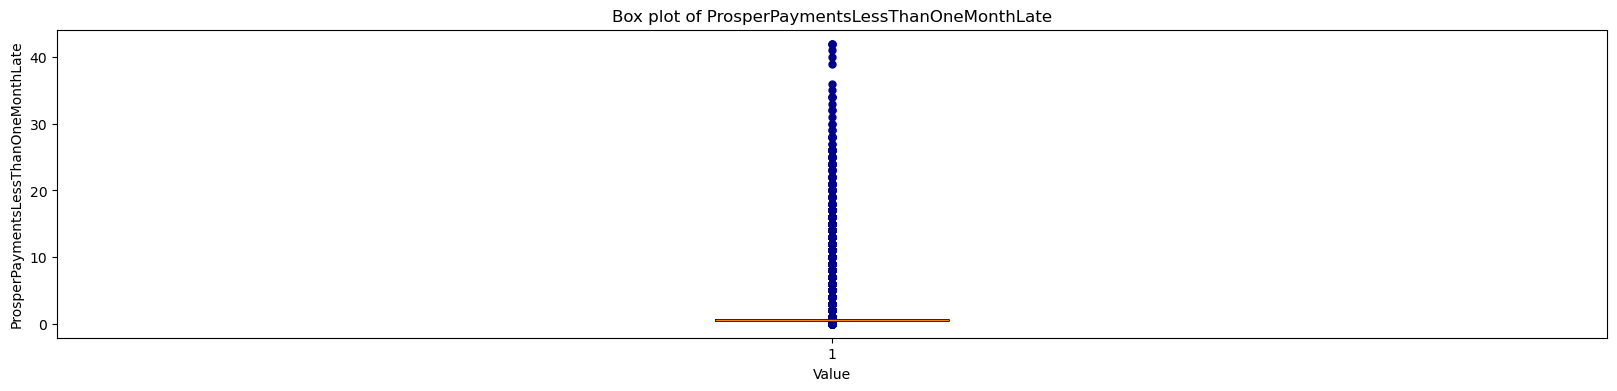

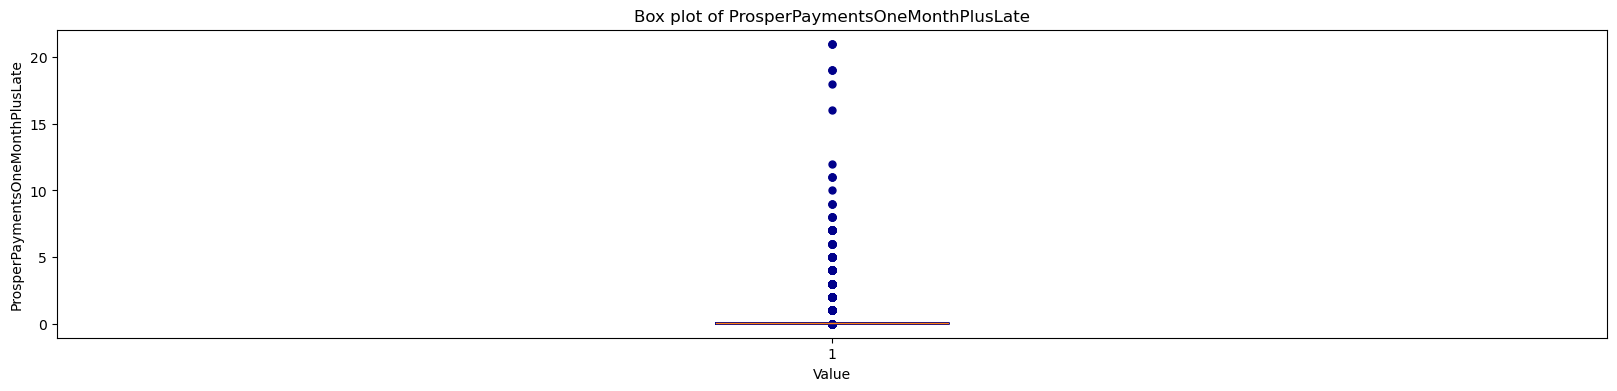

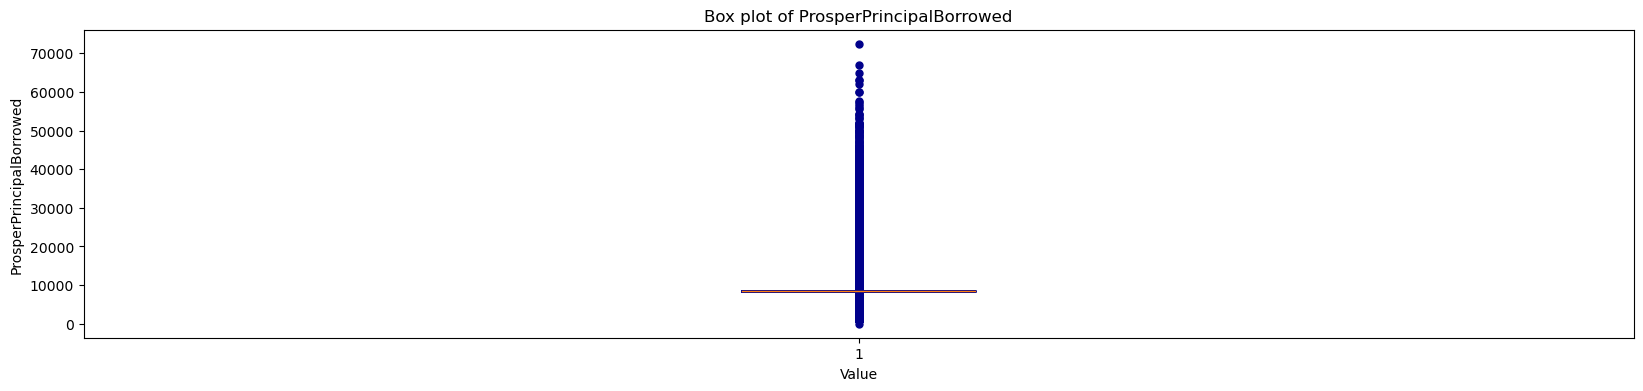

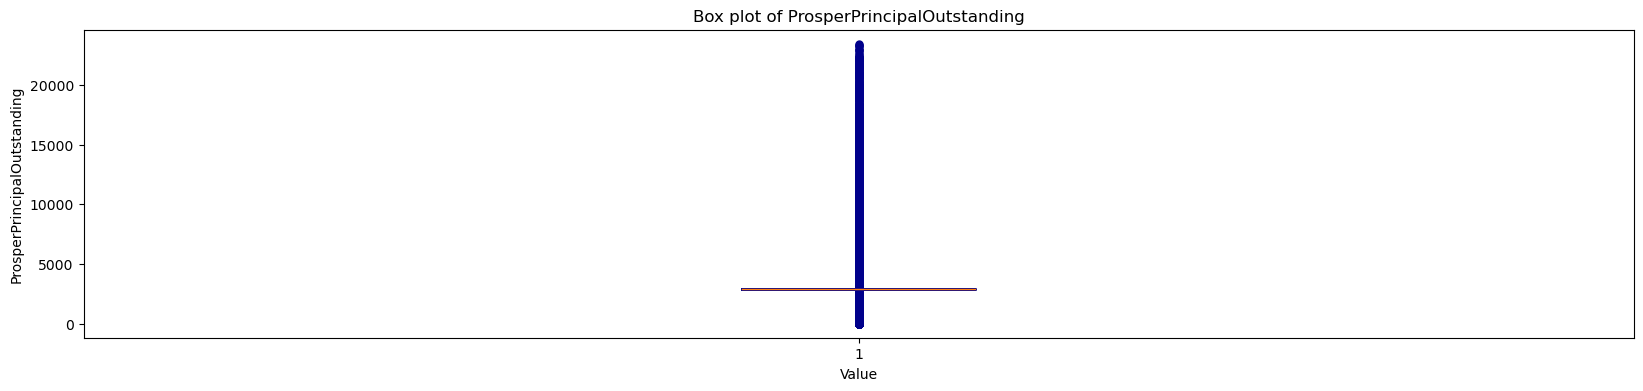

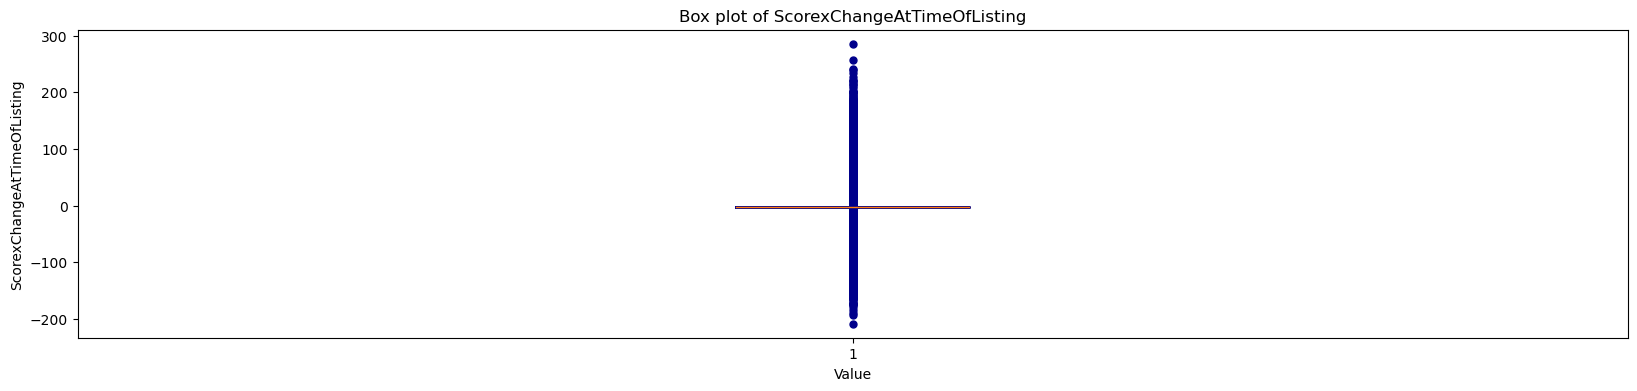

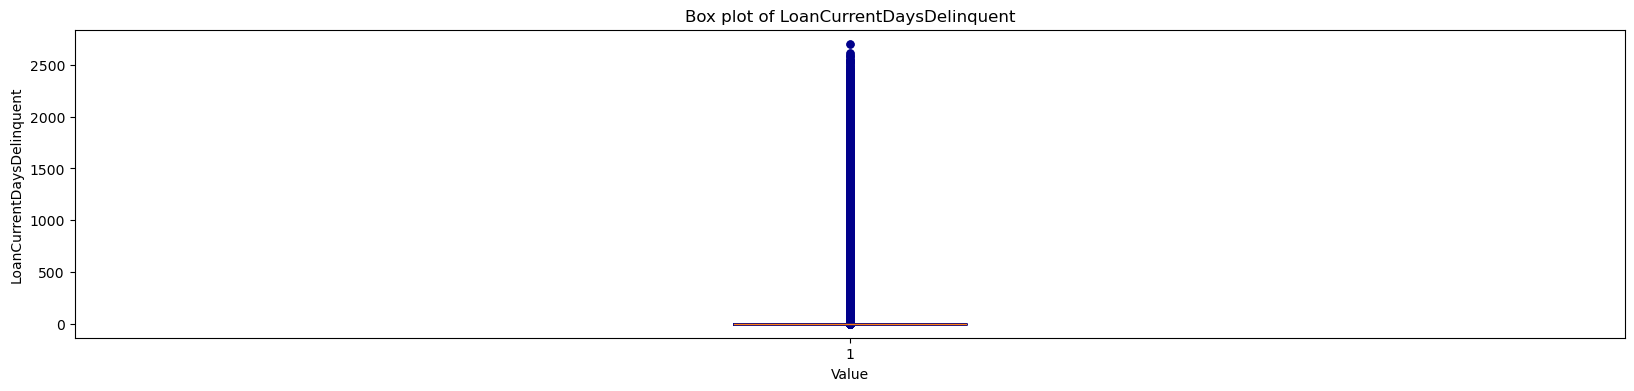

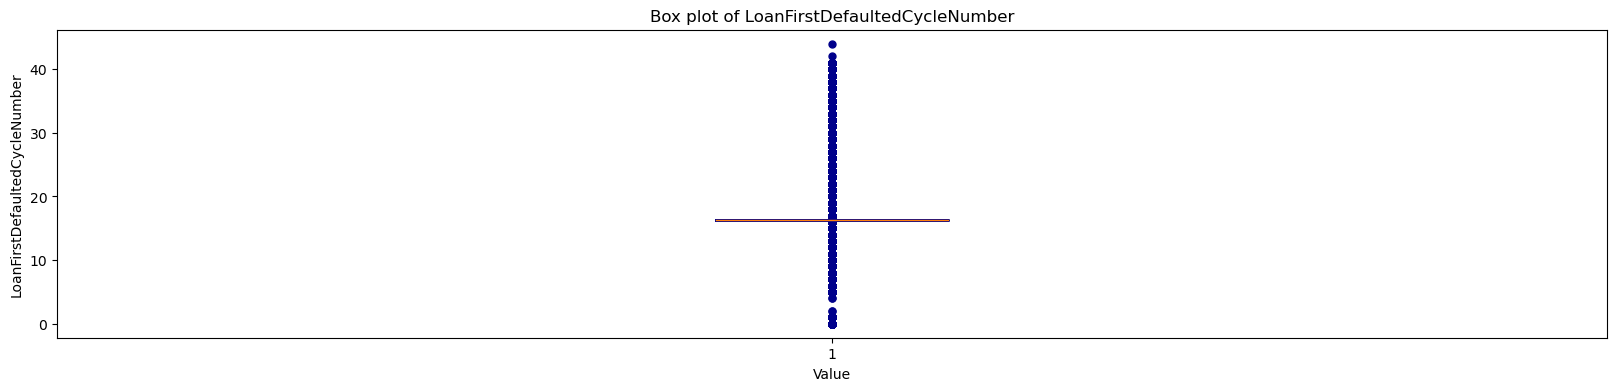

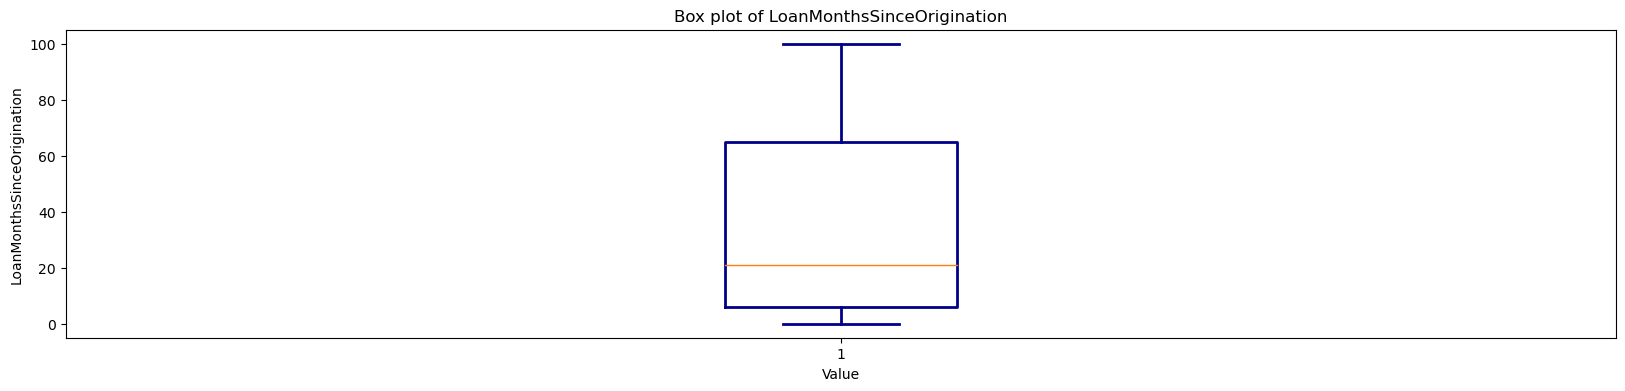

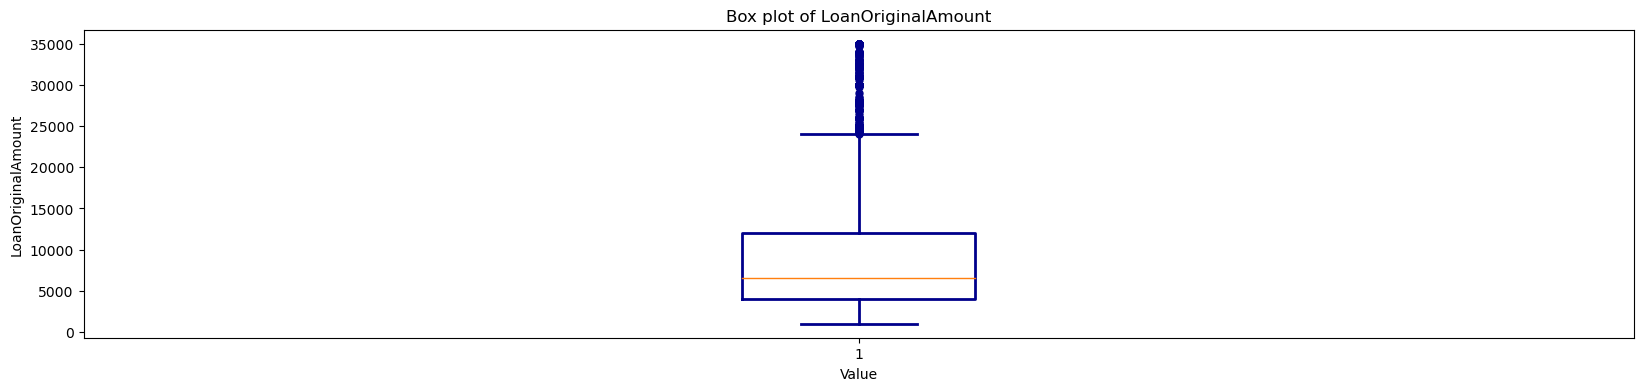

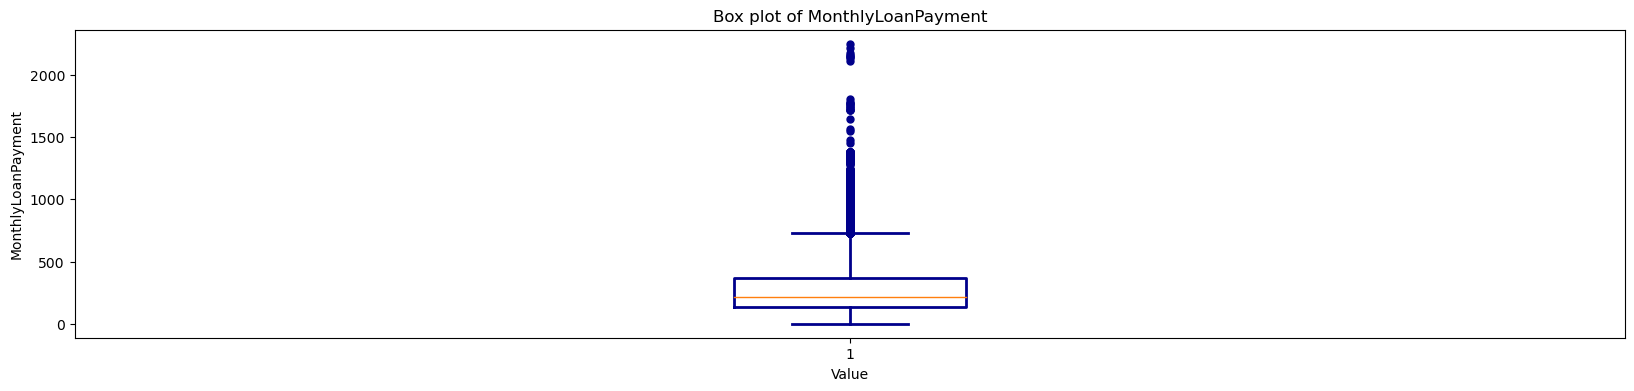

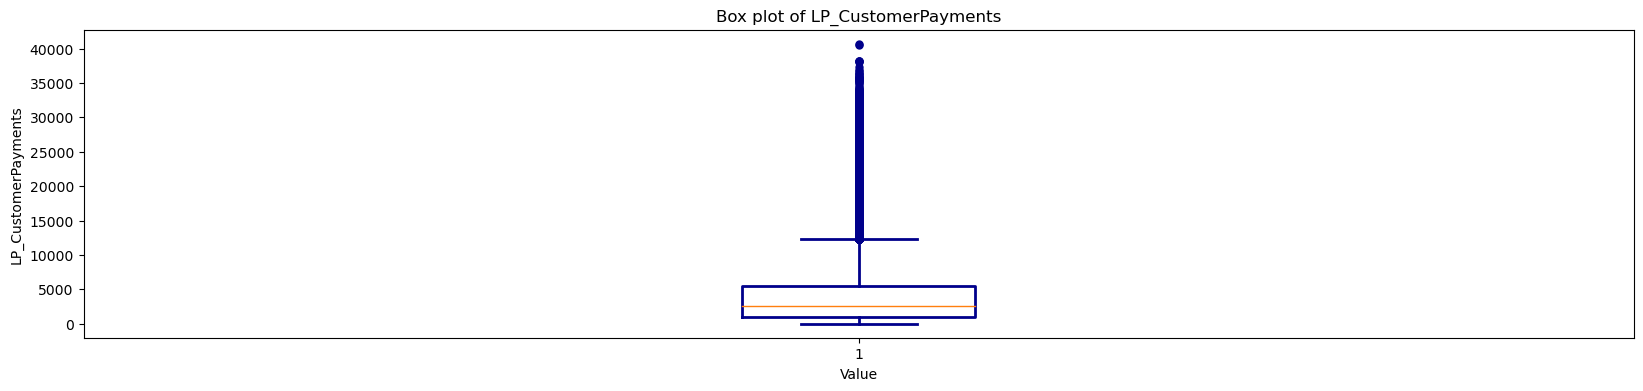

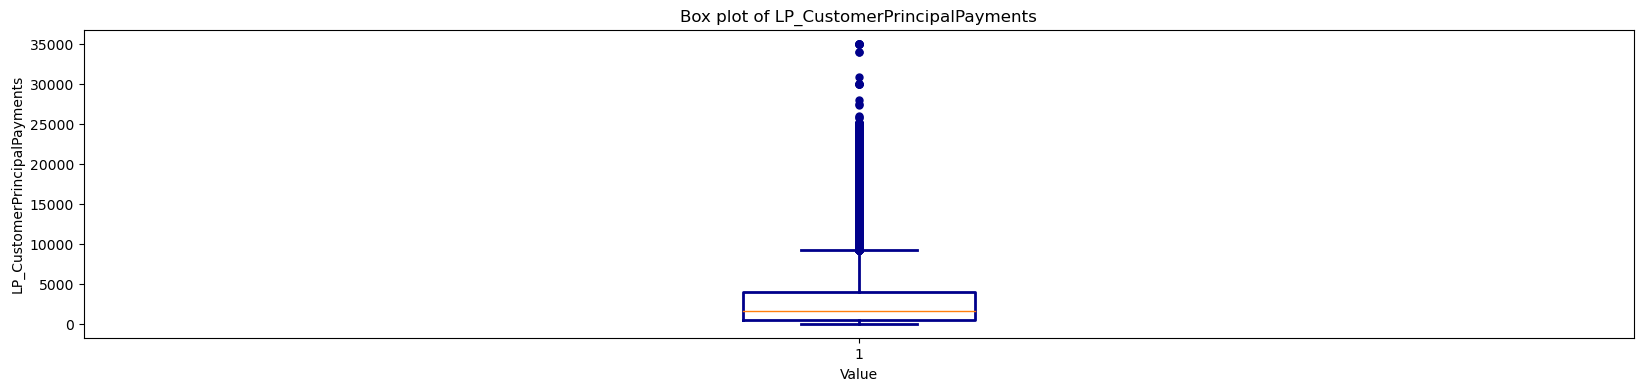

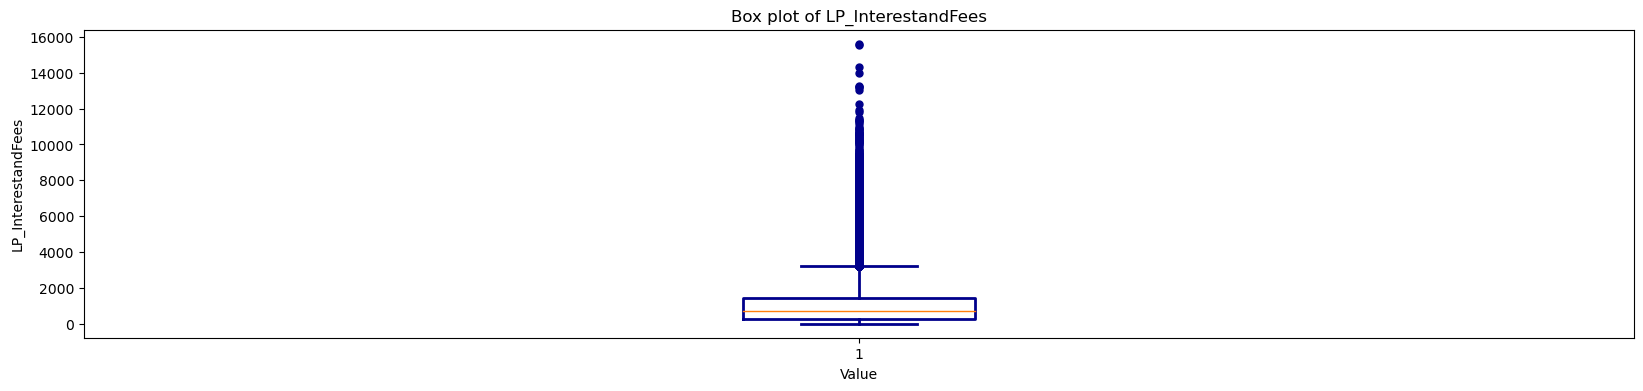

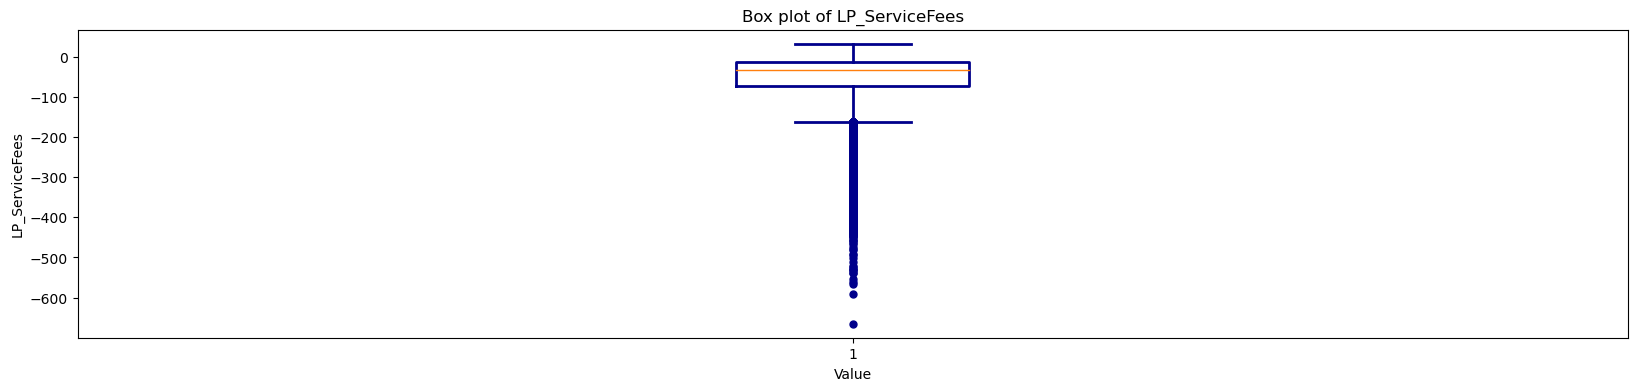

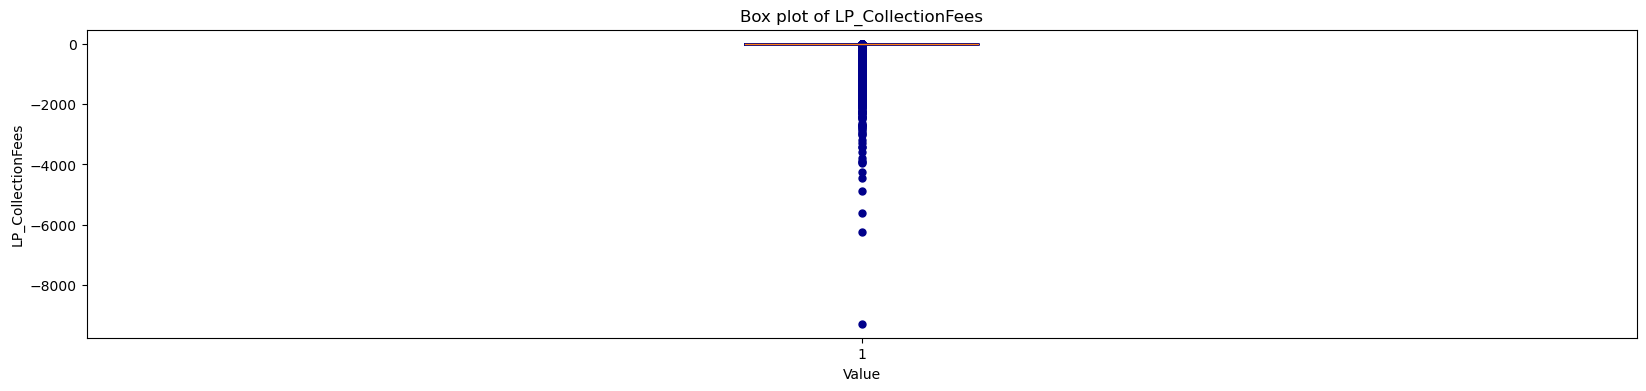

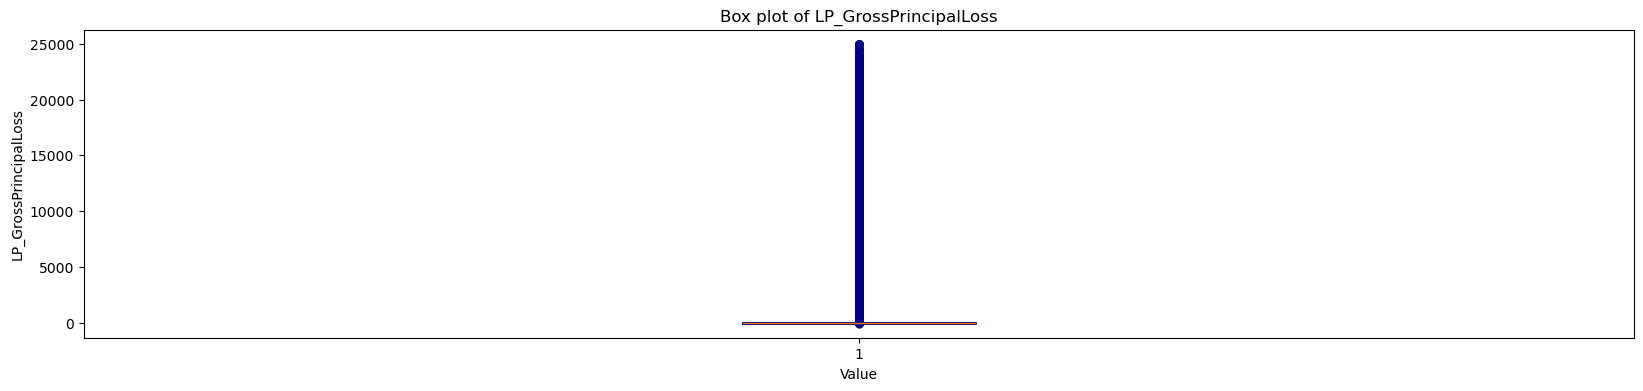

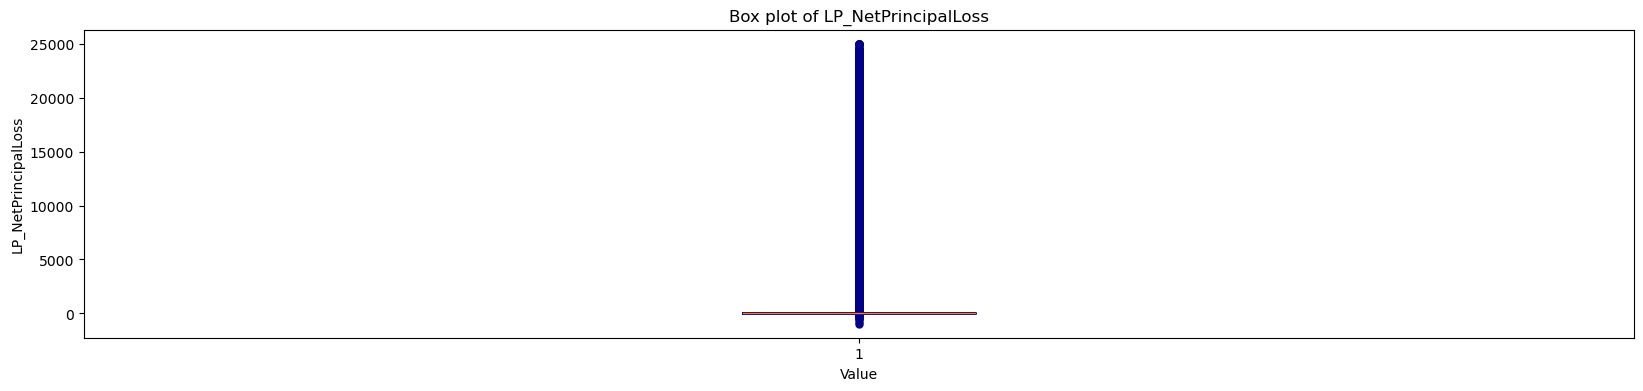

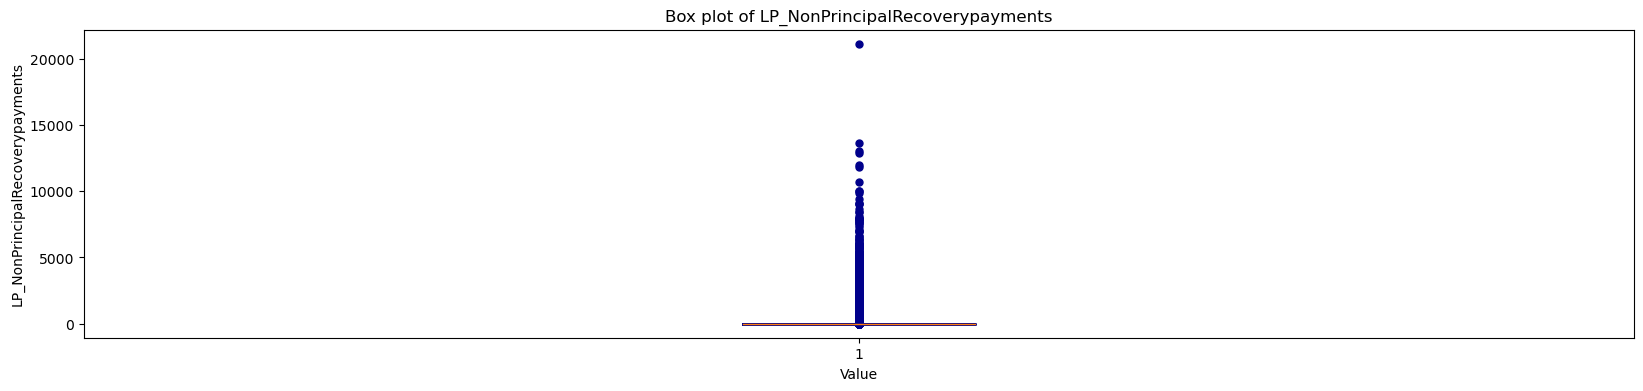

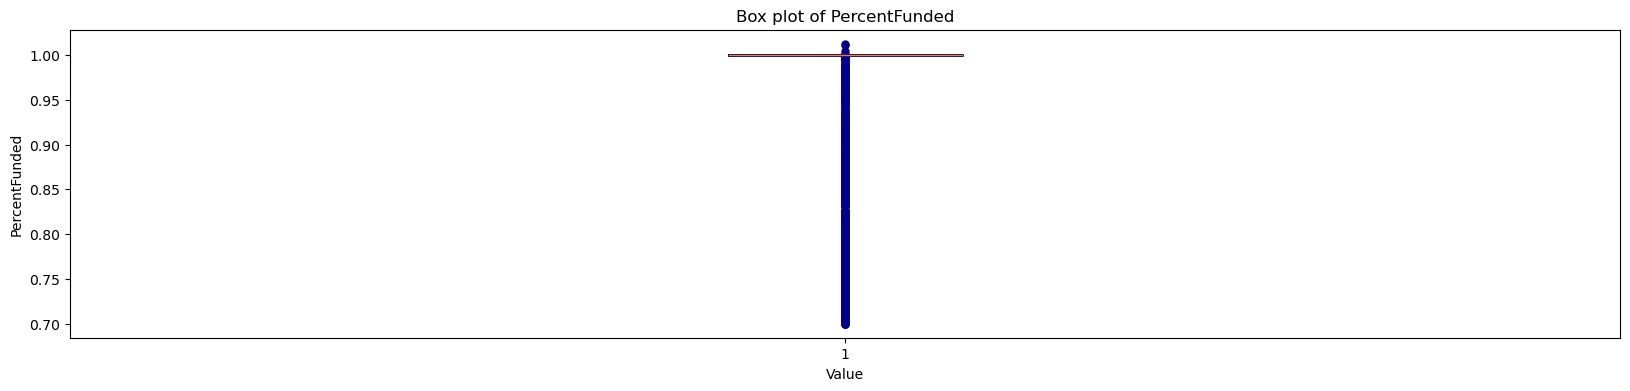

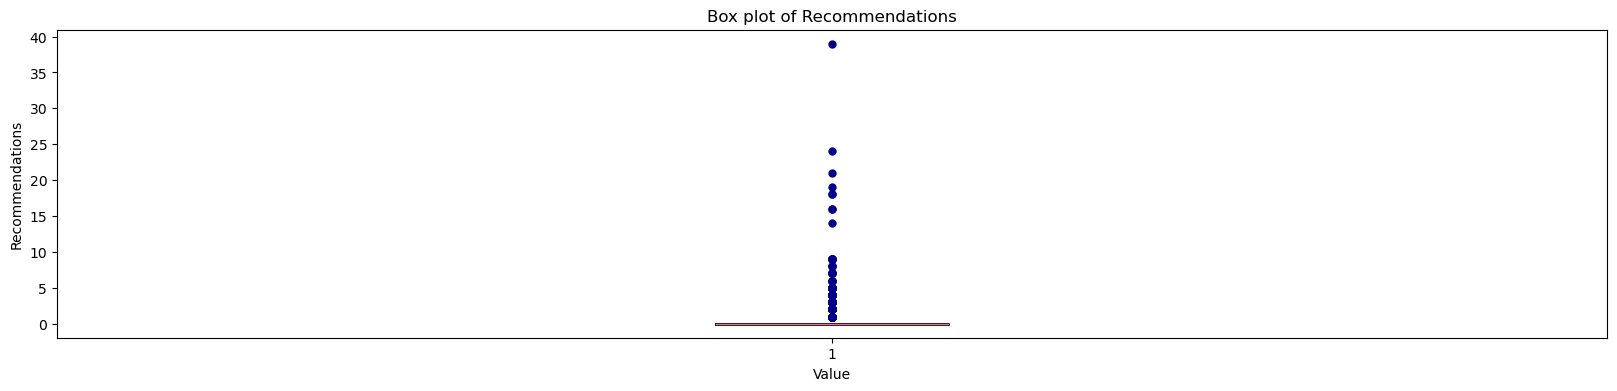

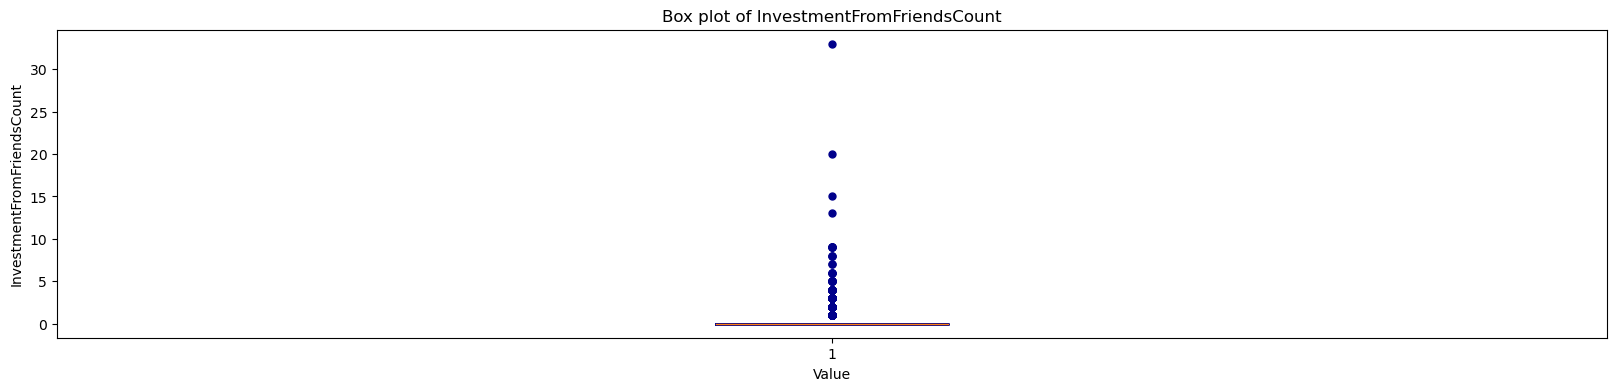

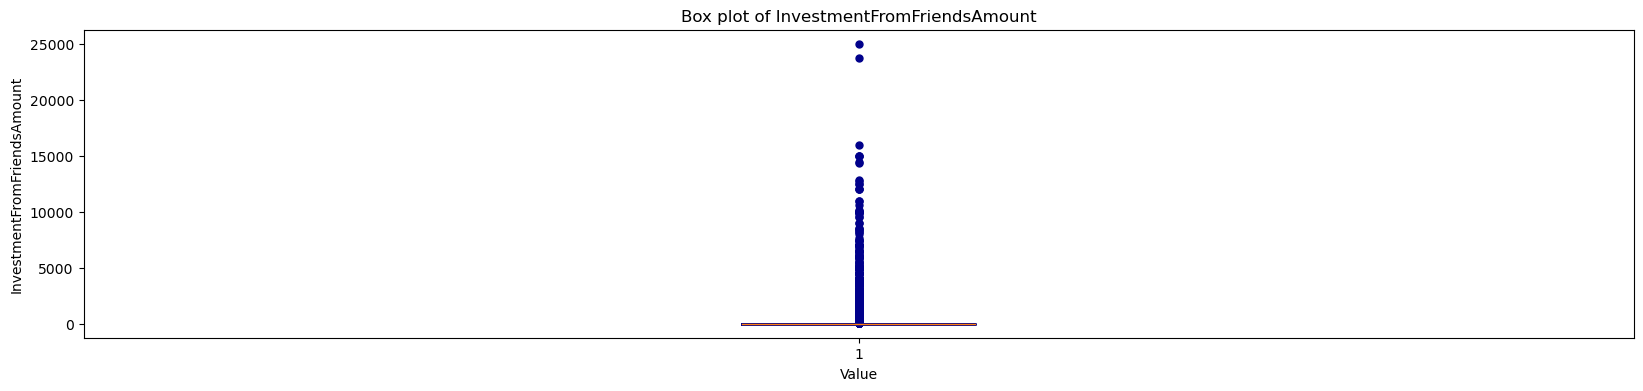

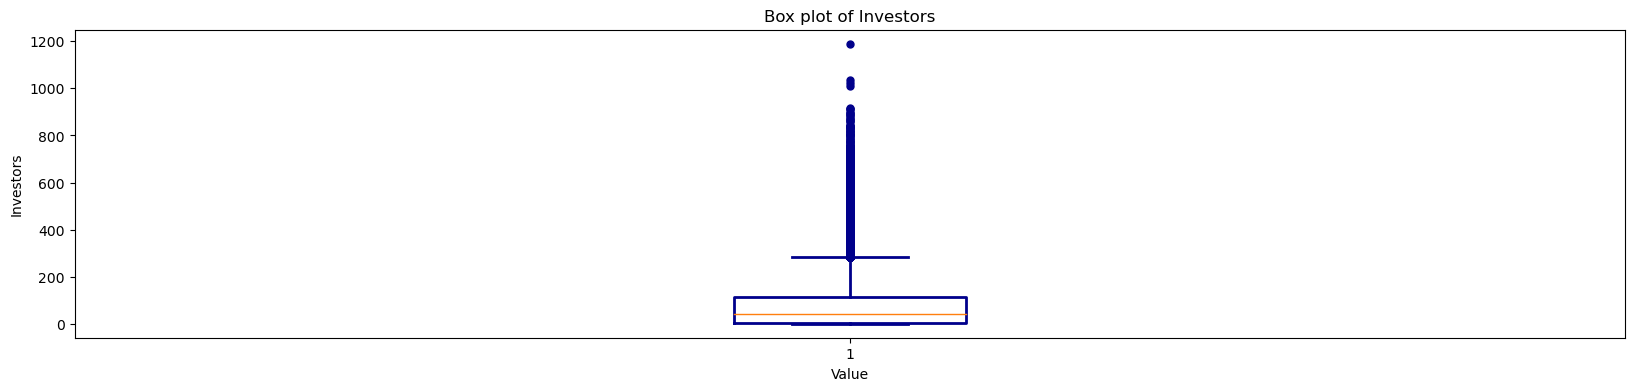

In [26]:
# create a custom design for box plots
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
whiskerprops = dict(linestyle='-', linewidth=2, color='darkblue')
capprops = dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markersize=5, markerfacecolor='darkblue', markeredgecolor='darkblue')

# create a box plot for each numeric column
for column in num_cols:
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.boxplot(num_cols[column], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)
    plt.show()

In [27]:
# Removing Outliers in above columns
def remove_outlier (col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return col[(col >= lower_range ) & (col <= upper_range)]

In [28]:
# Removing outliers and creating new dataframe named num_cols2
num_cols = num_cols.apply(remove_outlier)

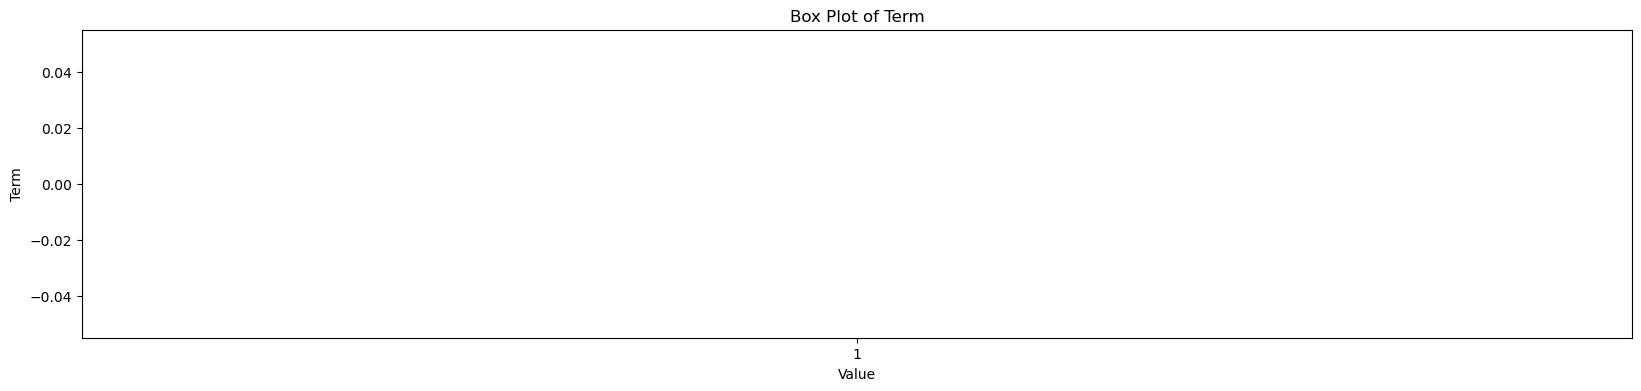

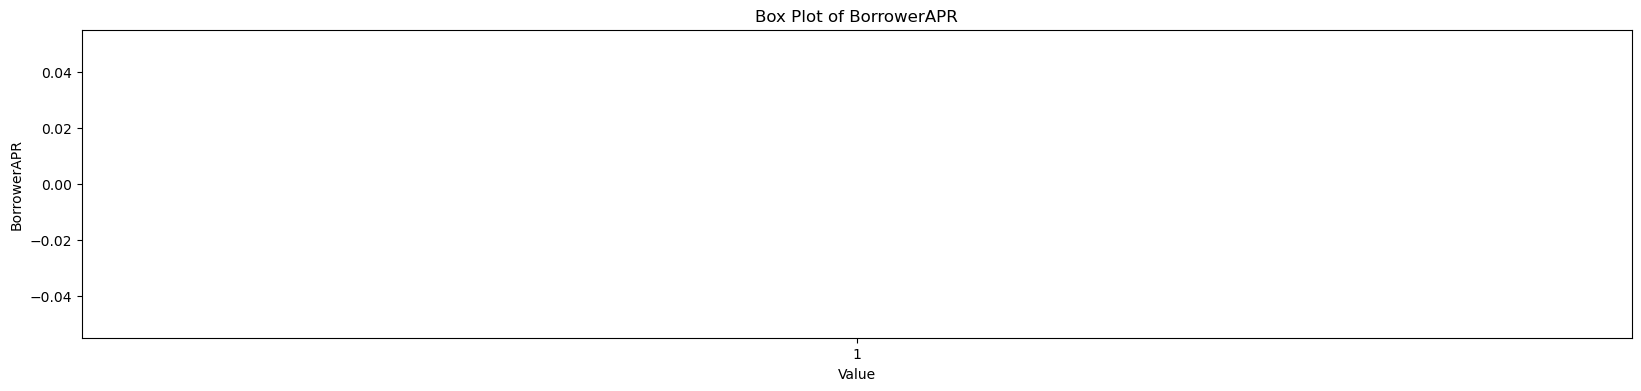

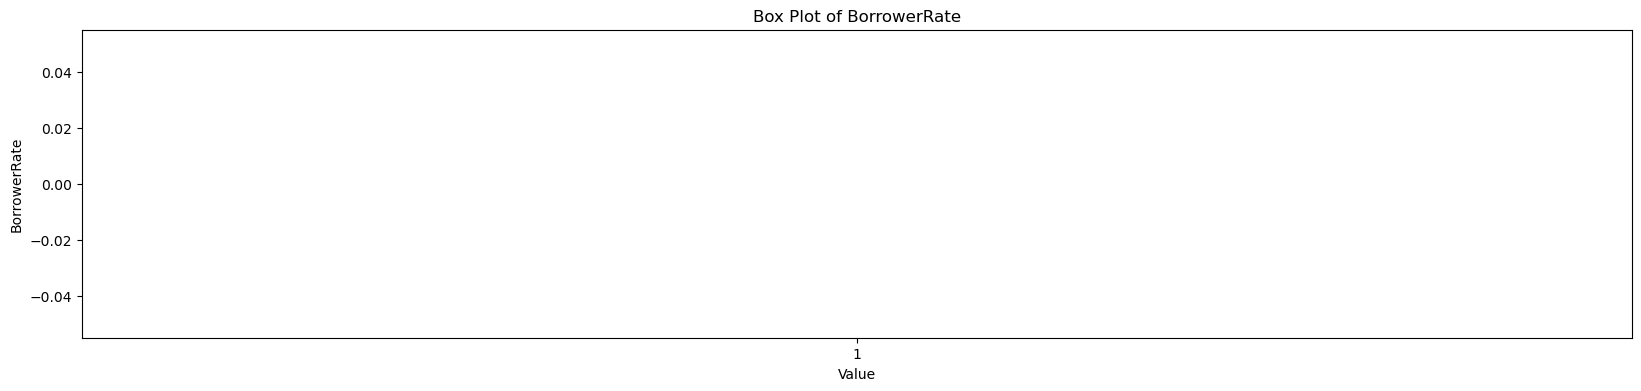

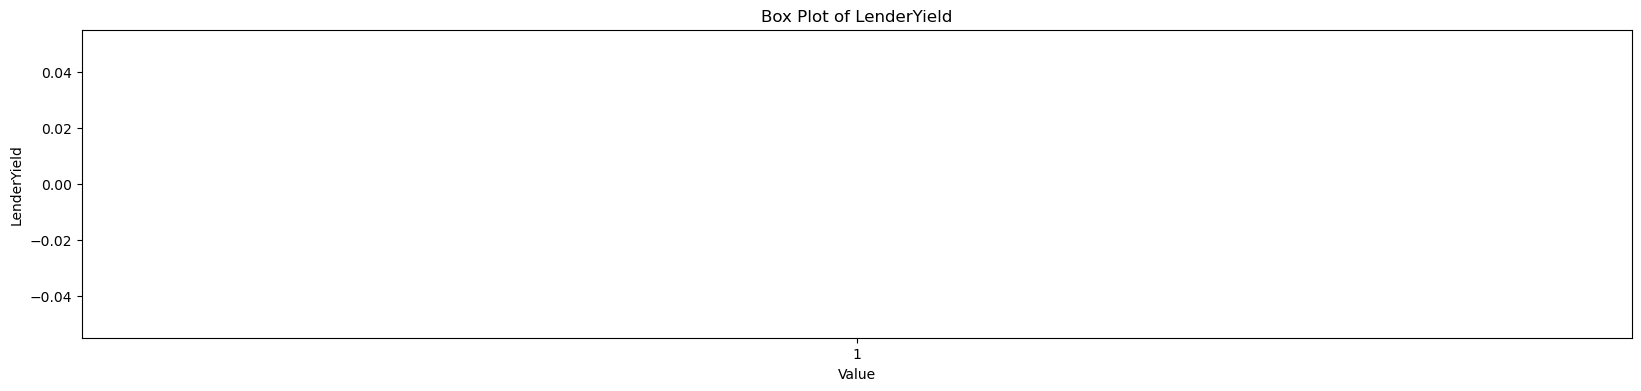

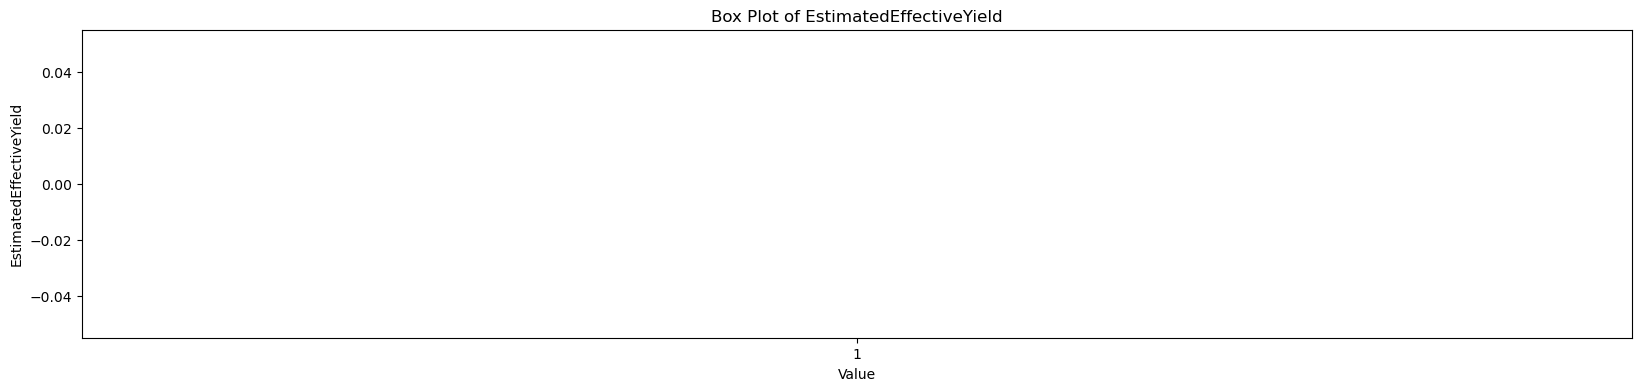

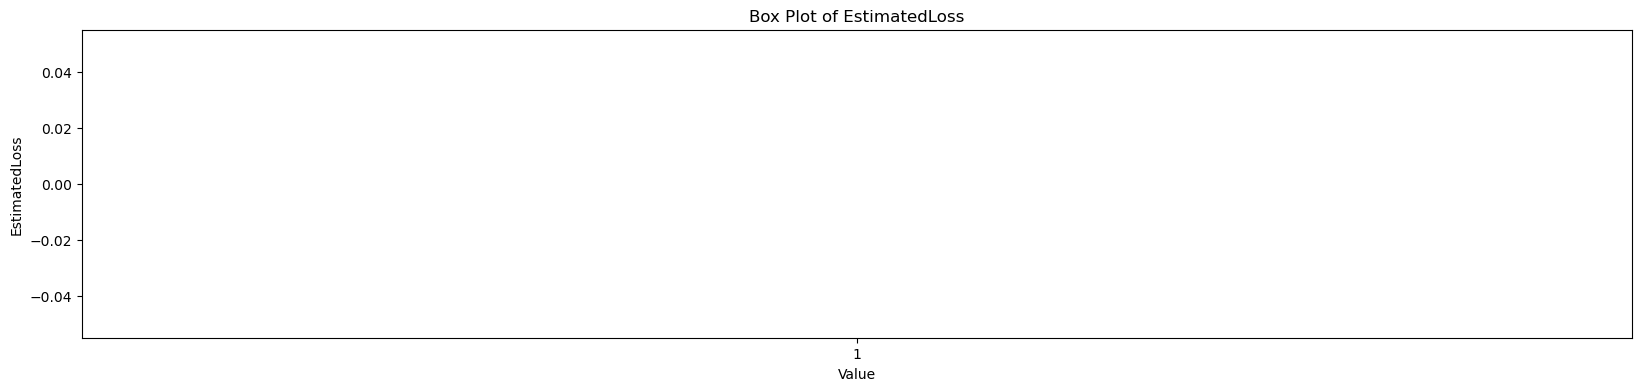

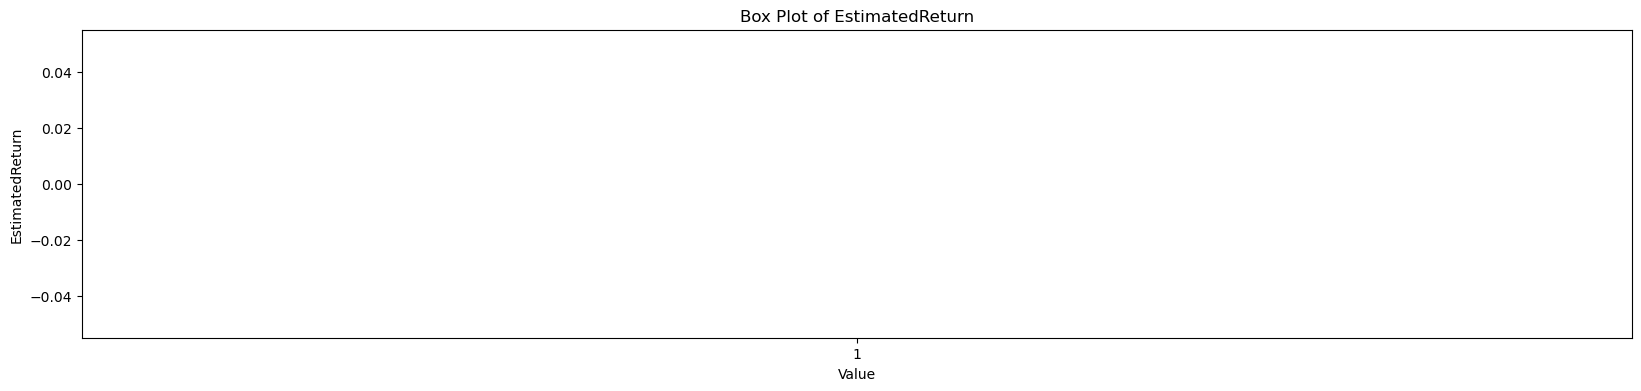

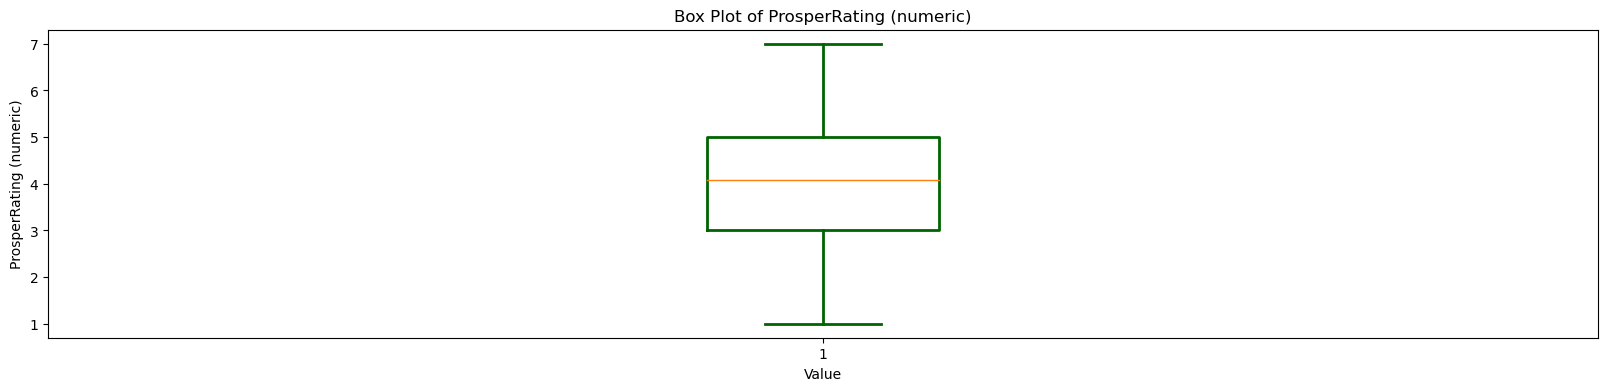

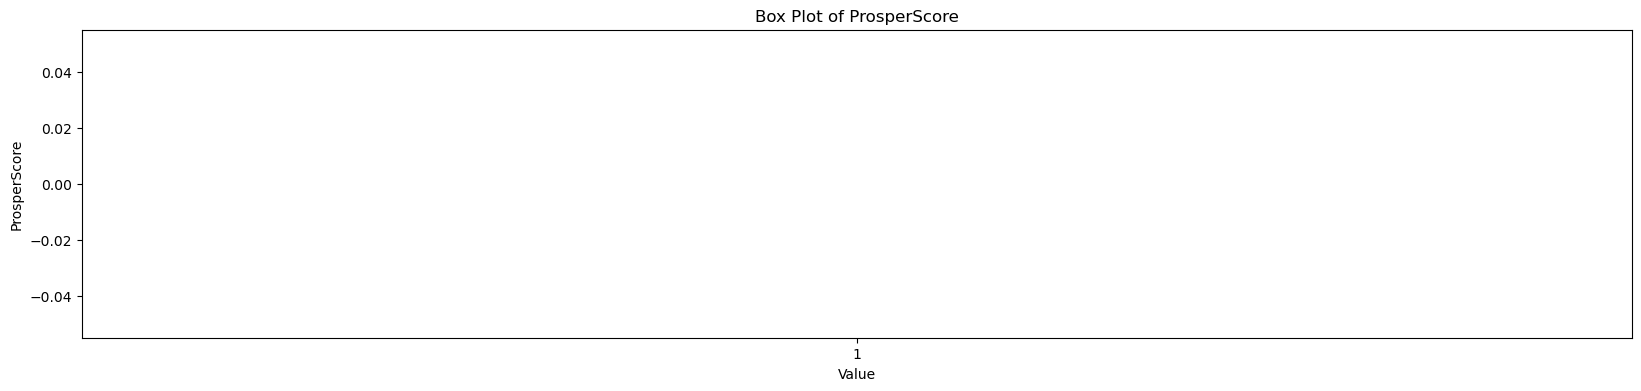

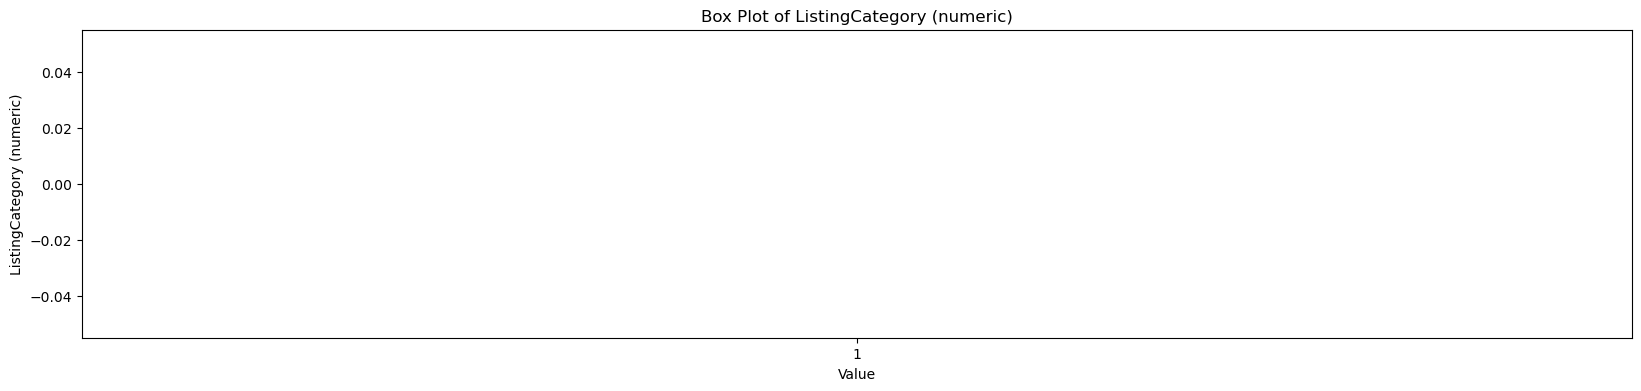

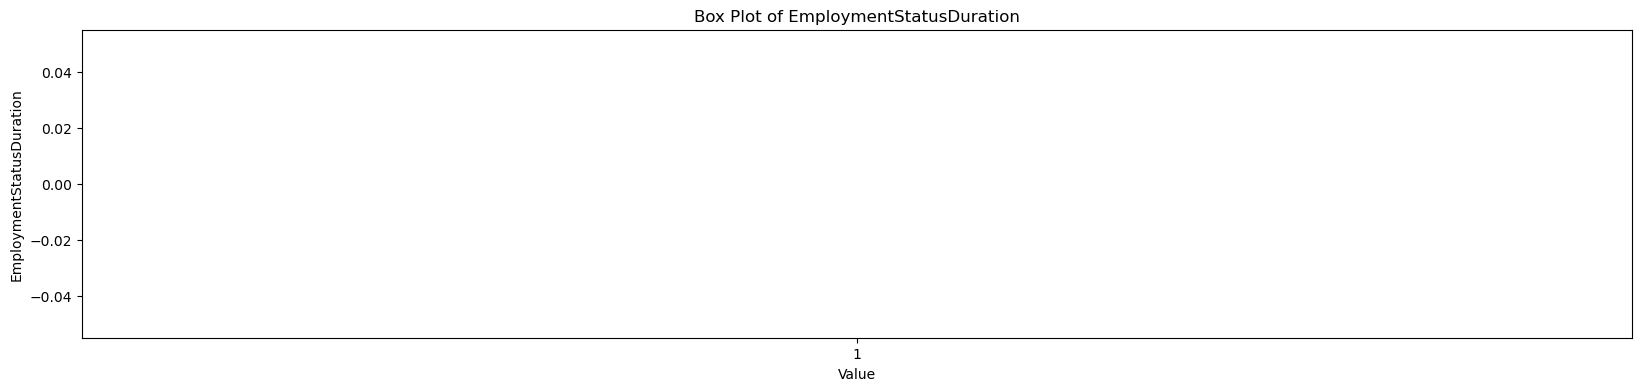

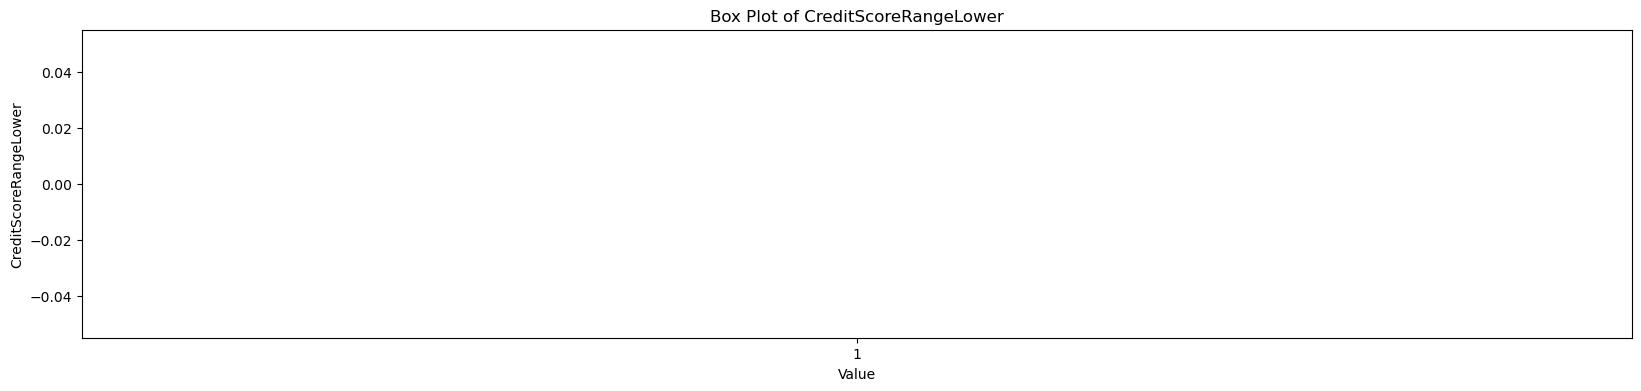

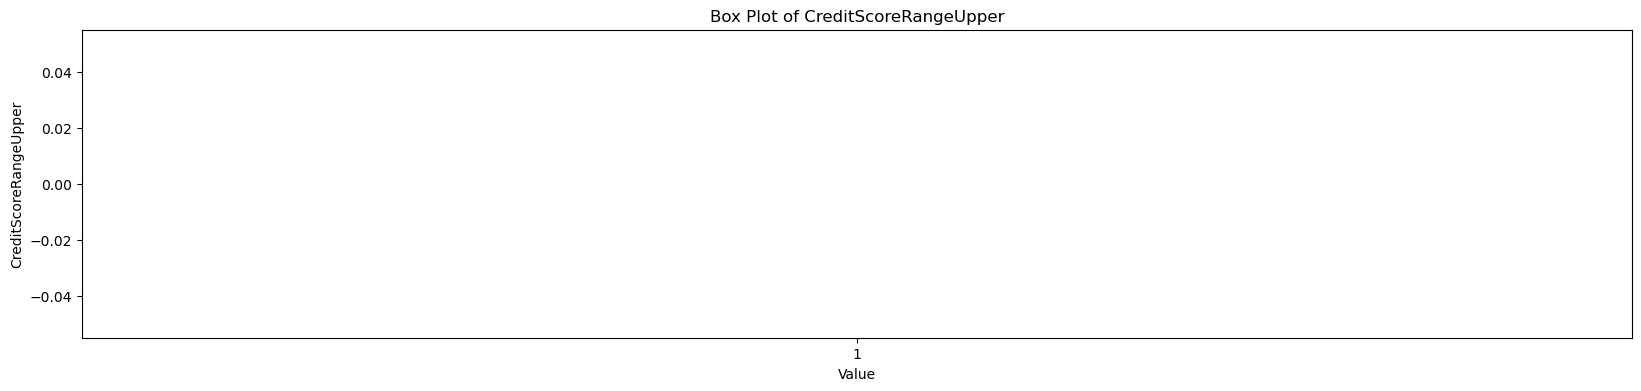

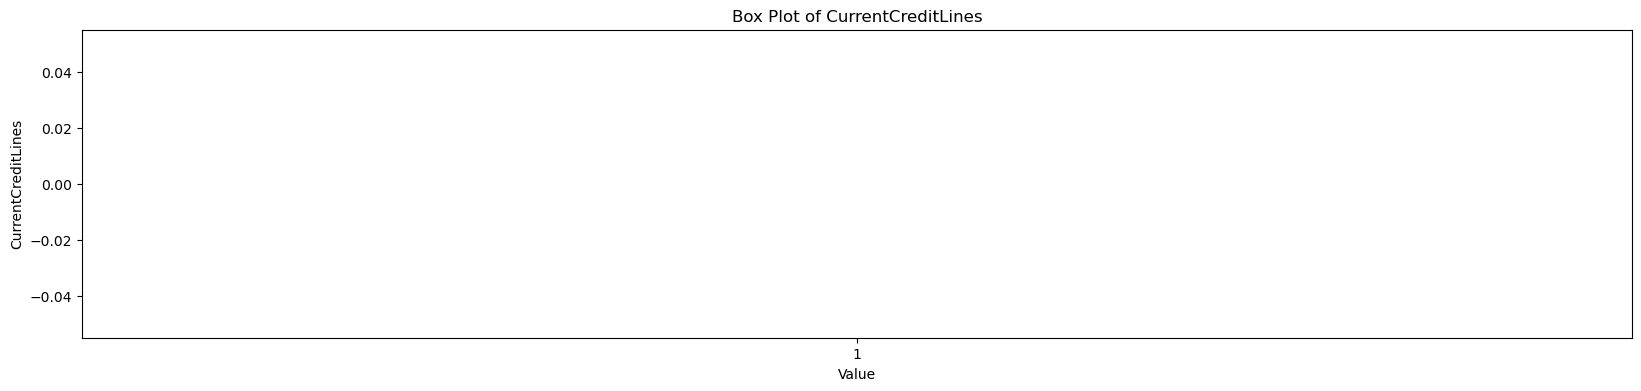

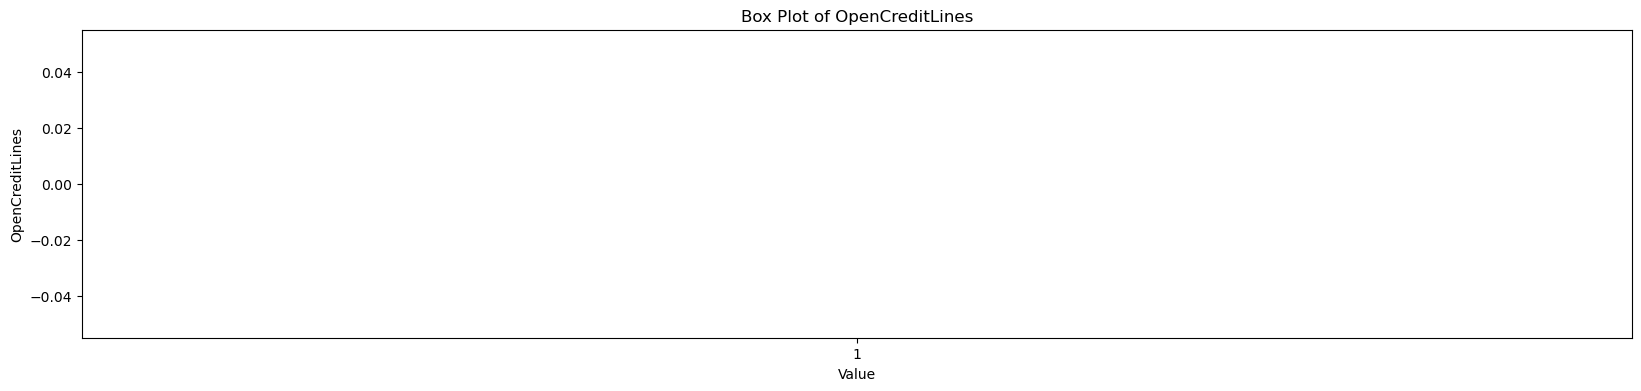

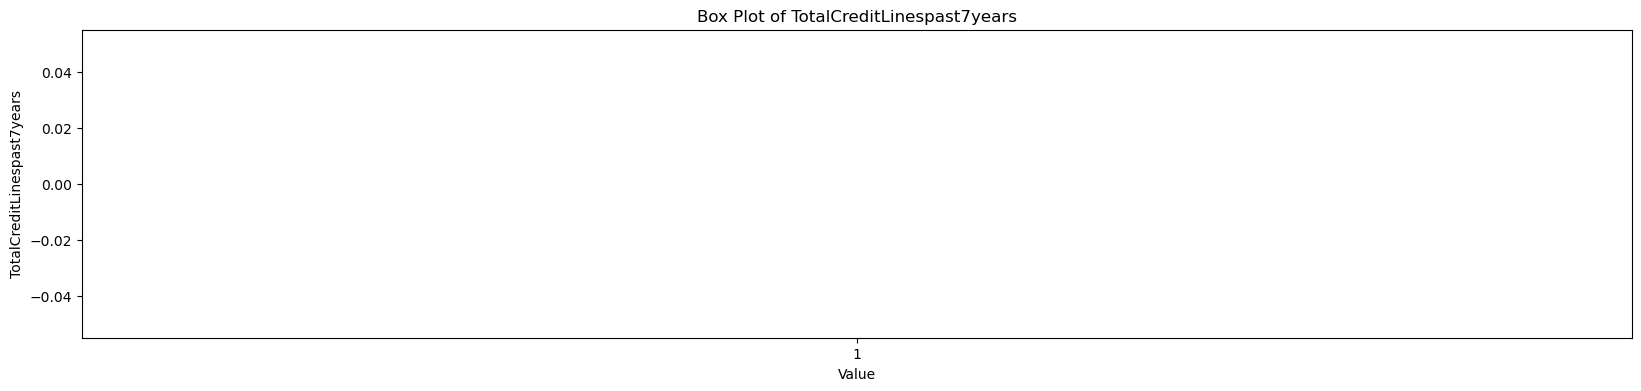

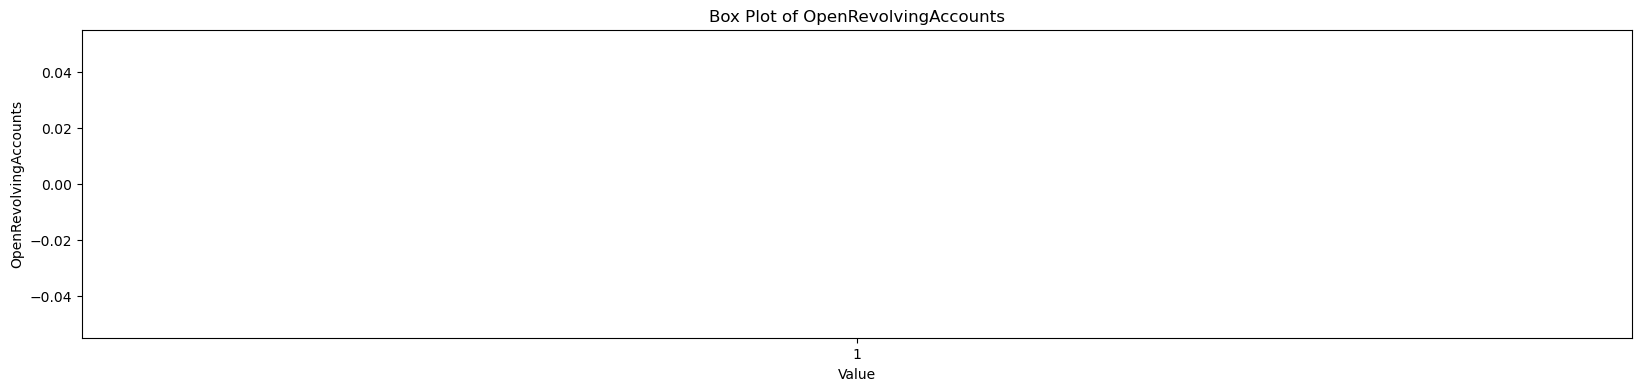

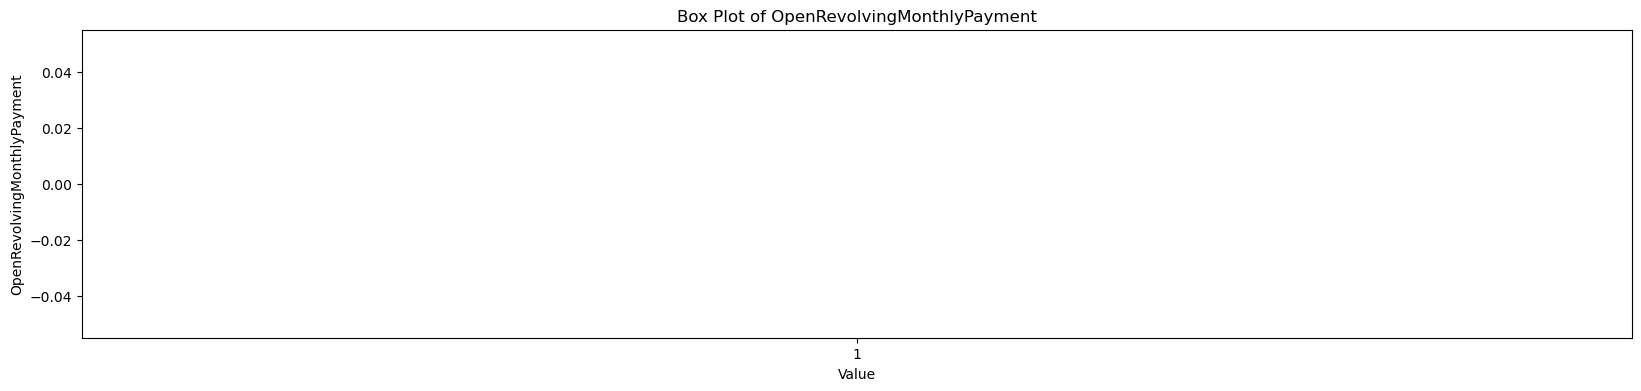

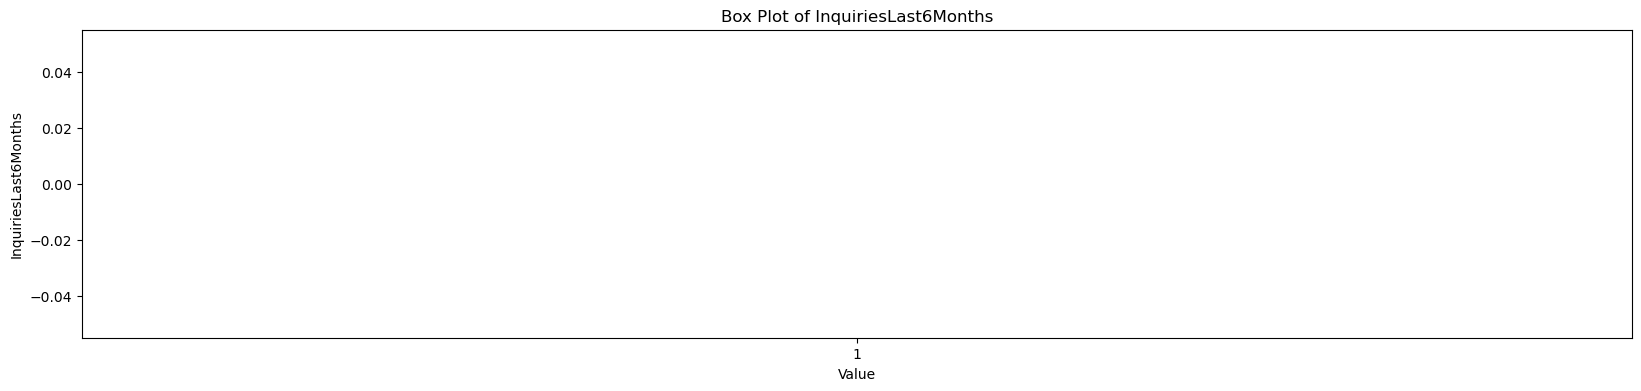

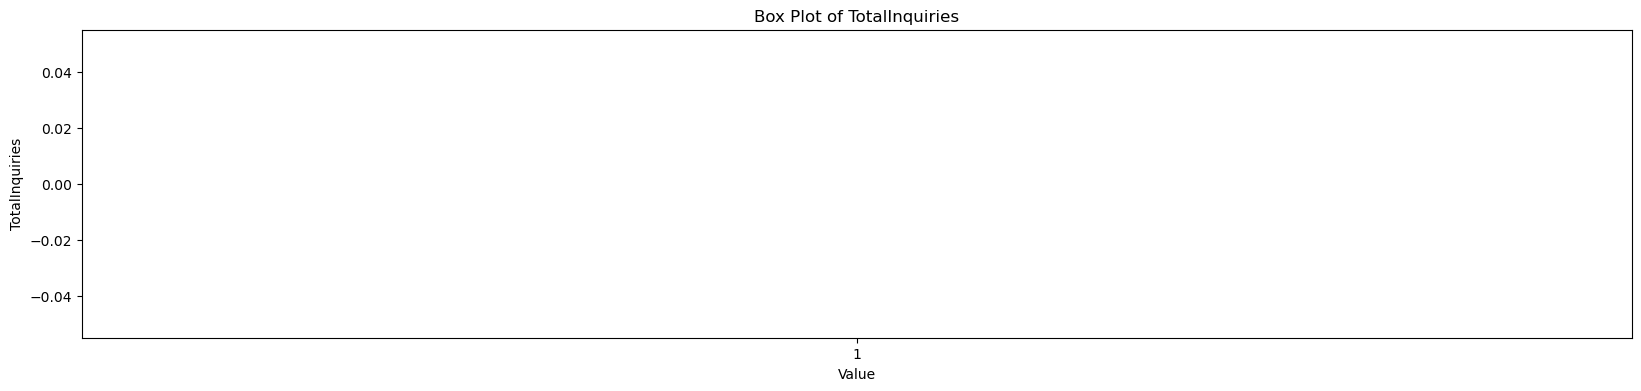

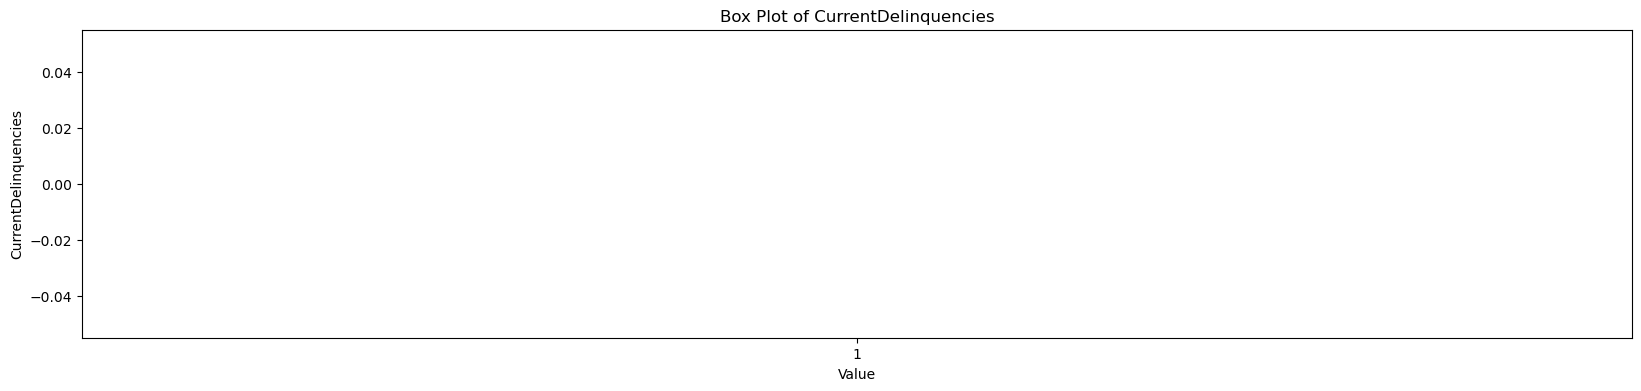

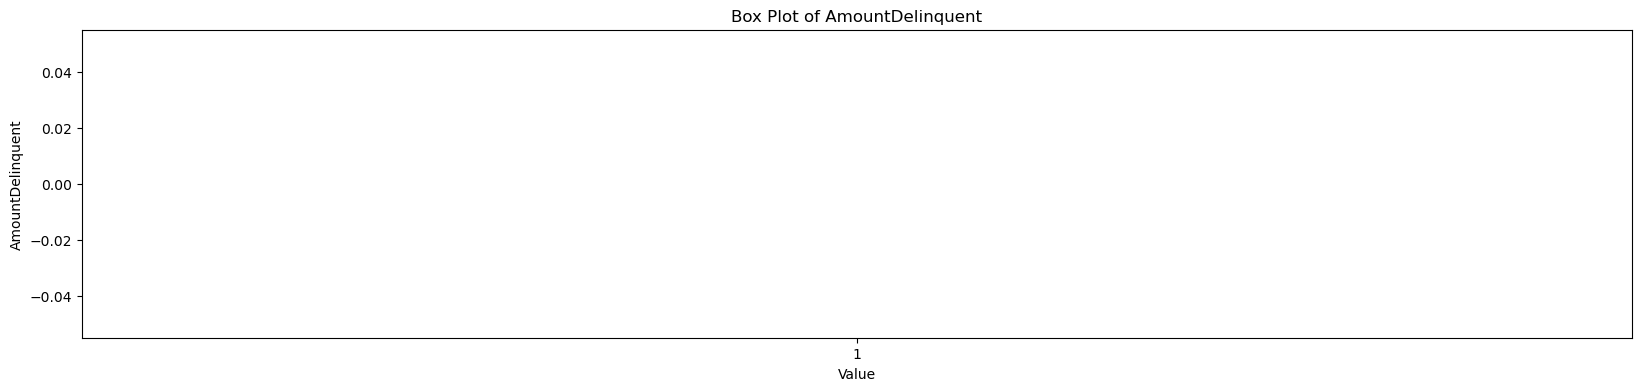

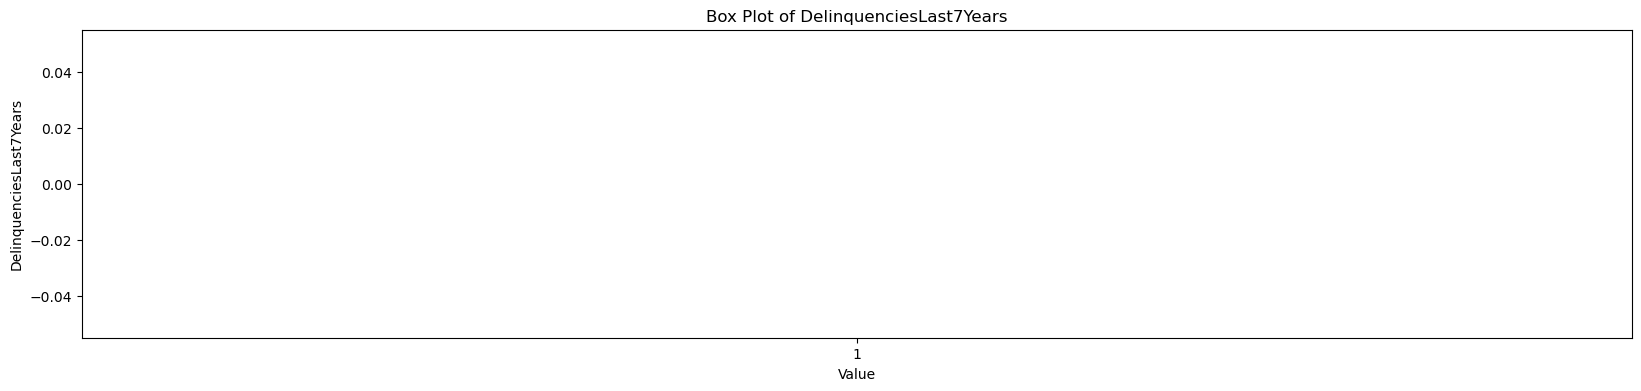

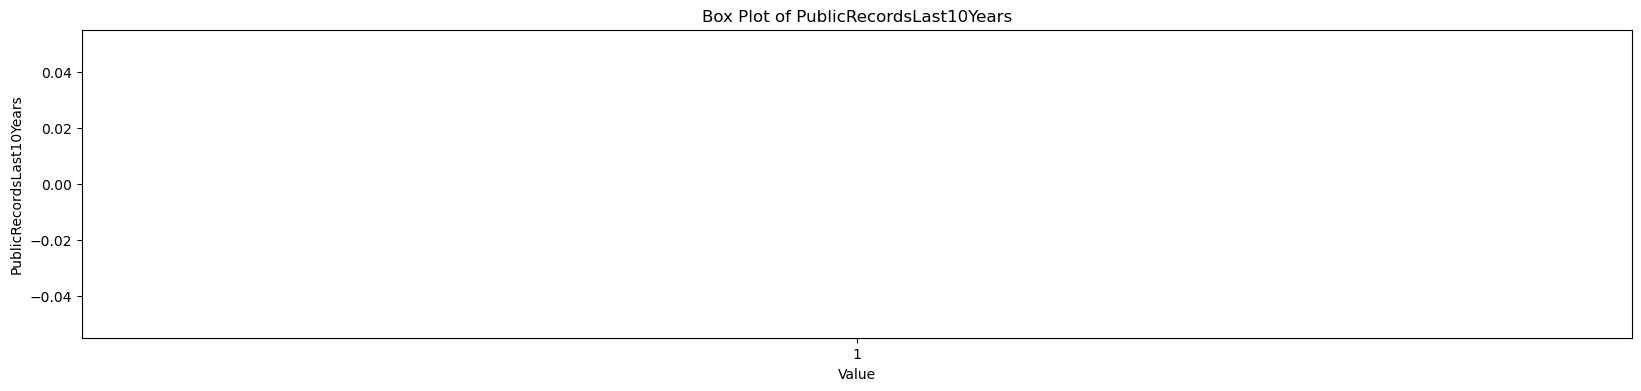

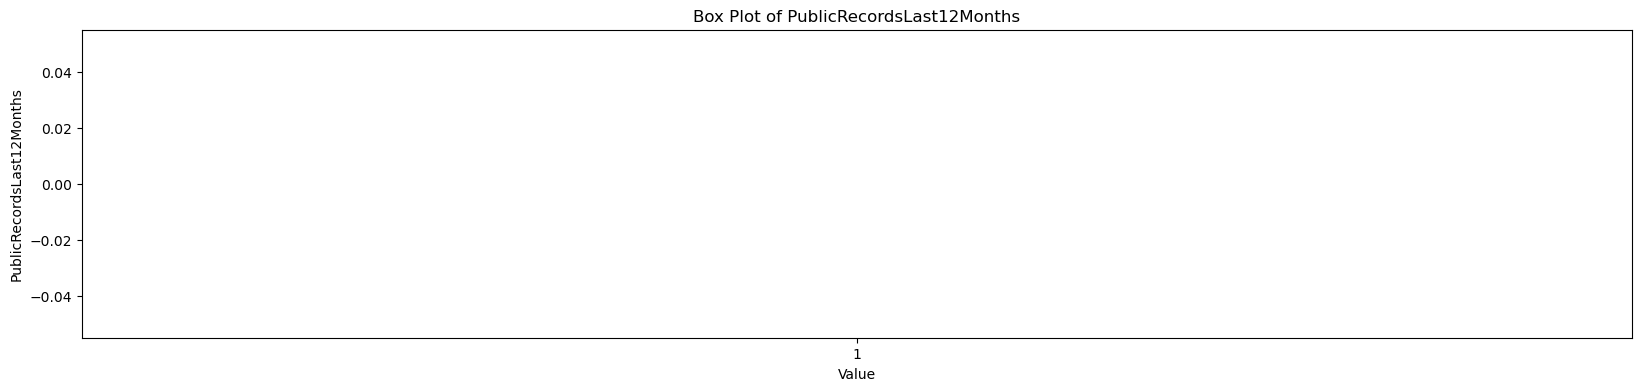

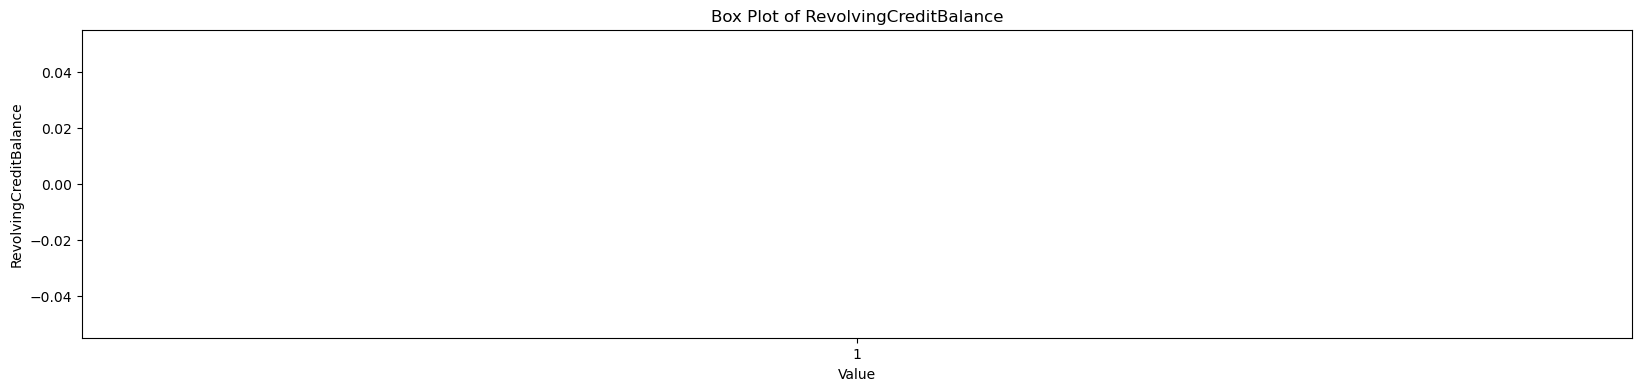

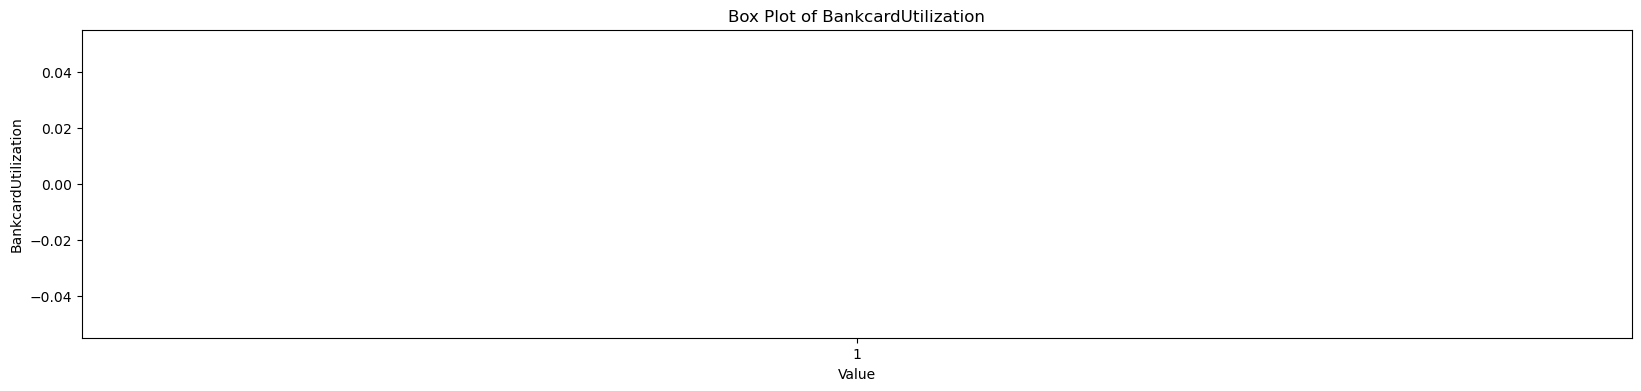

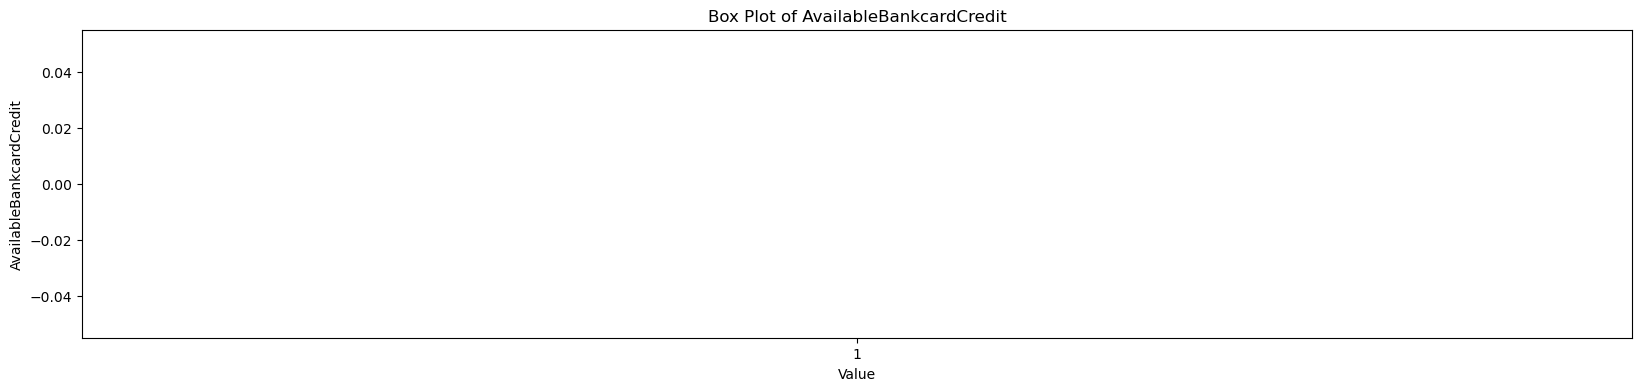

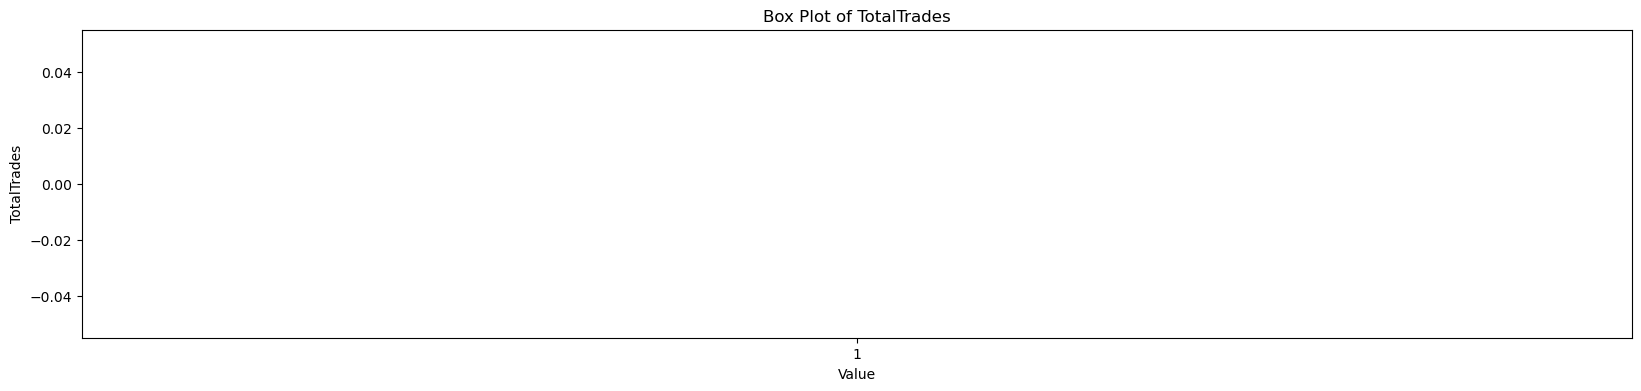

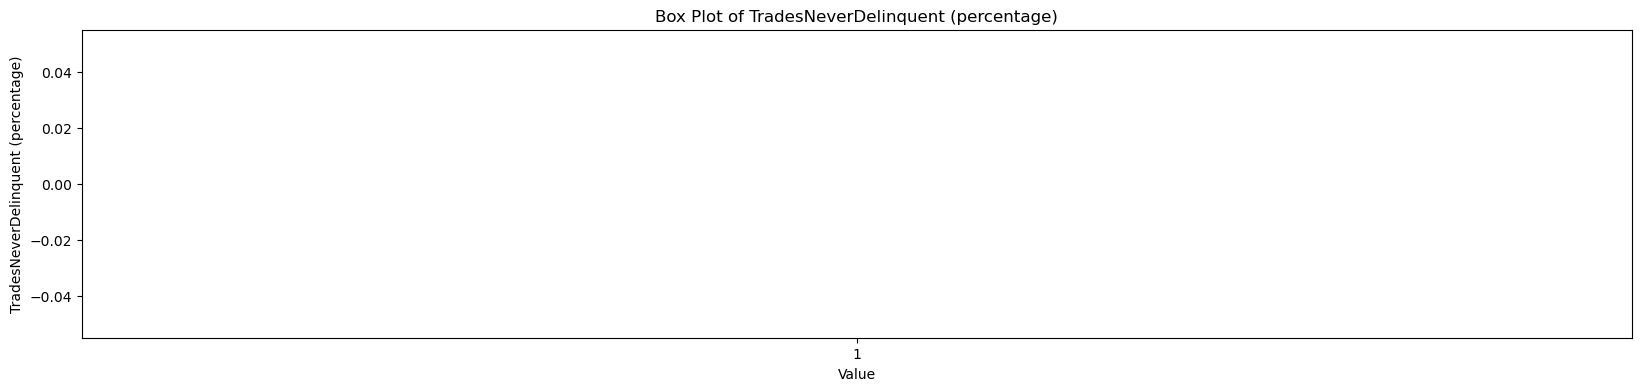

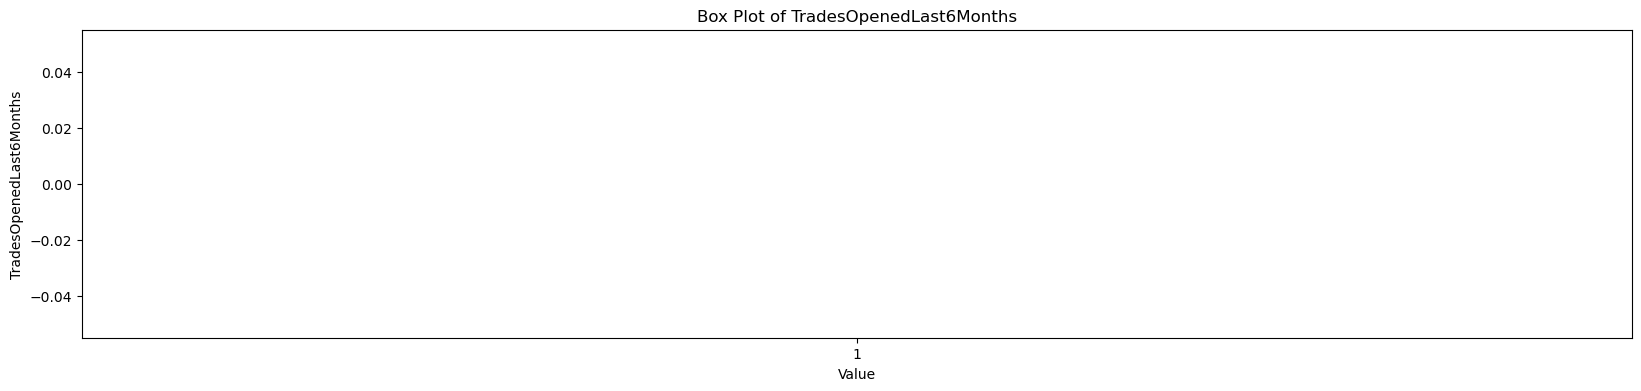

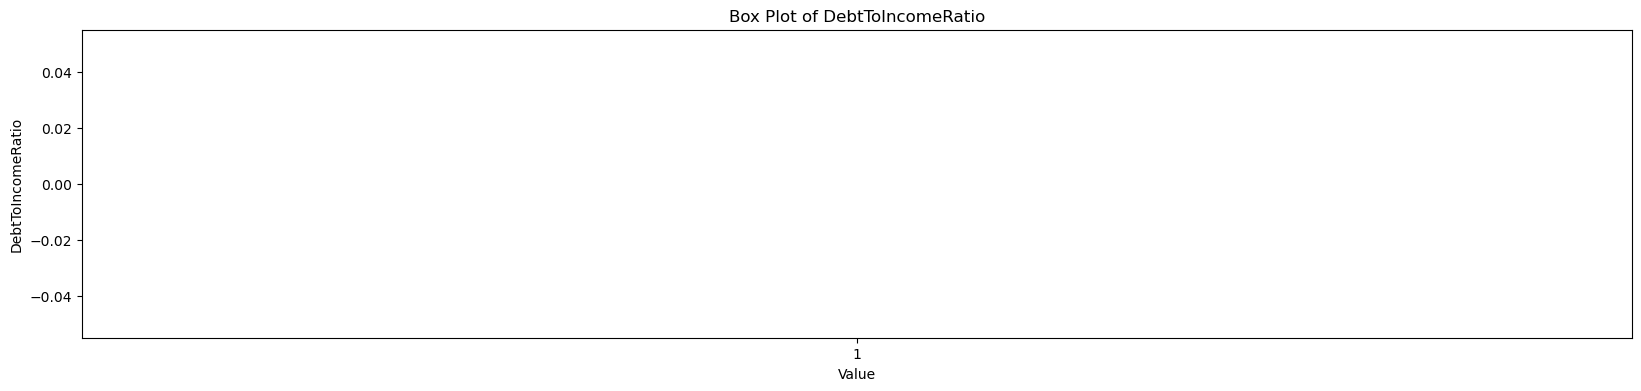

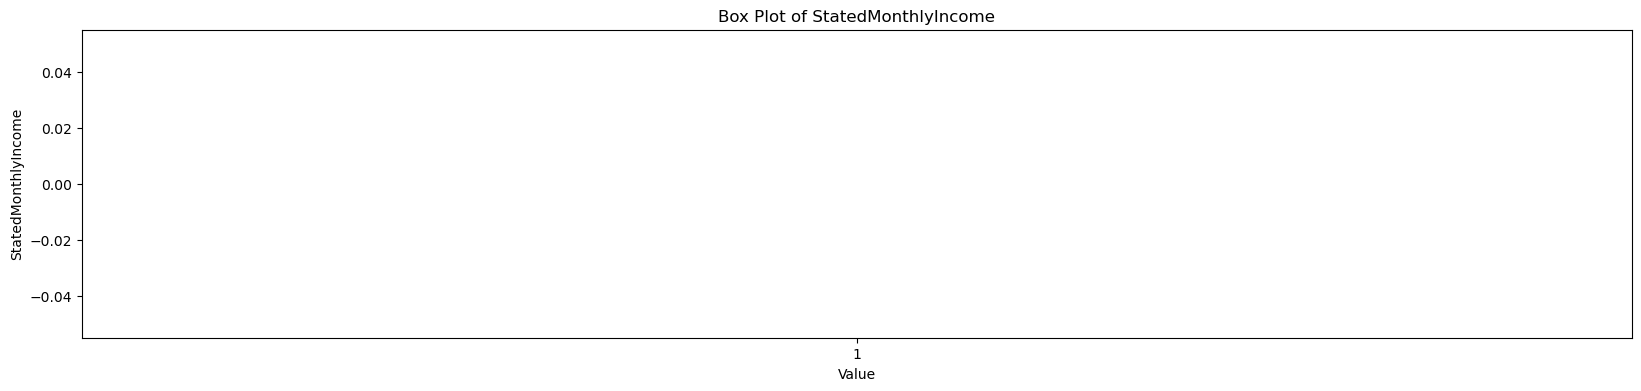

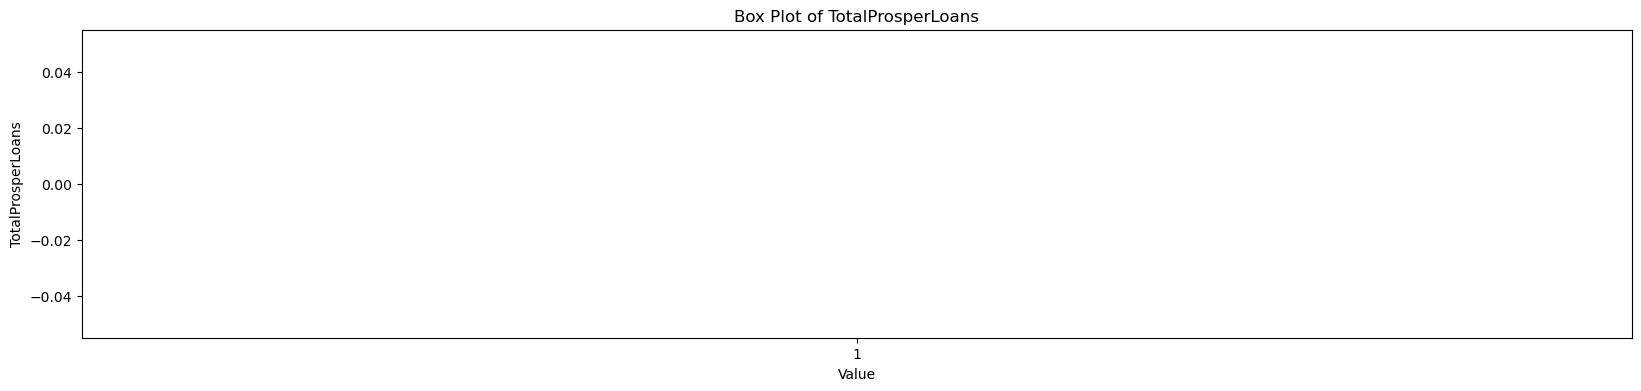

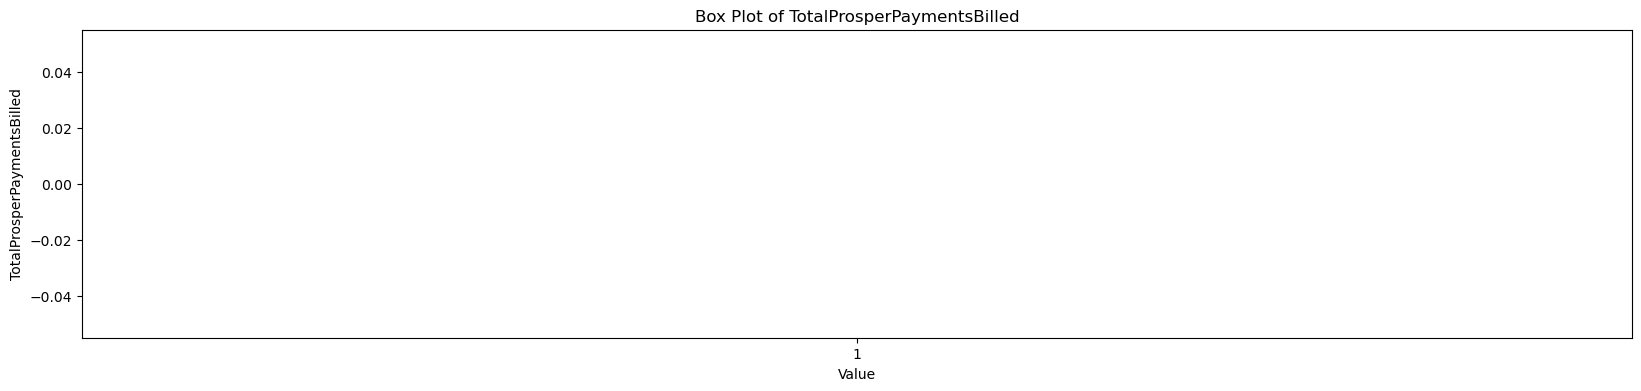

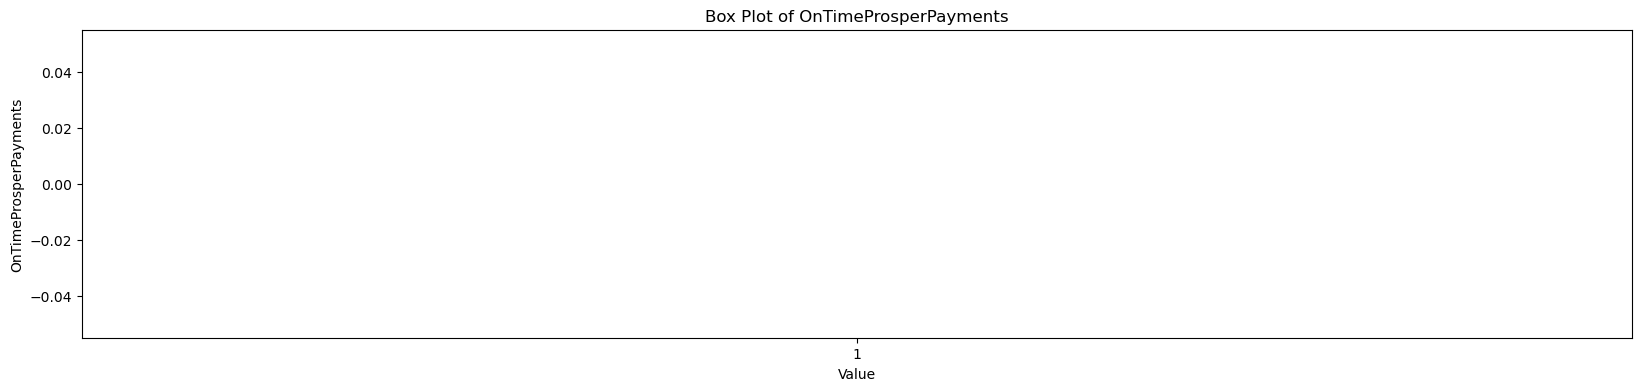

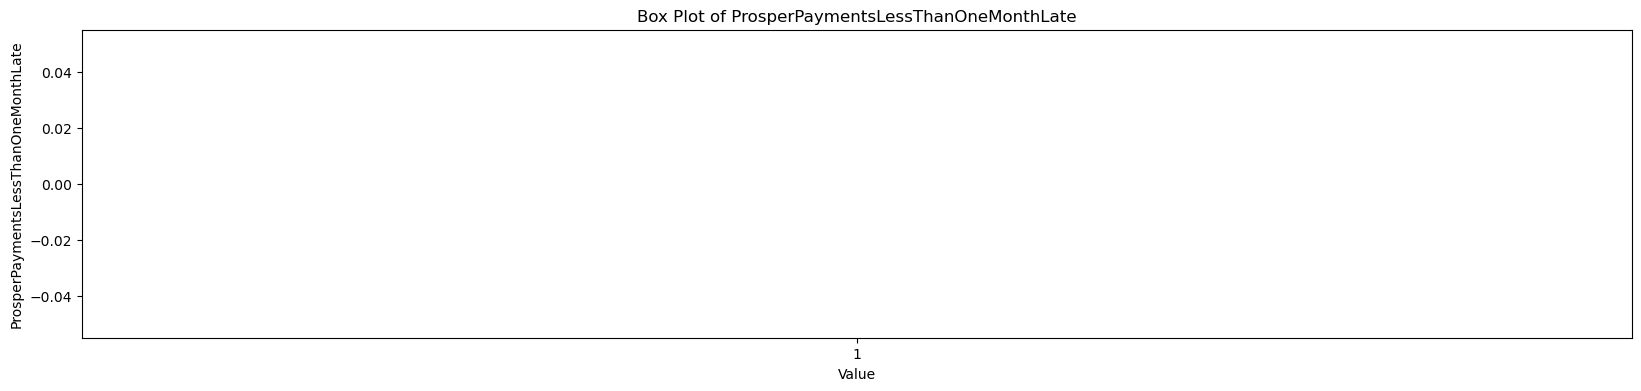

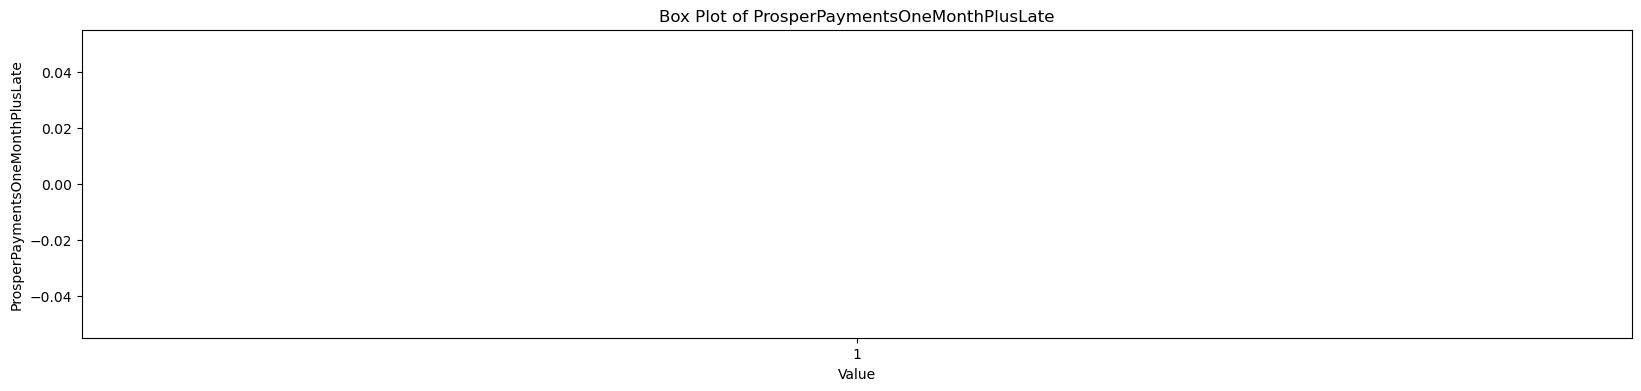

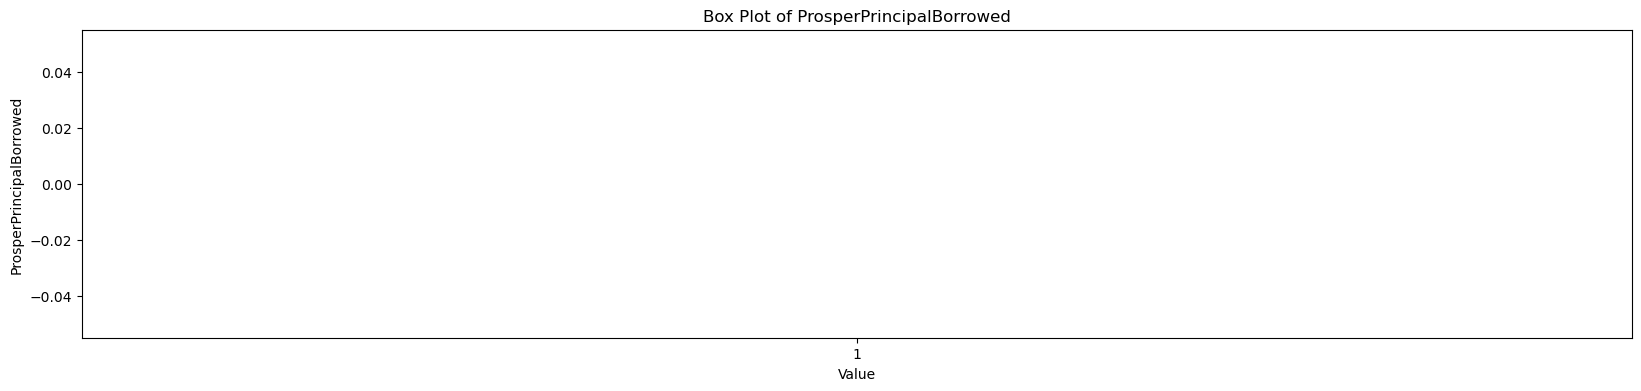

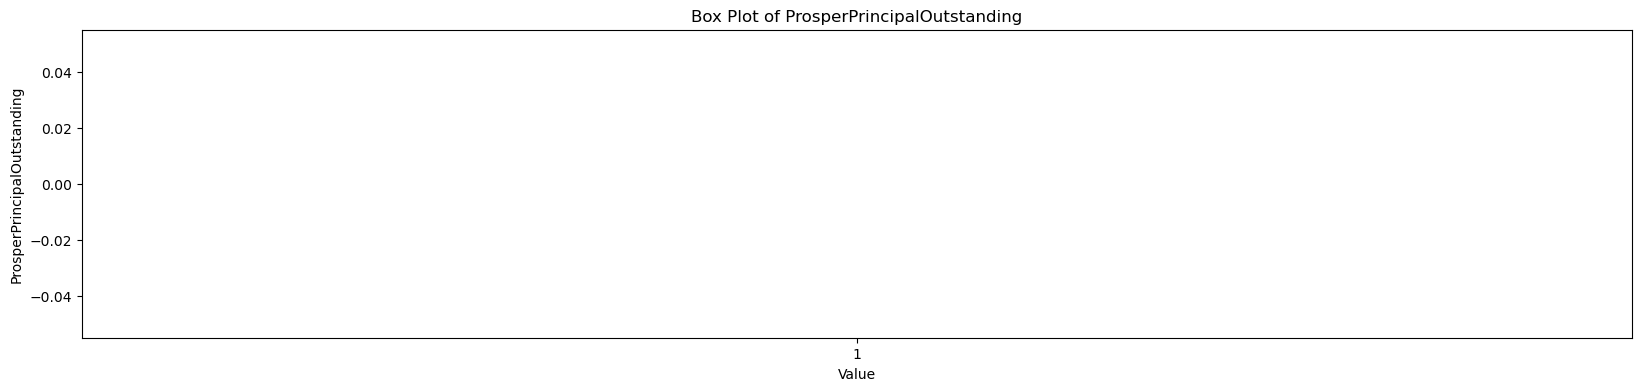

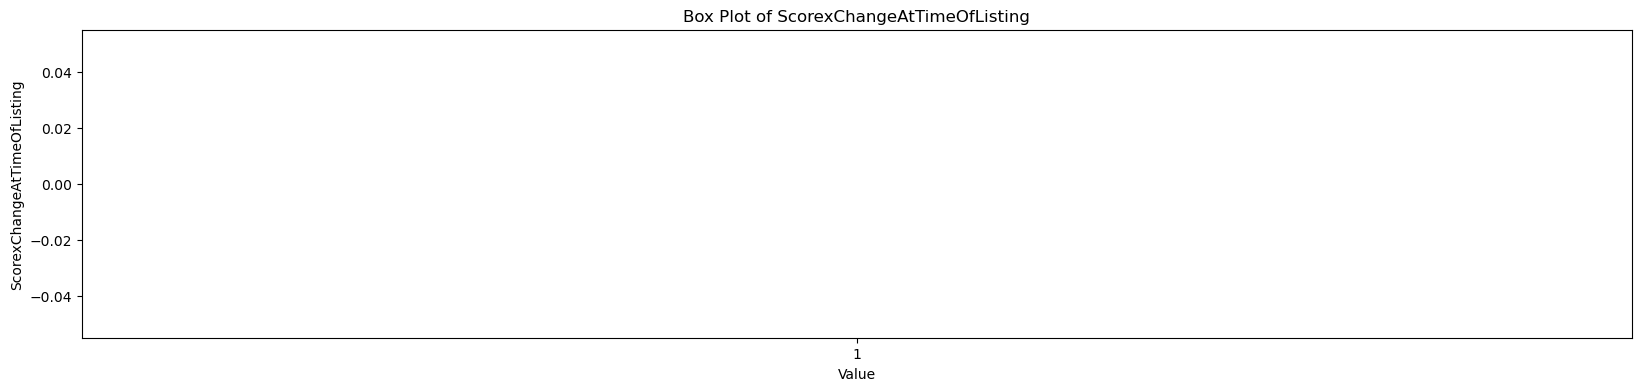

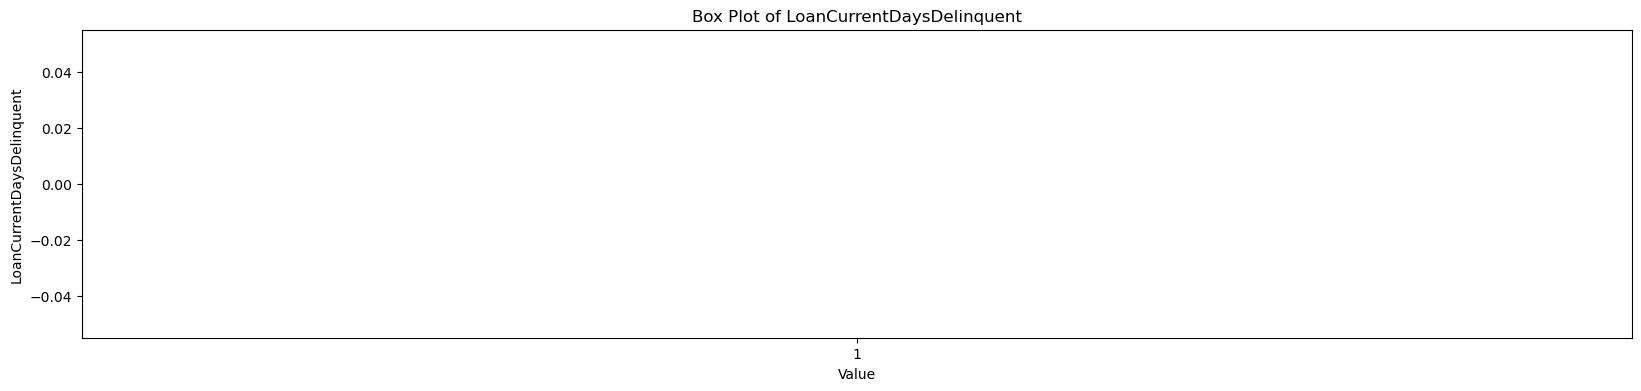

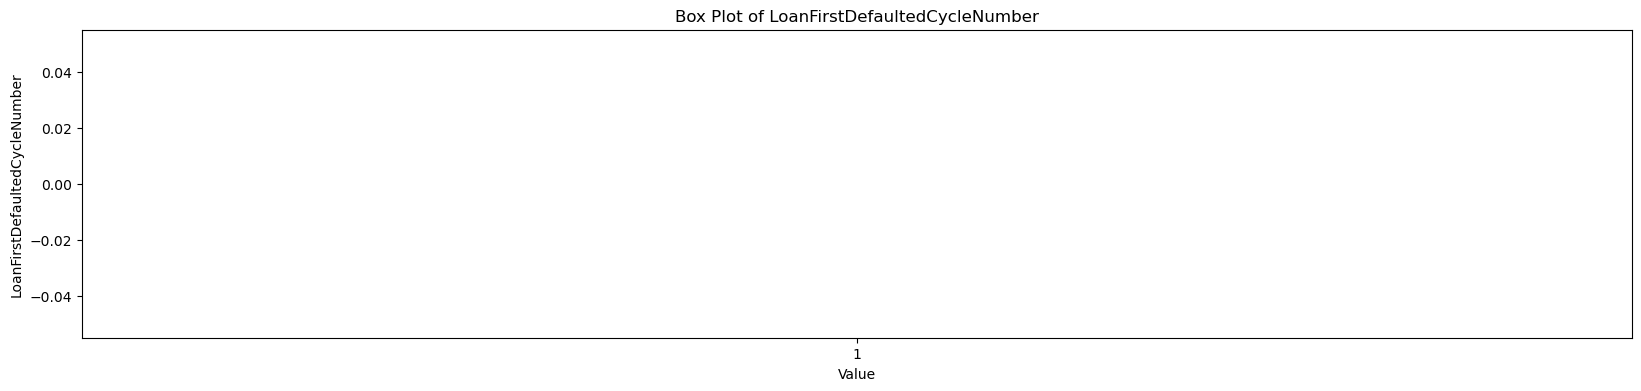

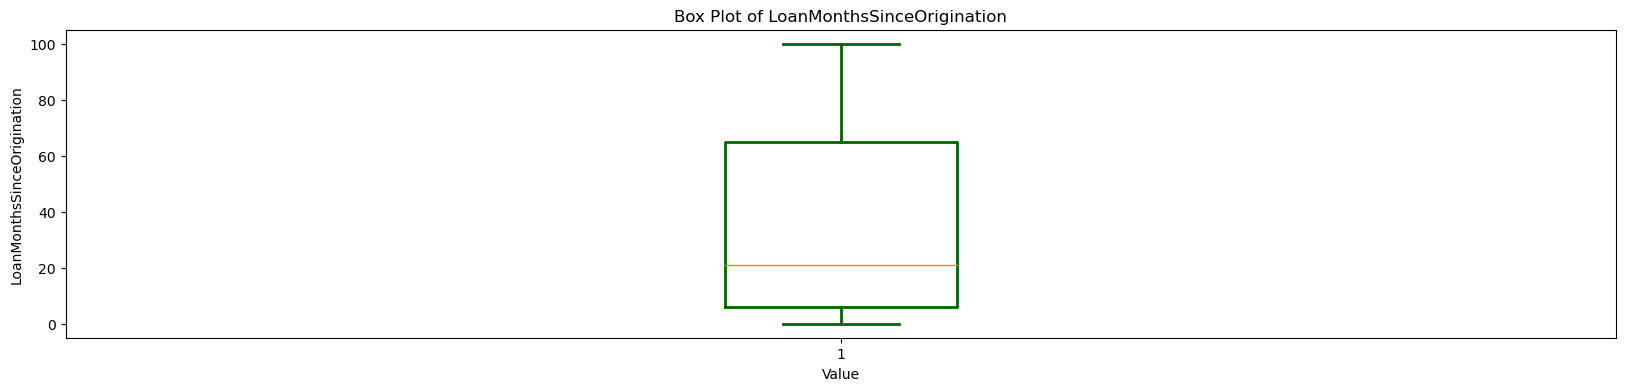

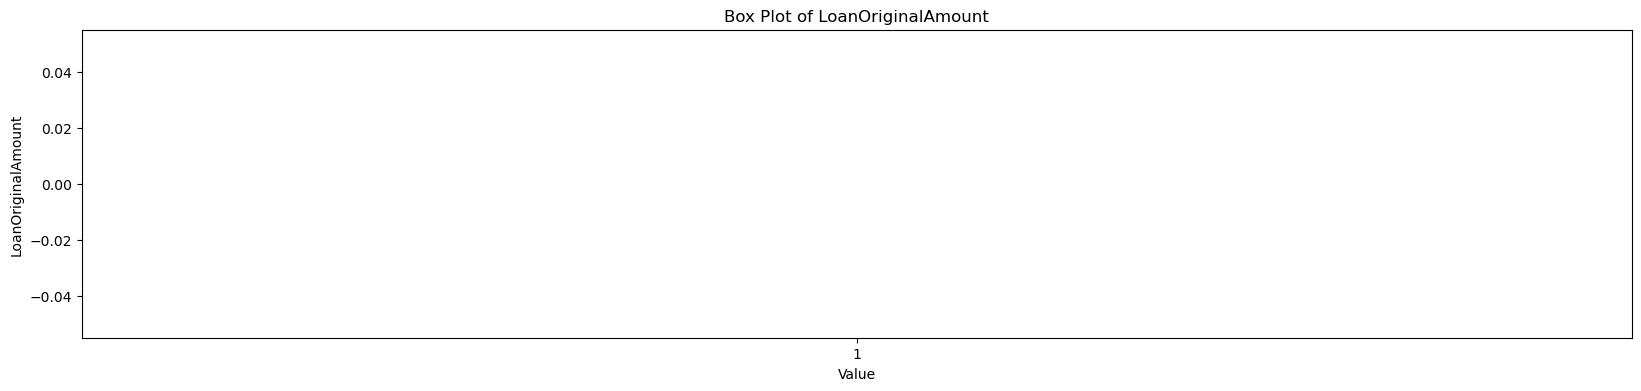

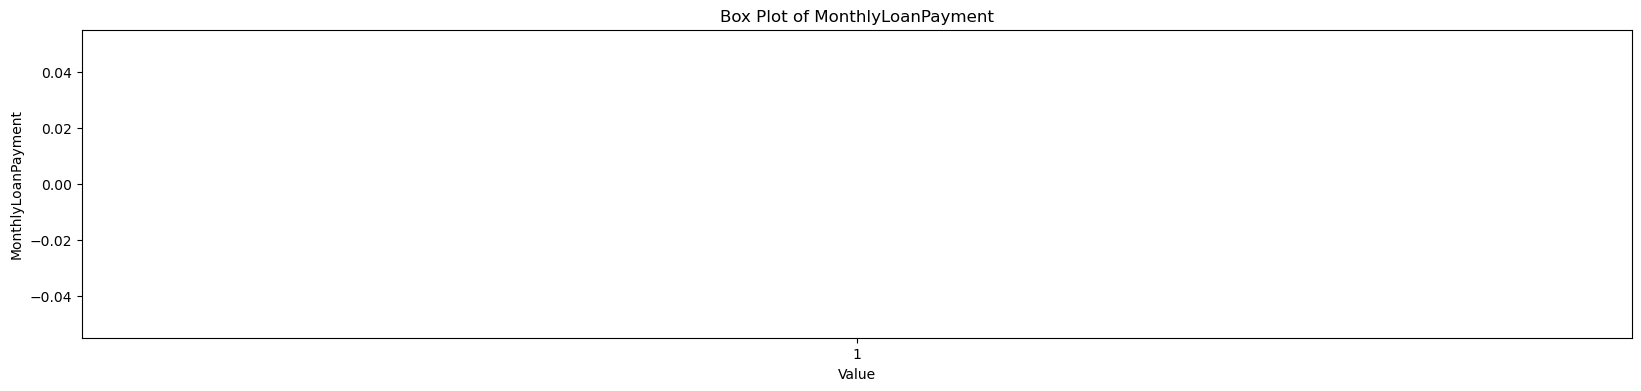

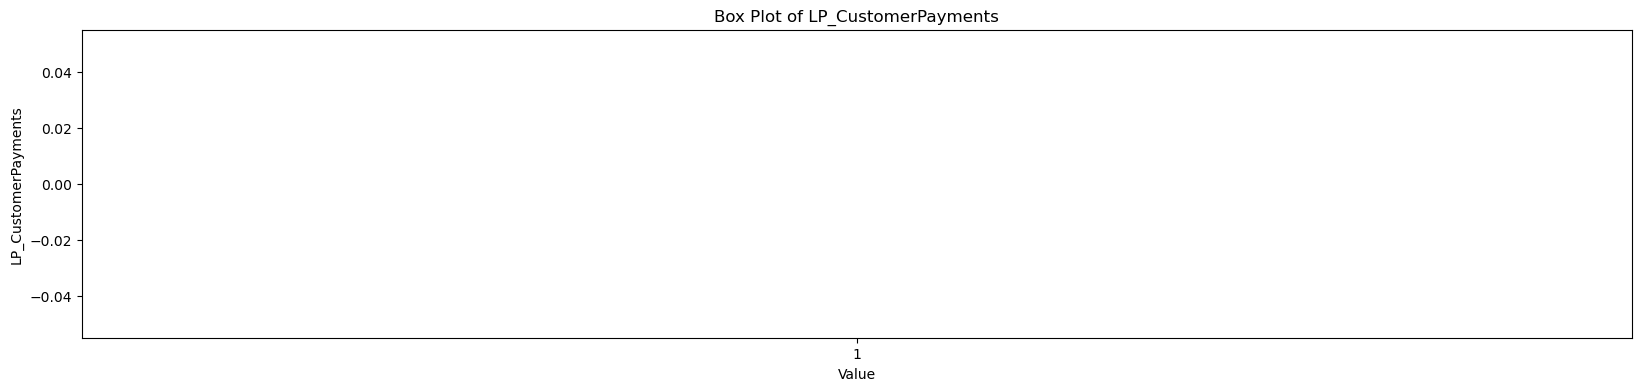

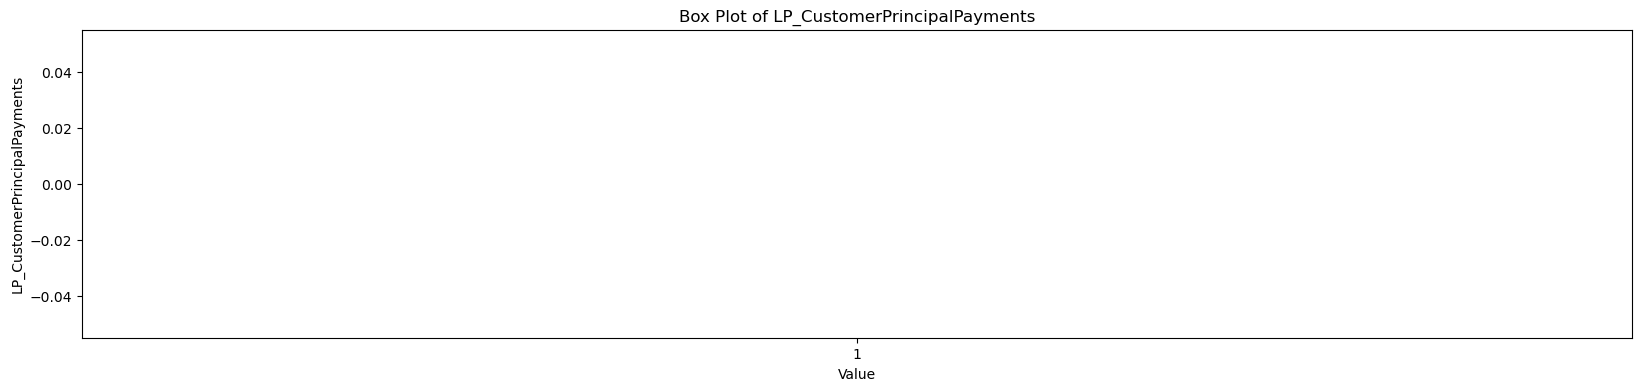

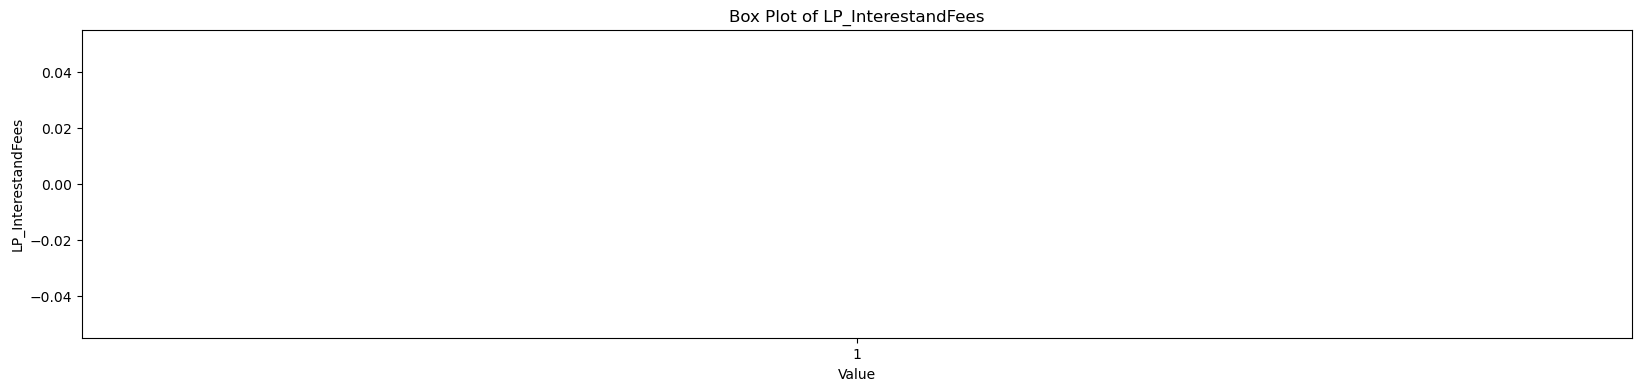

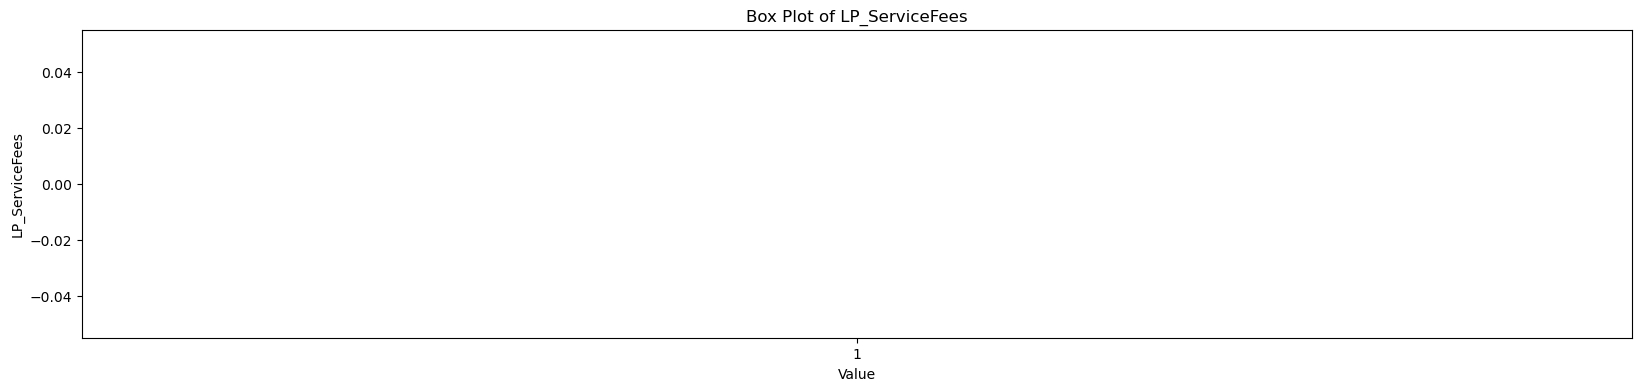

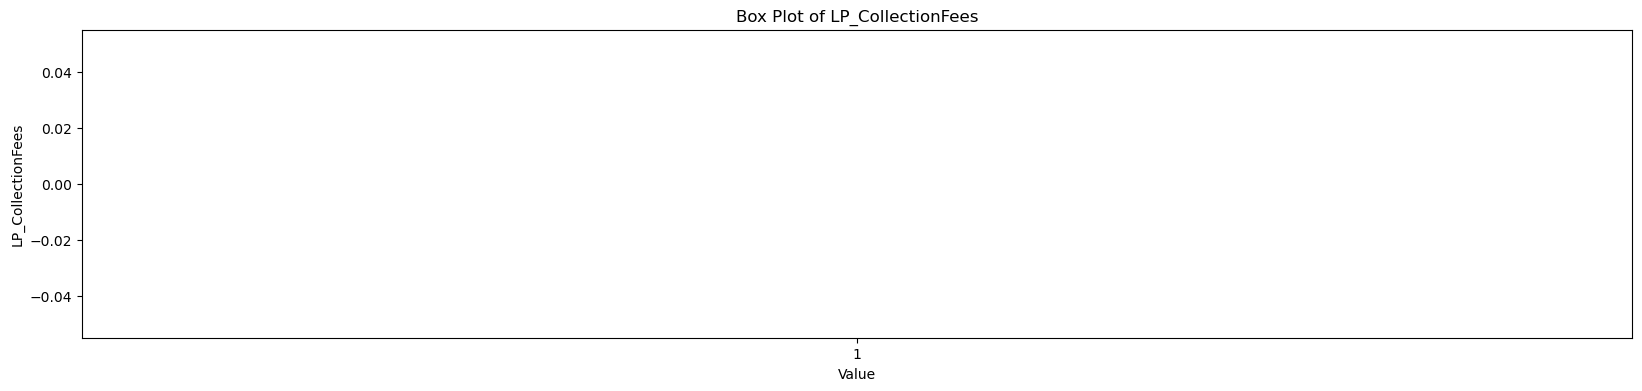

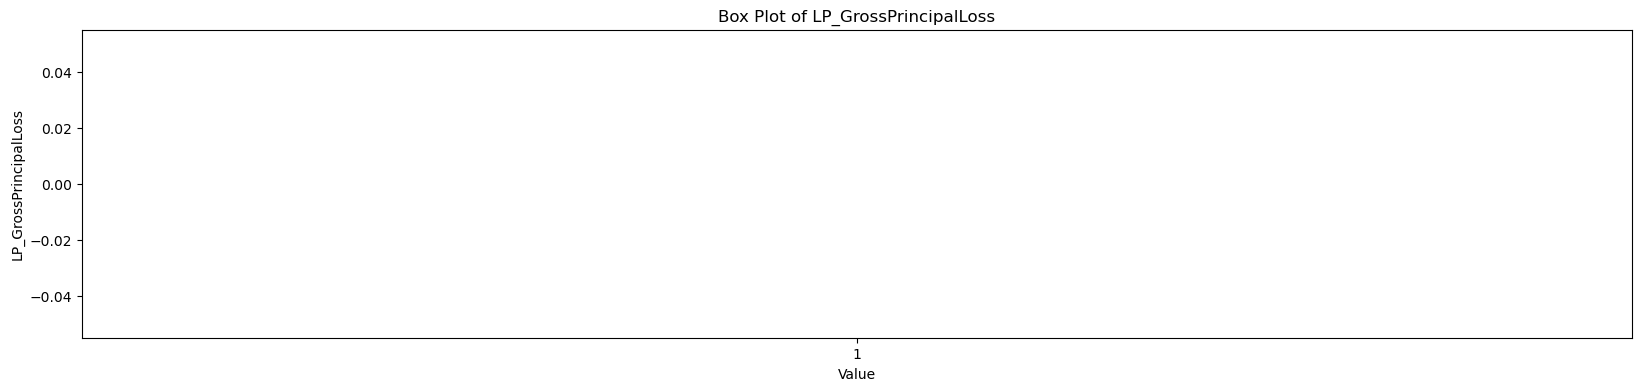

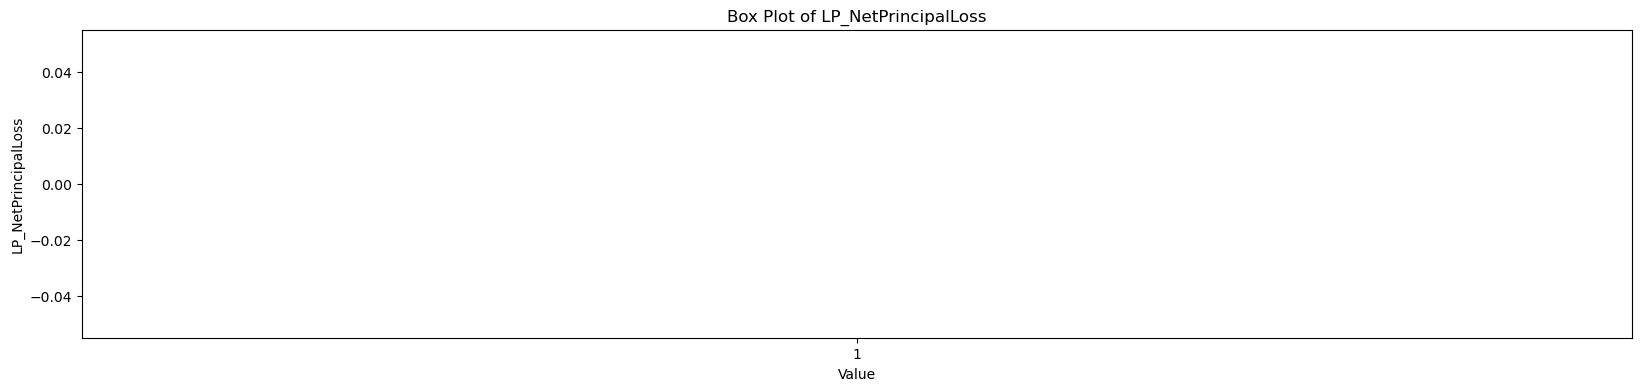

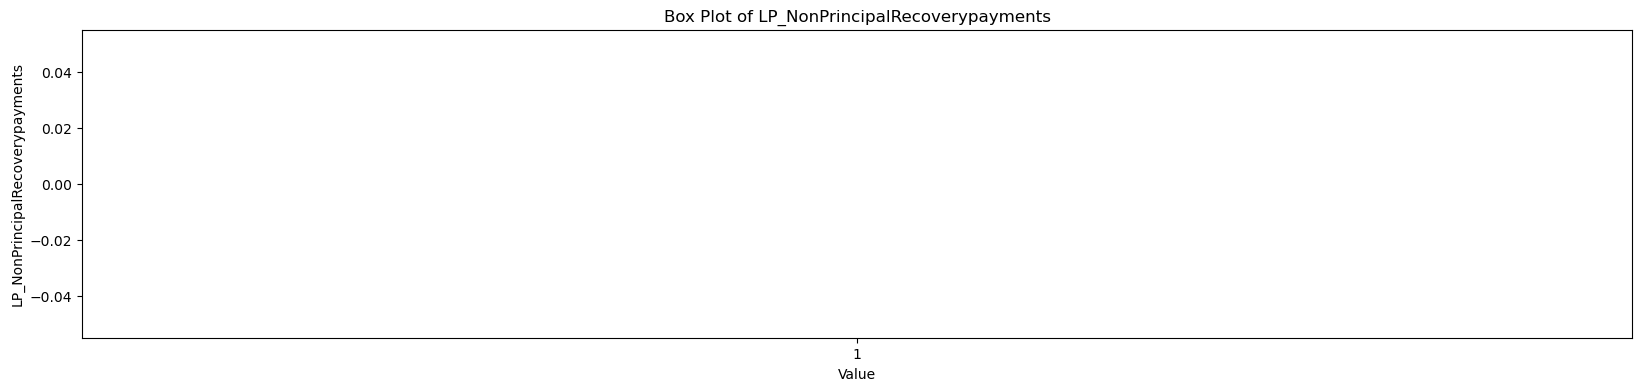

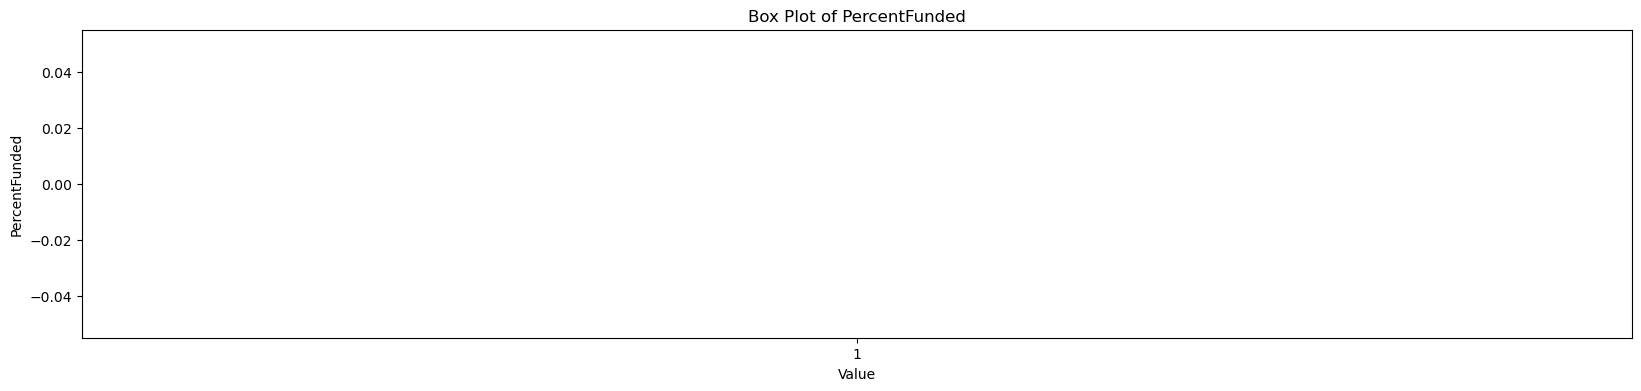

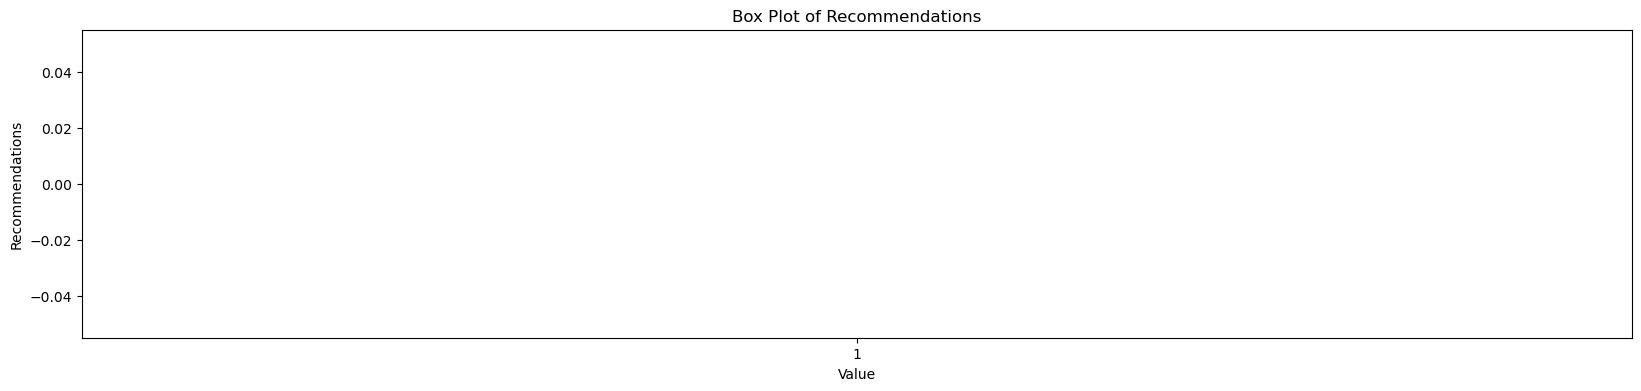

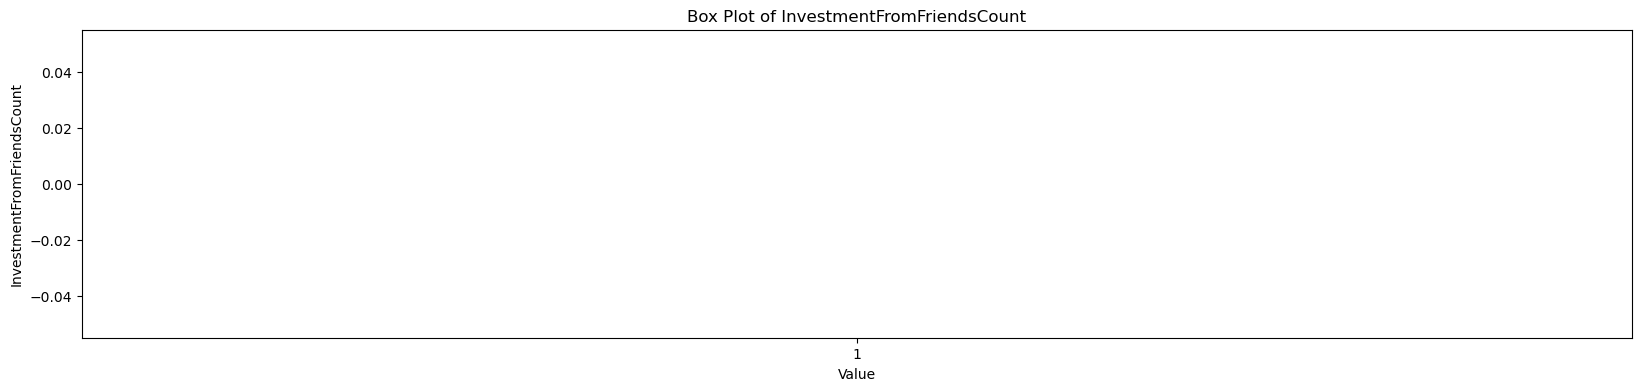

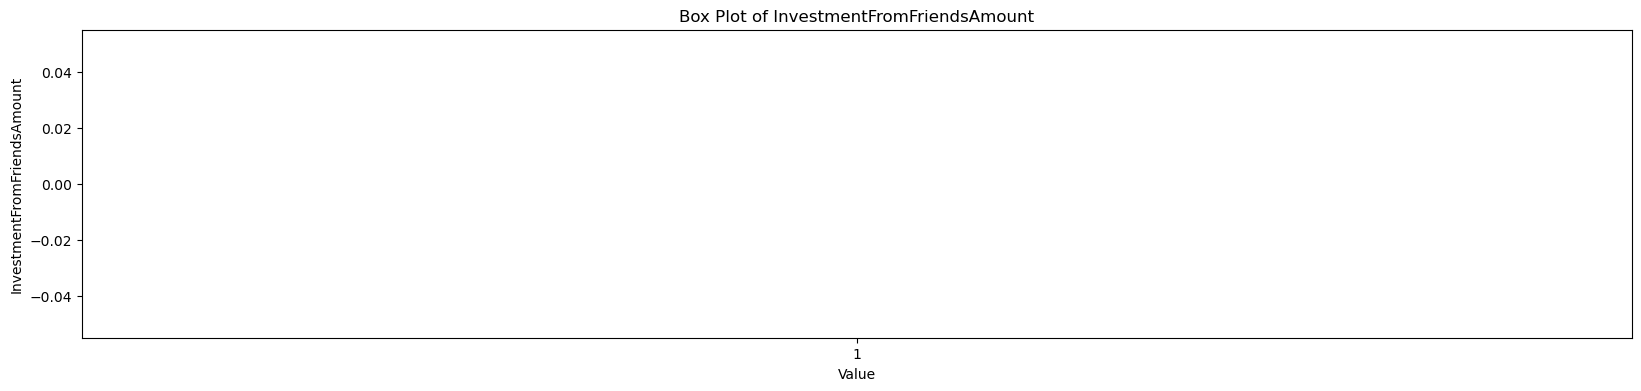

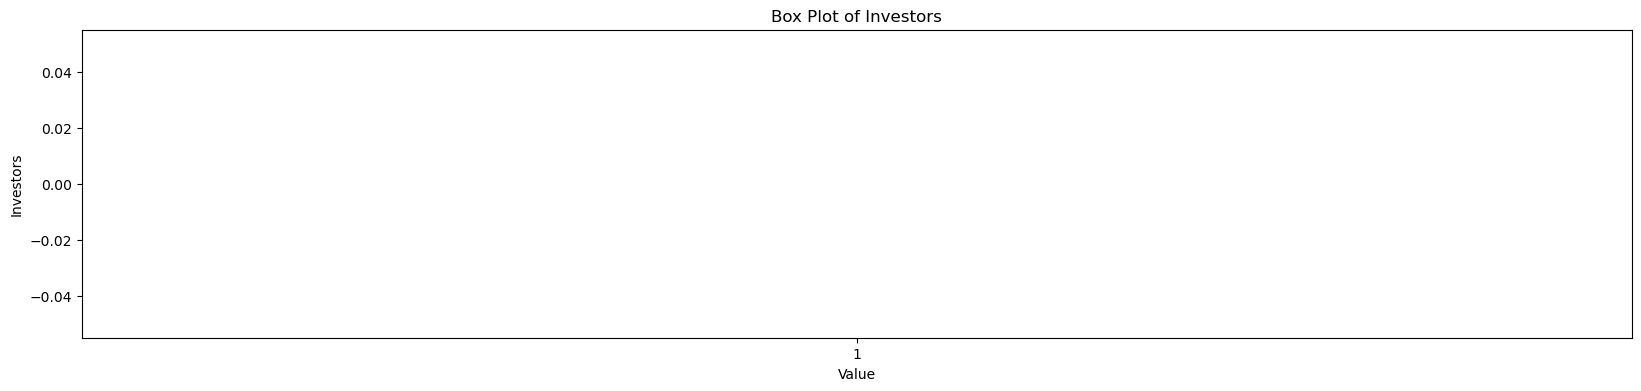

In [29]:
# Again creating the custom design for boxplots 
boxprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen' )
whiskerprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen')
capprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen')
flierprops = dict(marker = 'o', markersize = 5, markerfacecolor = 'darkgreen', markeredgecolor = 'darkblue')

# Creating boxplots for all oultliers cleaned columns
for column in num_cols:
    fig, ax = plt.subplots(figsize = (20, 4))
    ax.boxplot(num_cols[column], boxprops = boxprops, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)
    plt.show()

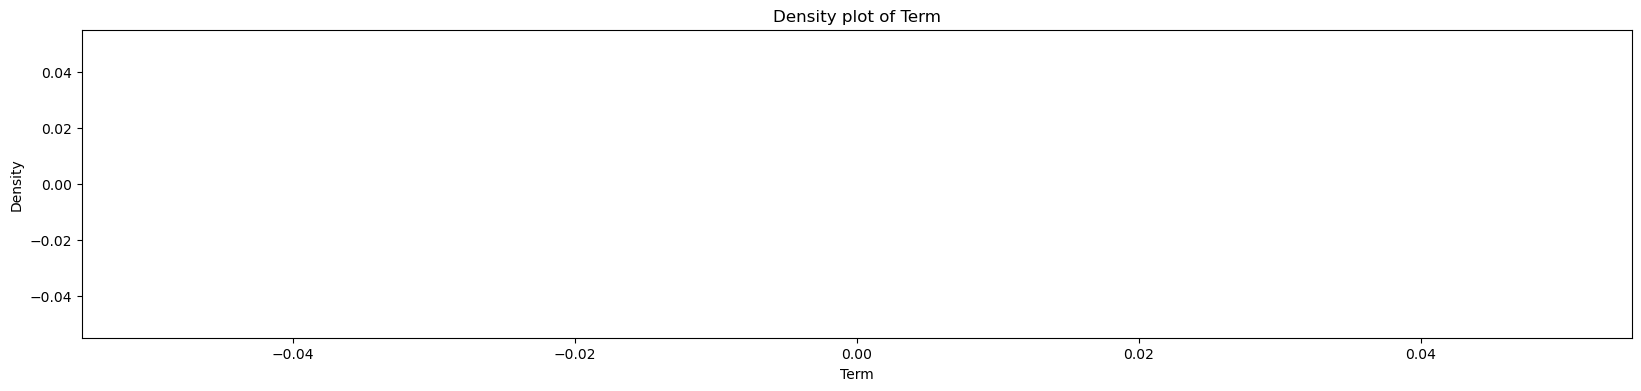

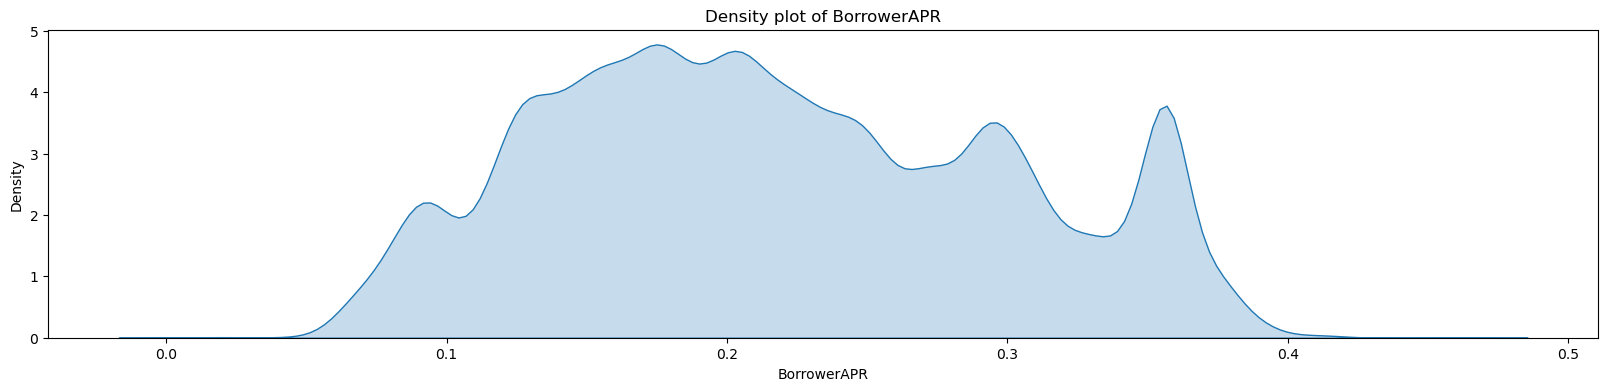

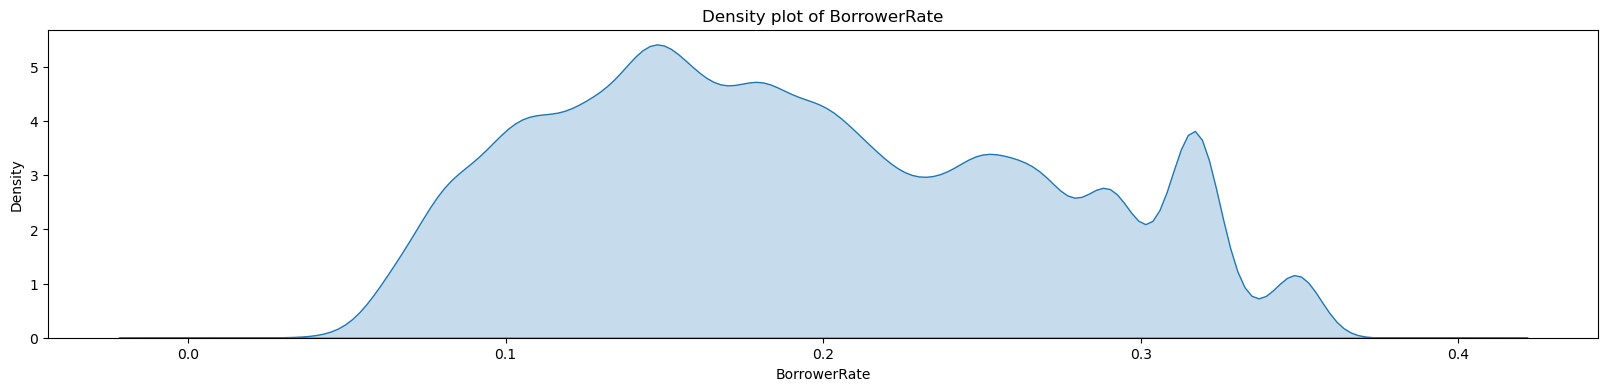

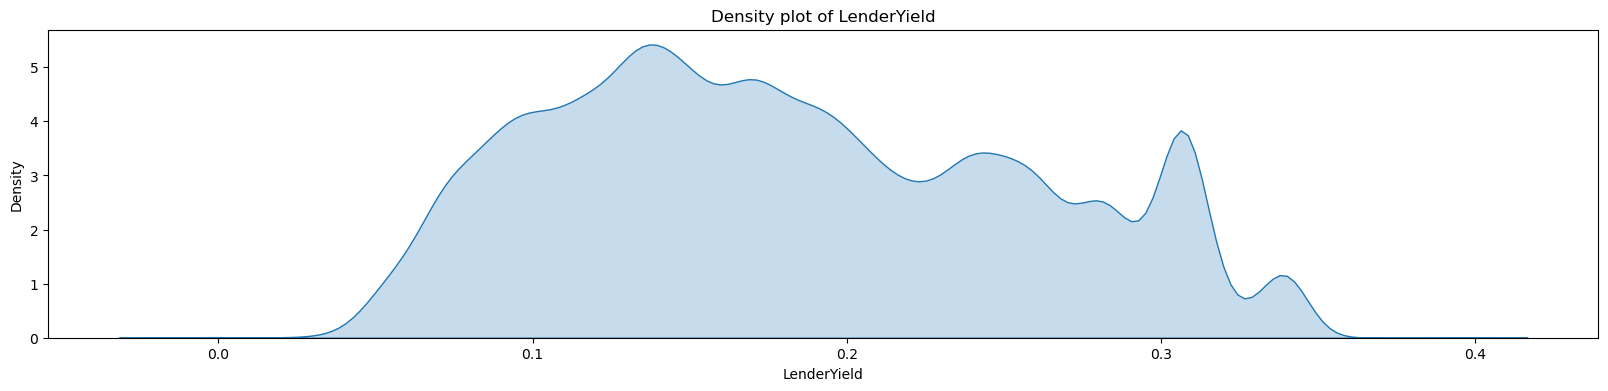

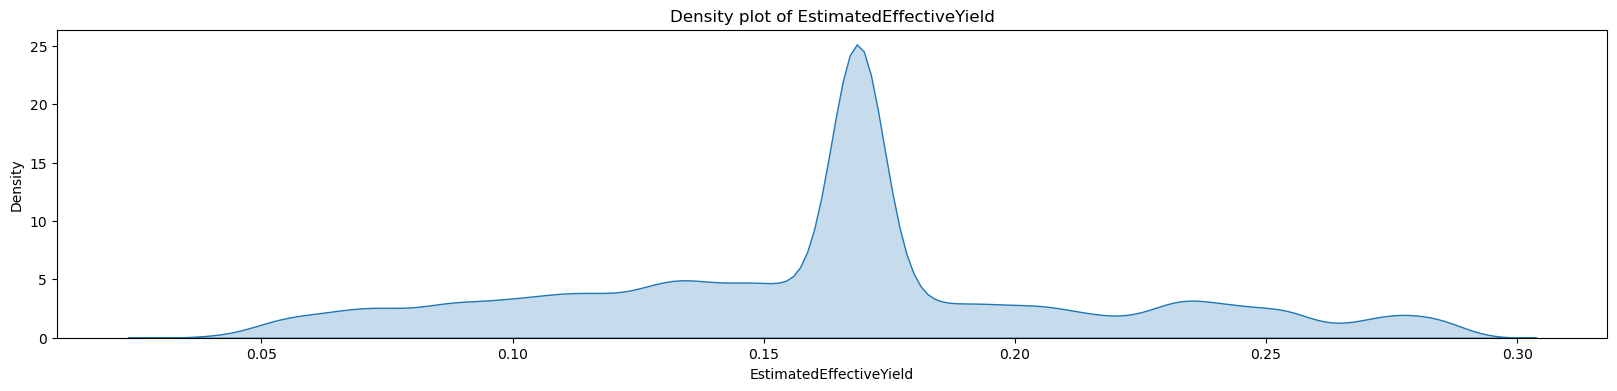

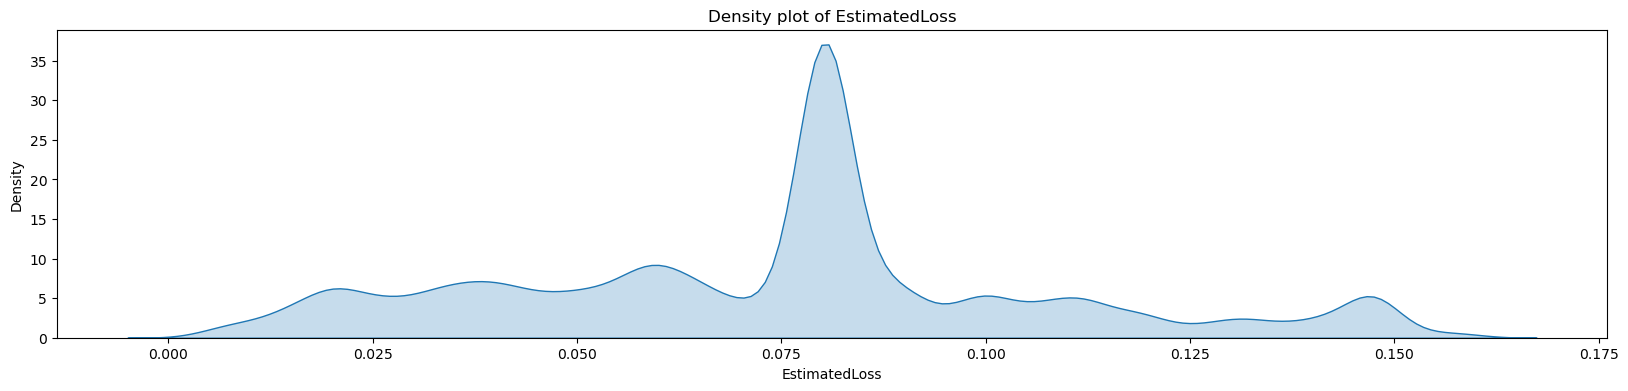

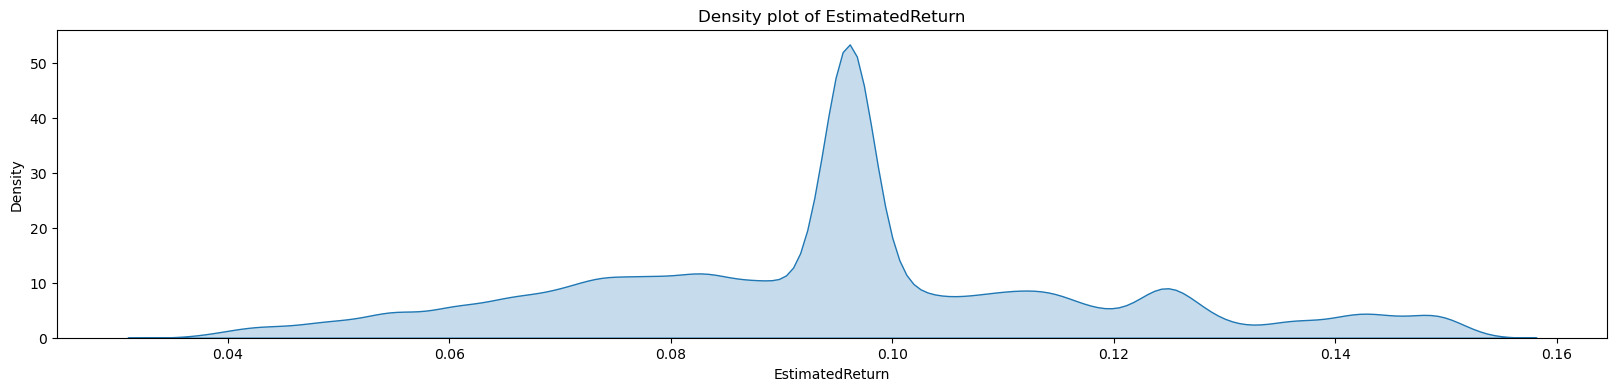

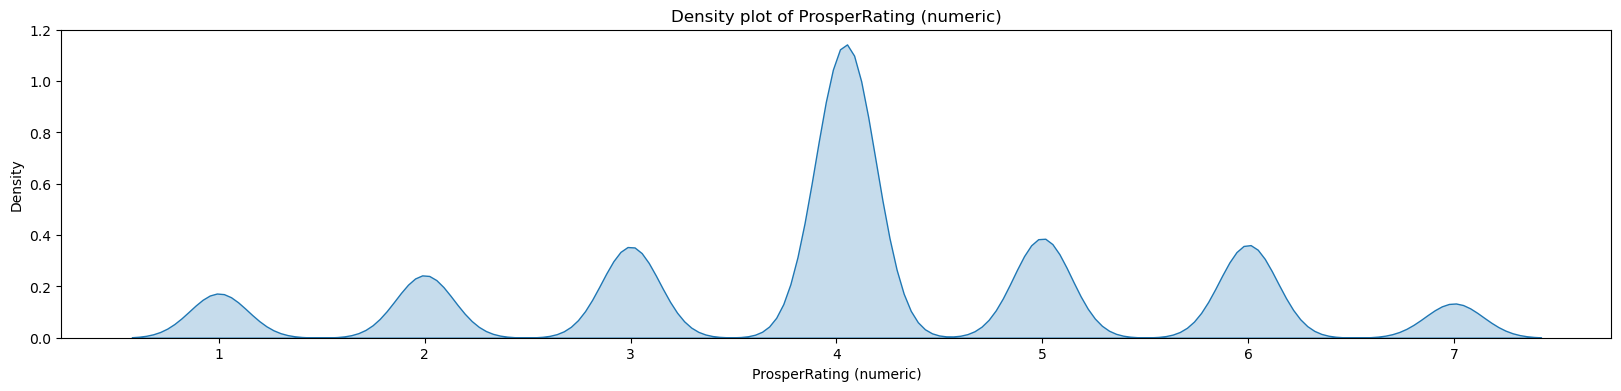

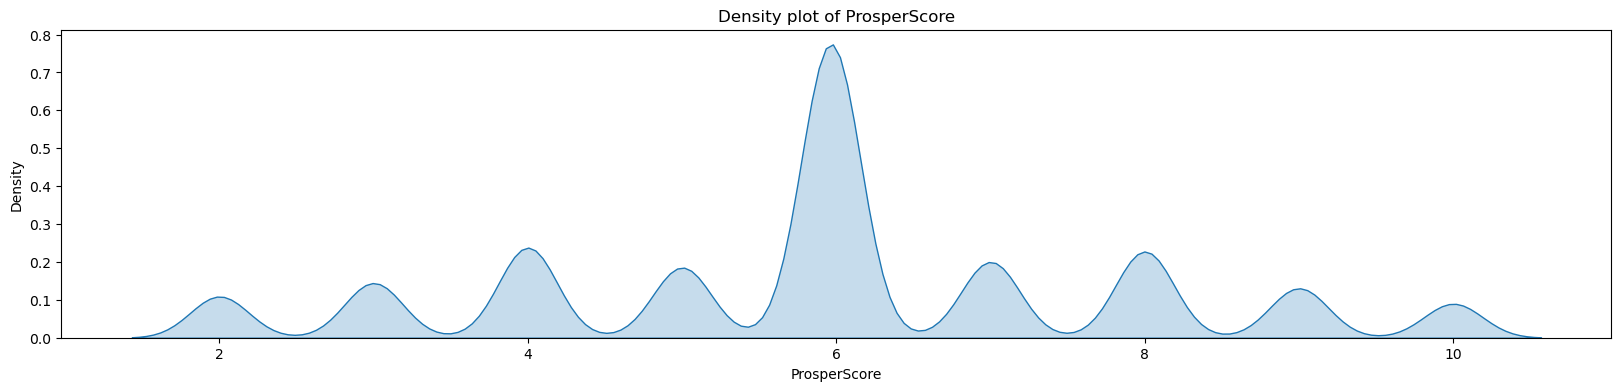

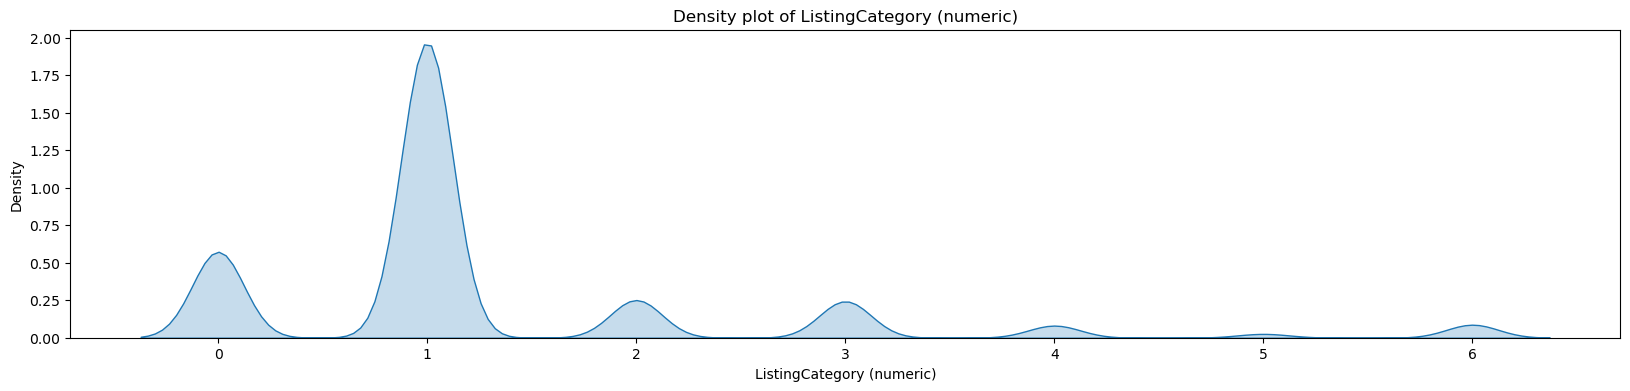

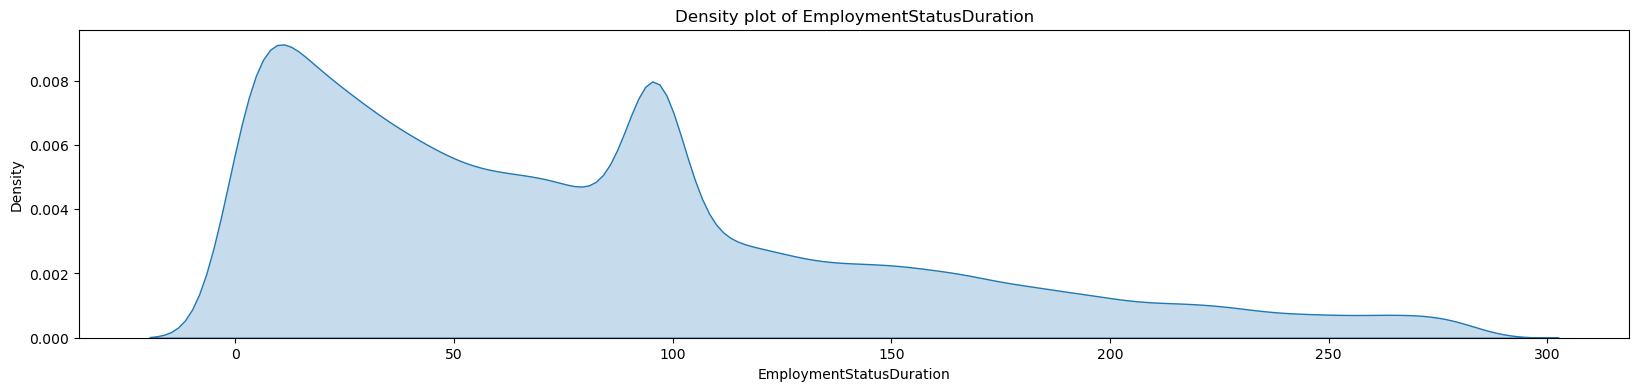

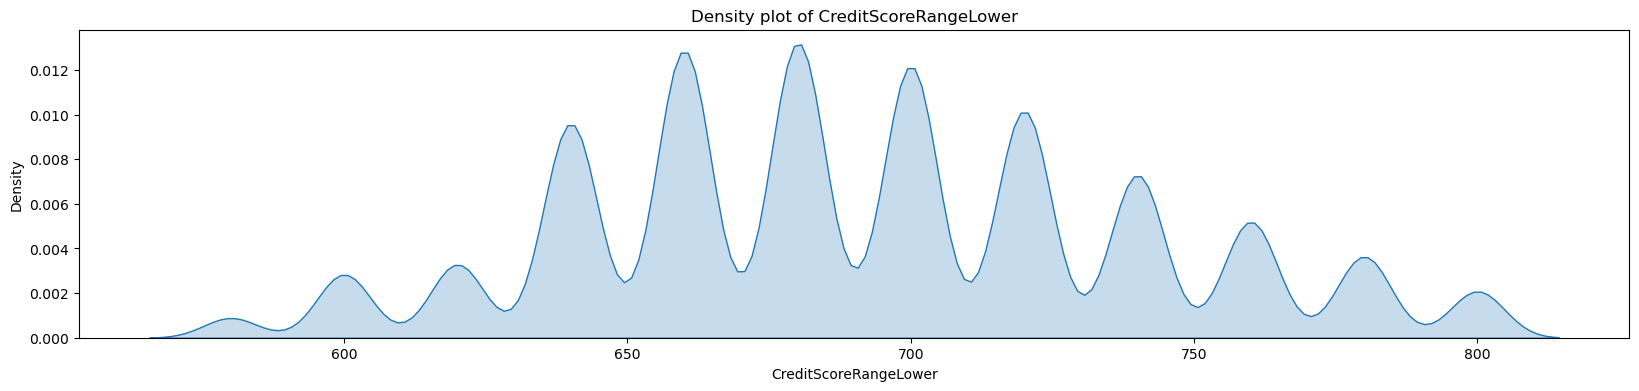

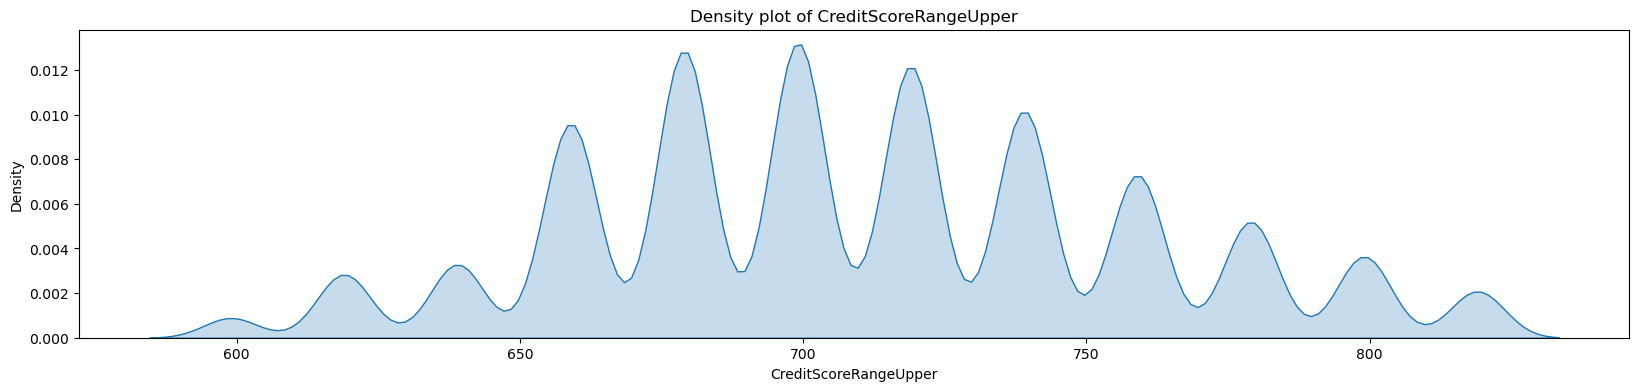

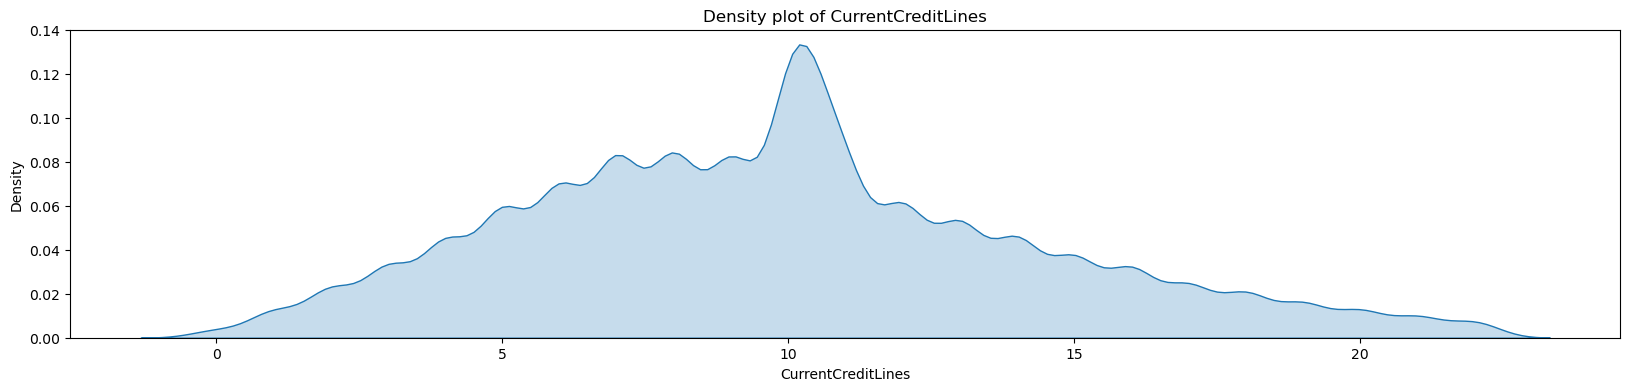

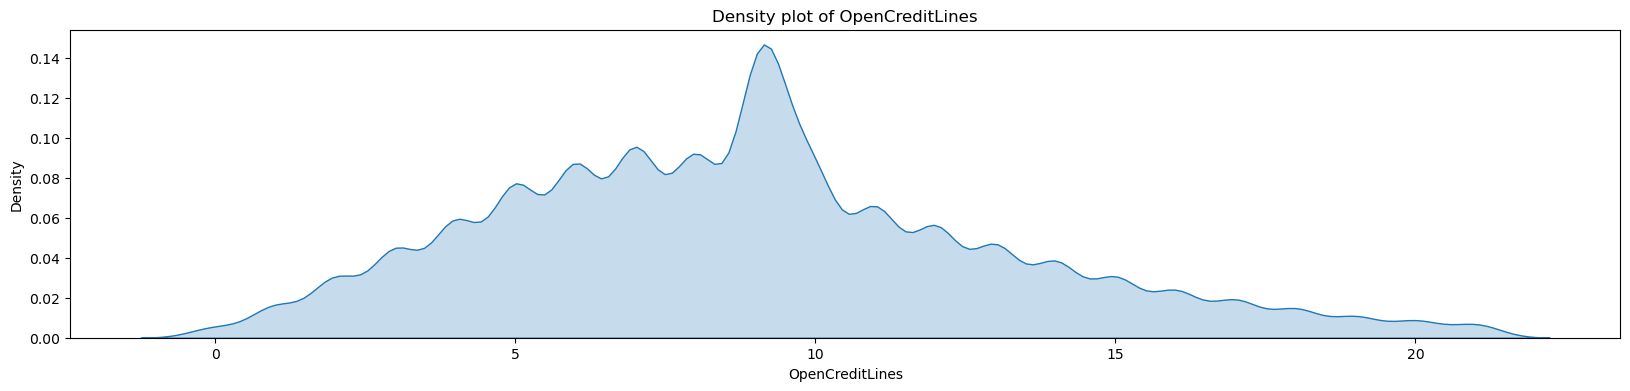

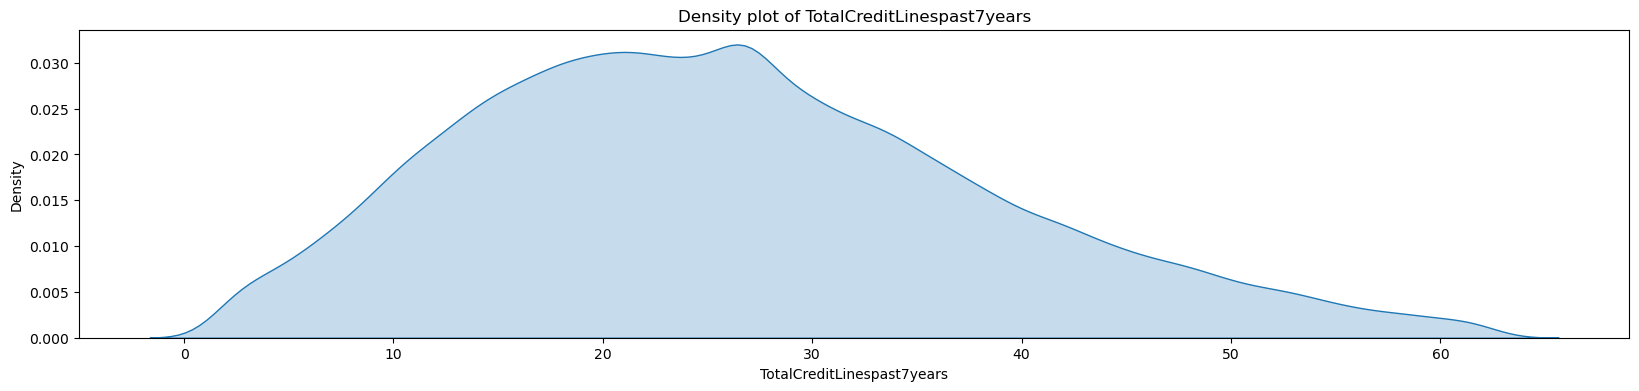

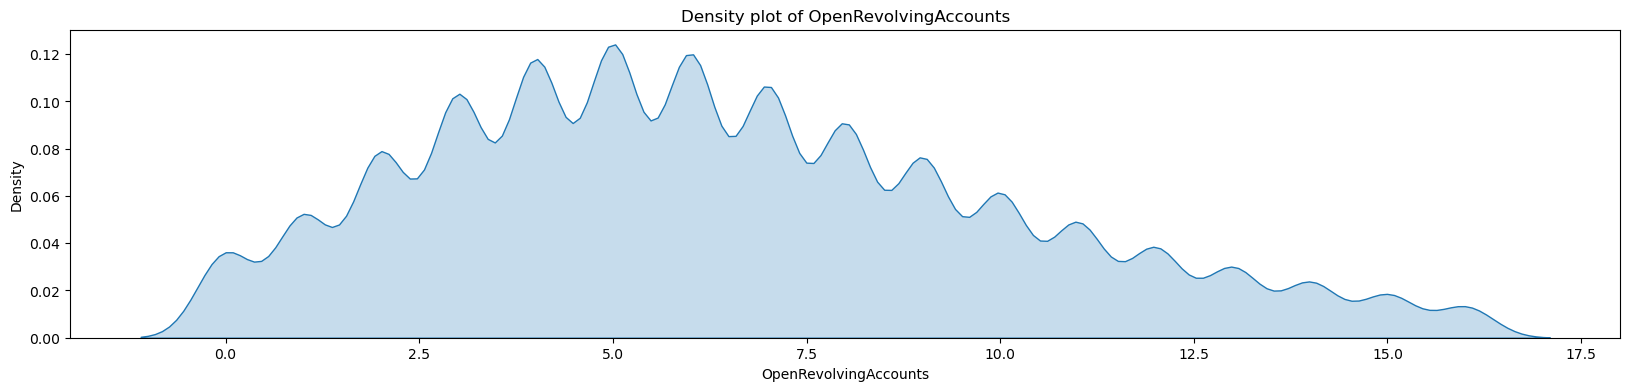

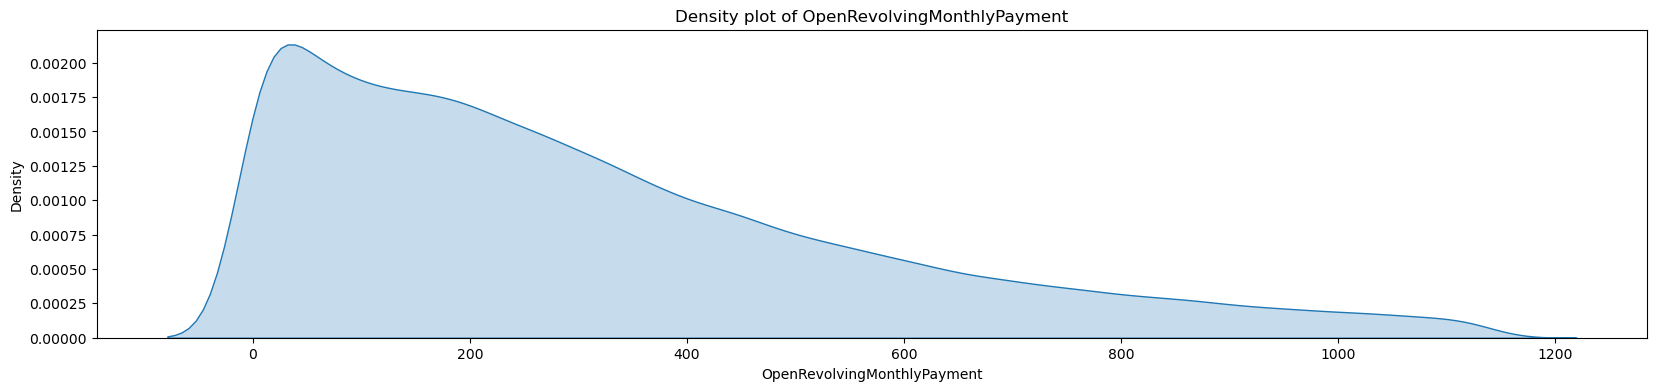

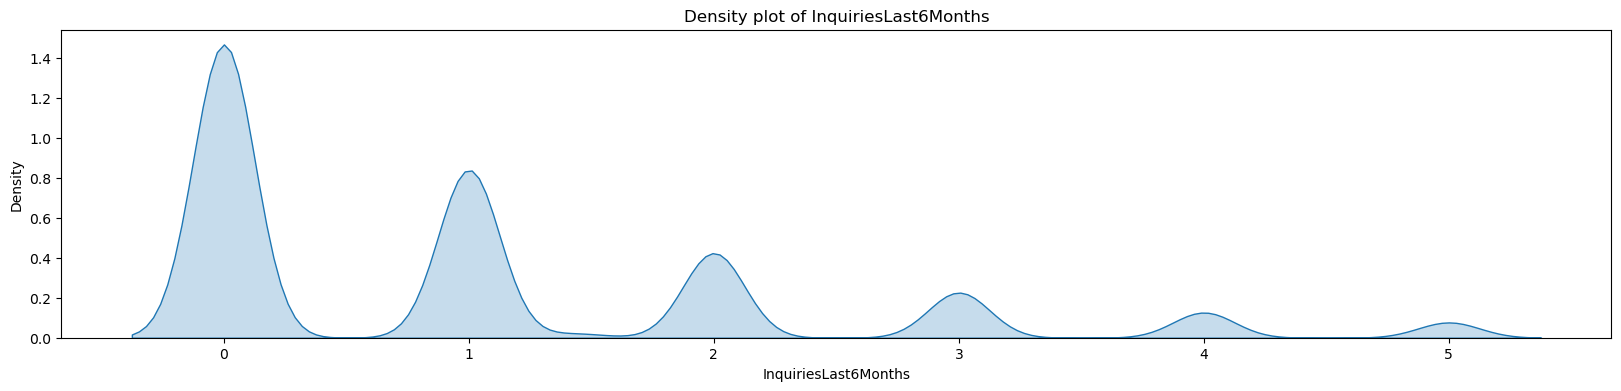

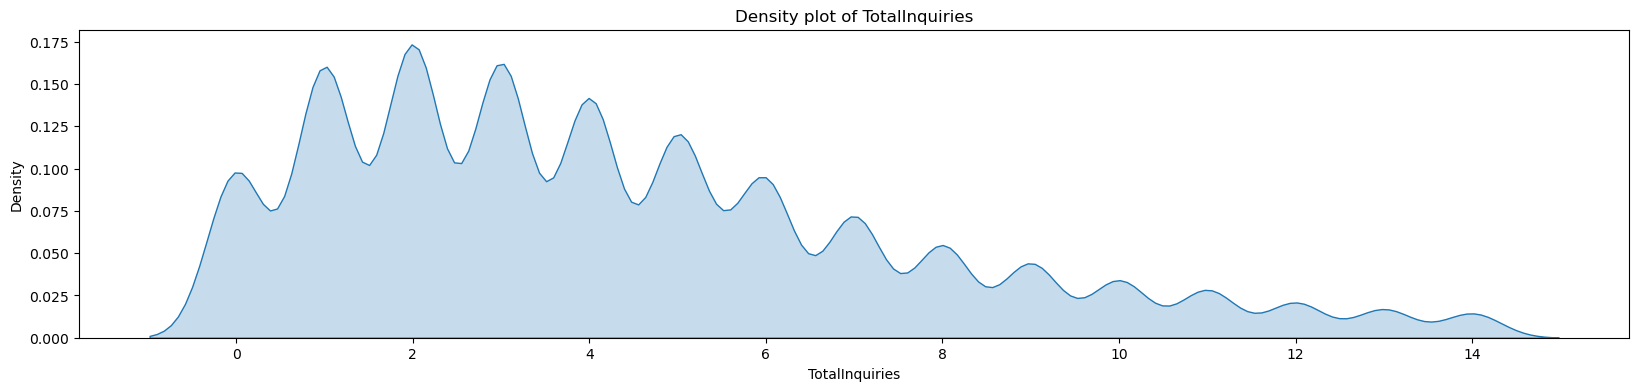

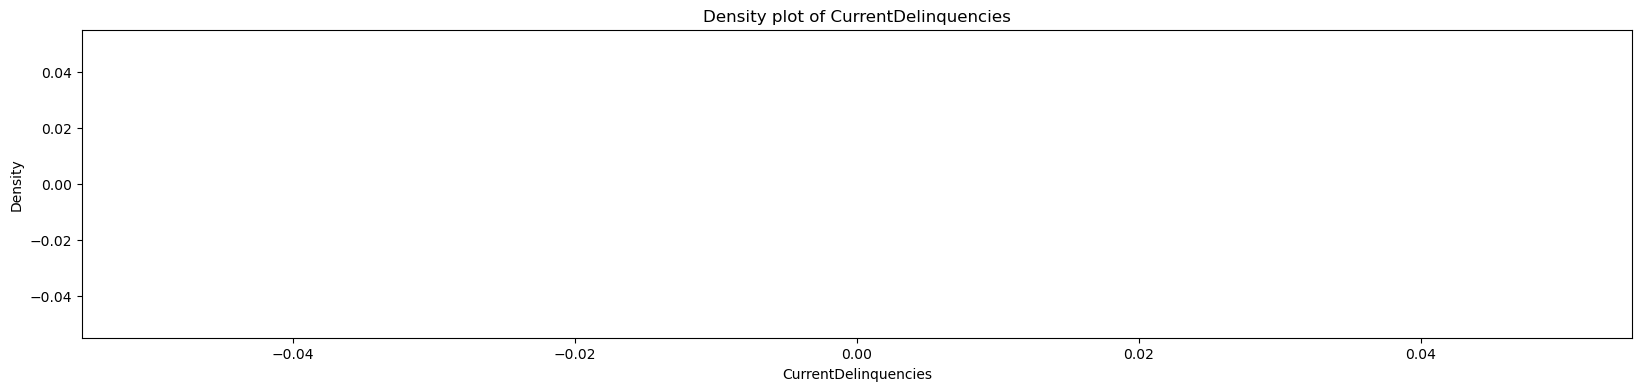

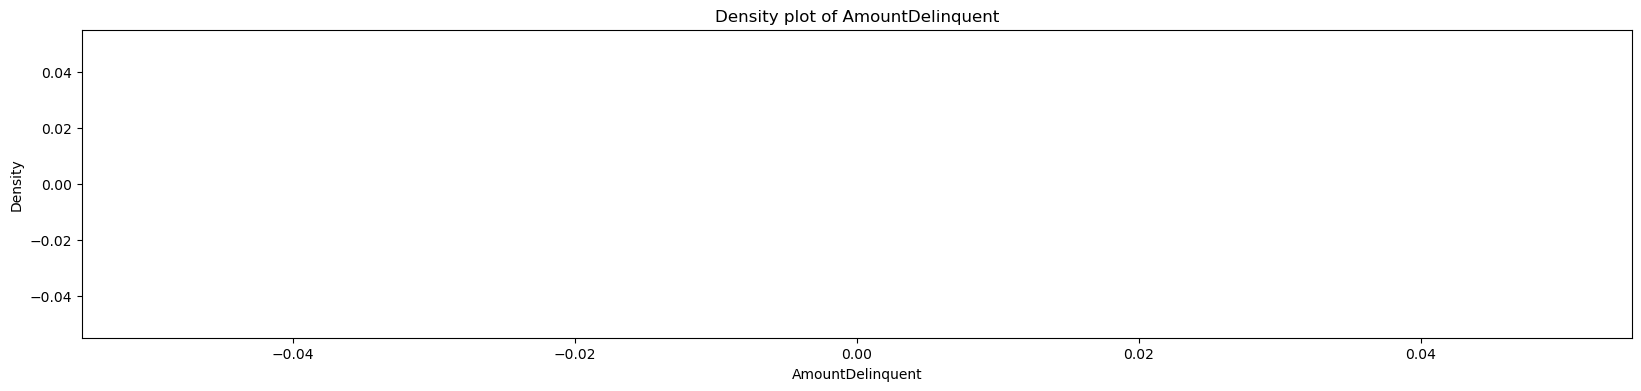

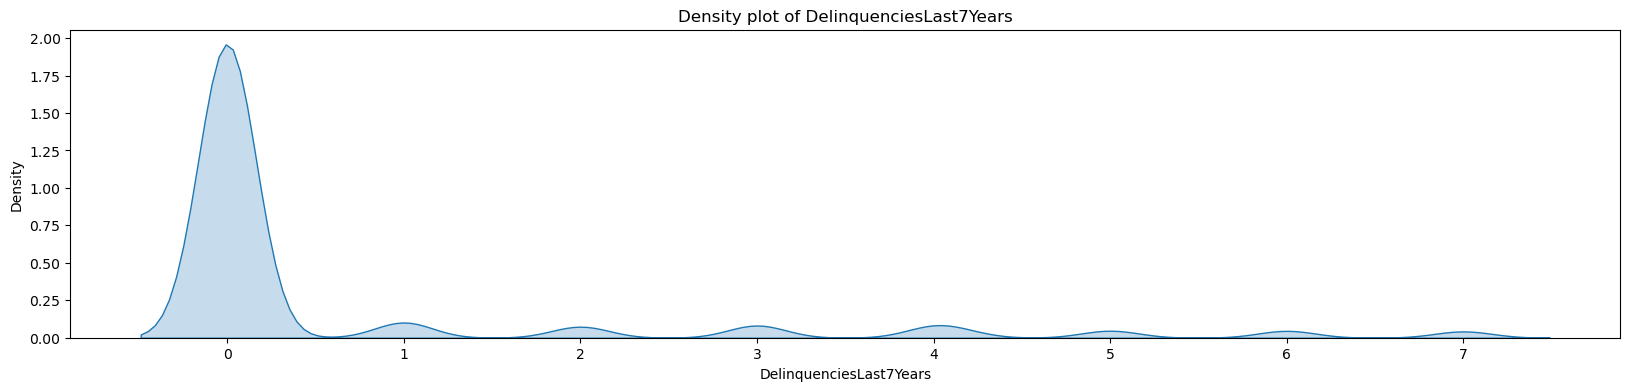

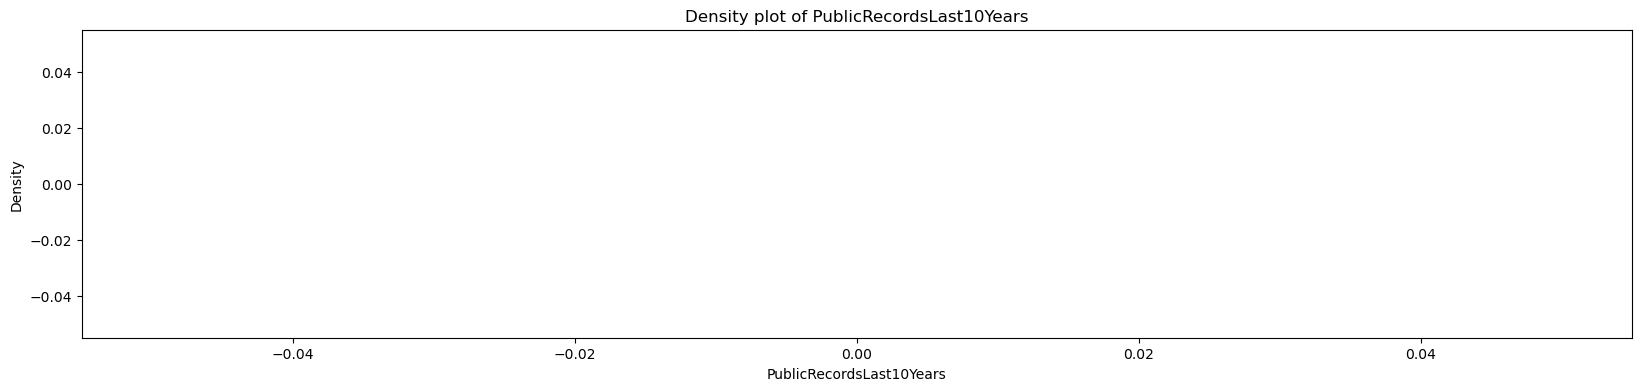

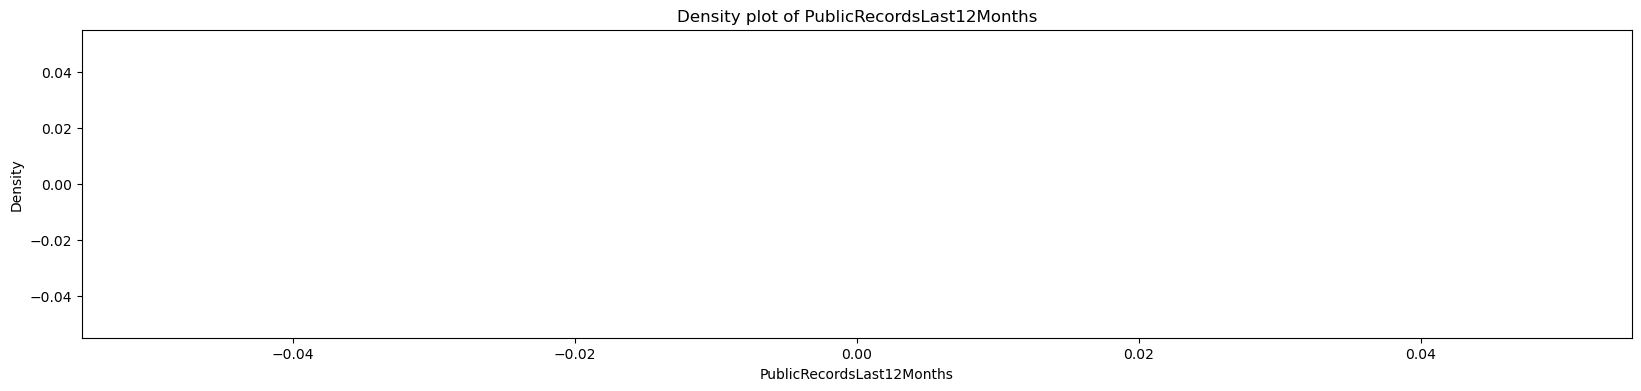

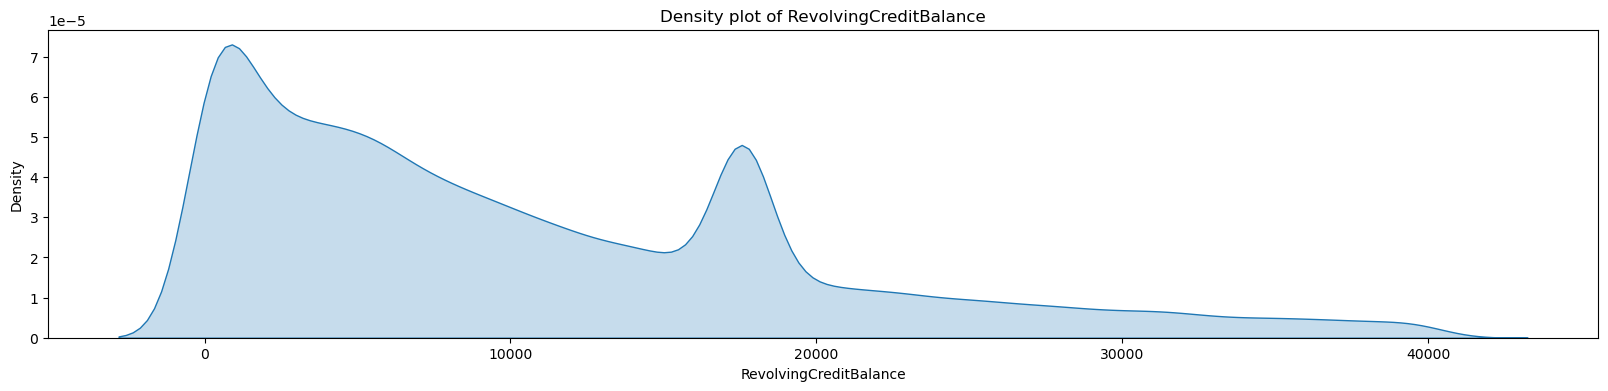

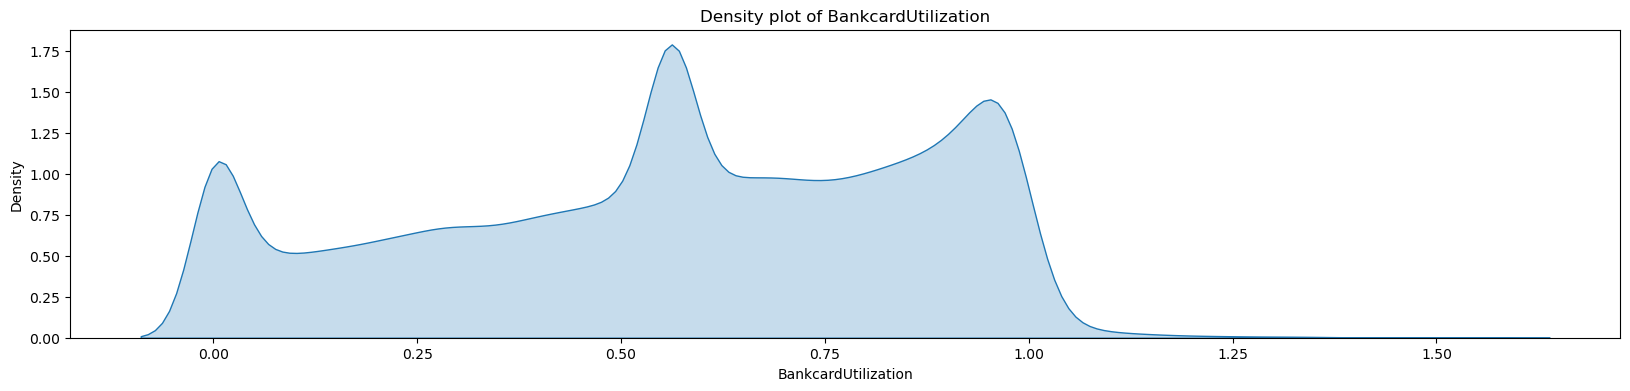

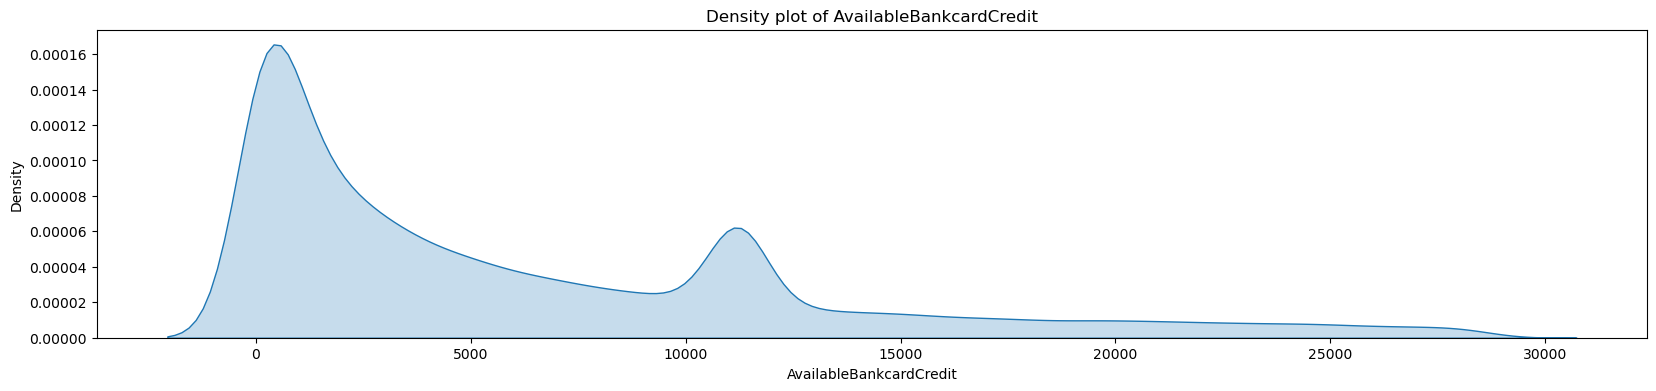

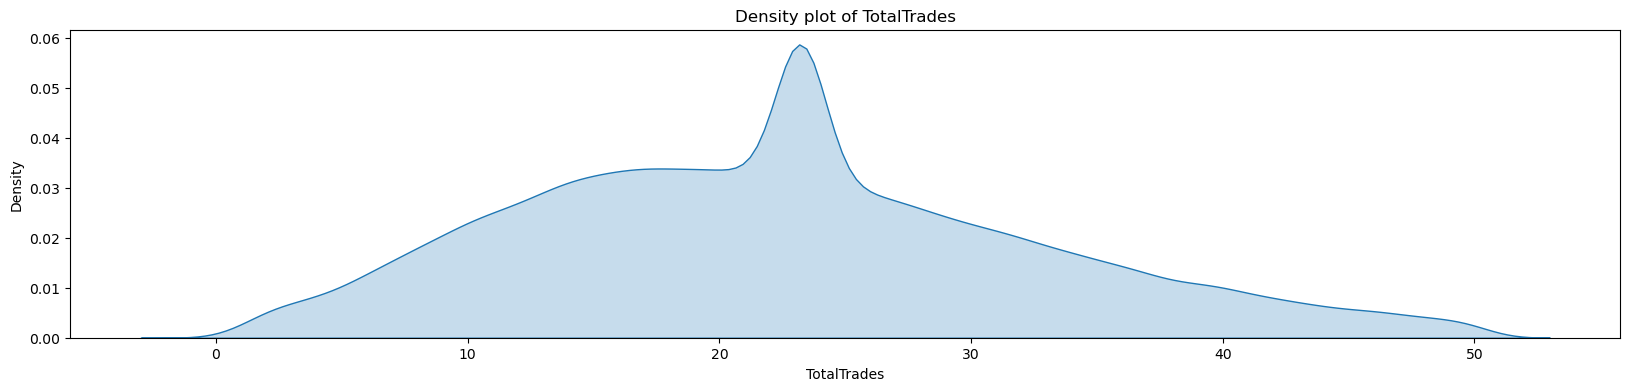

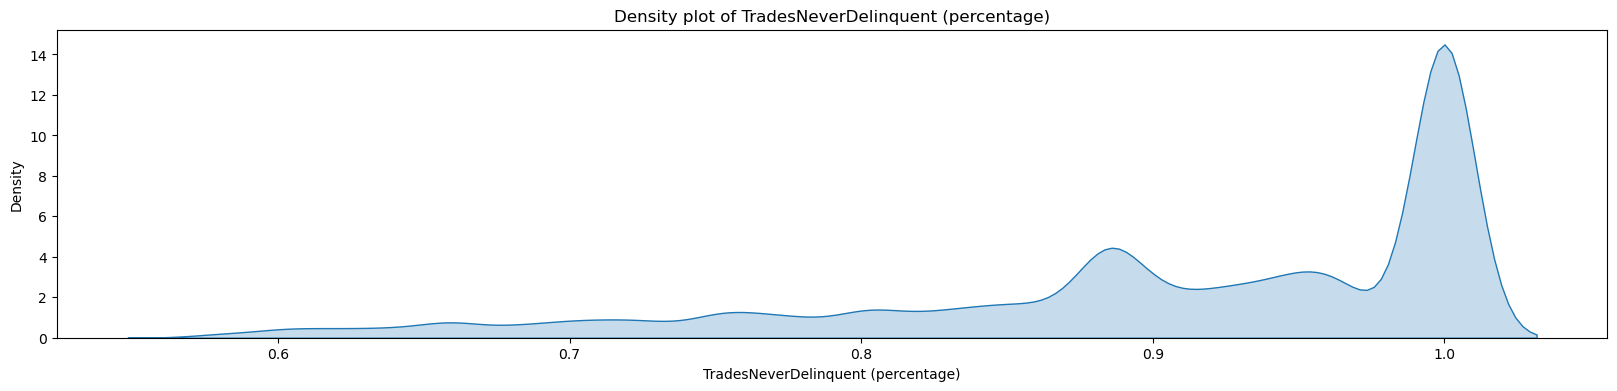

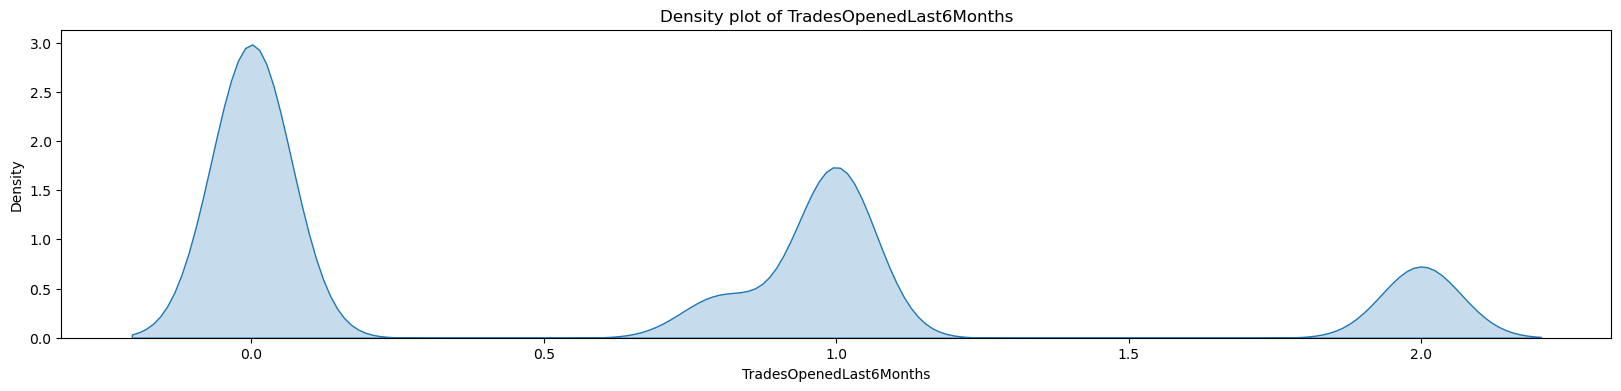

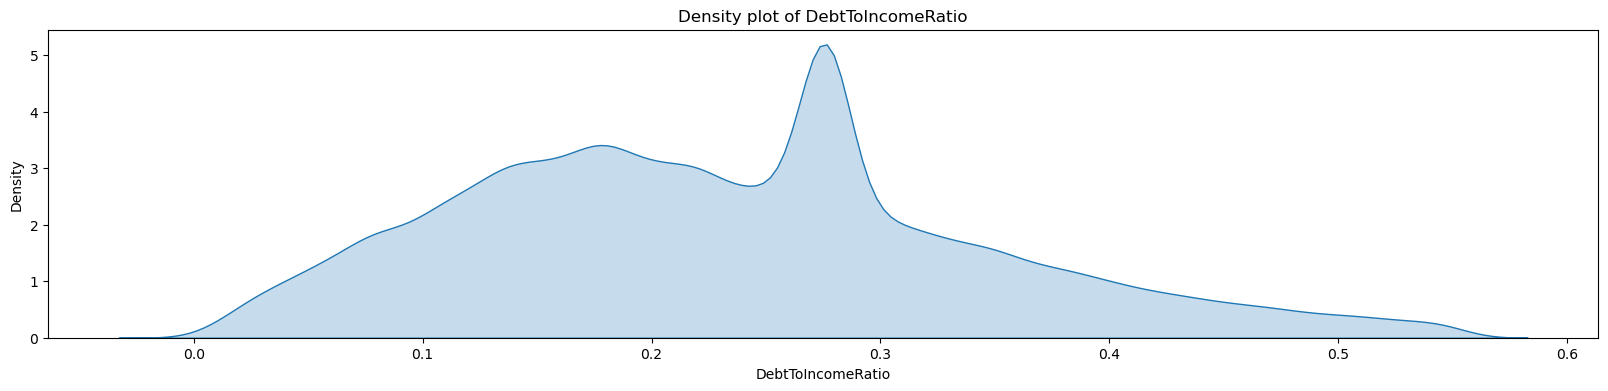

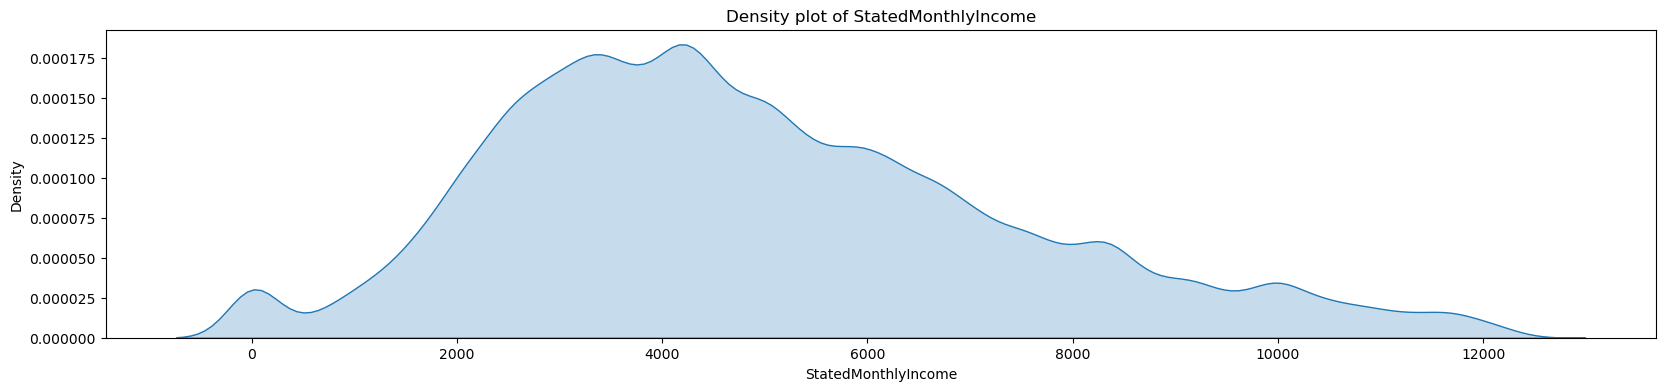

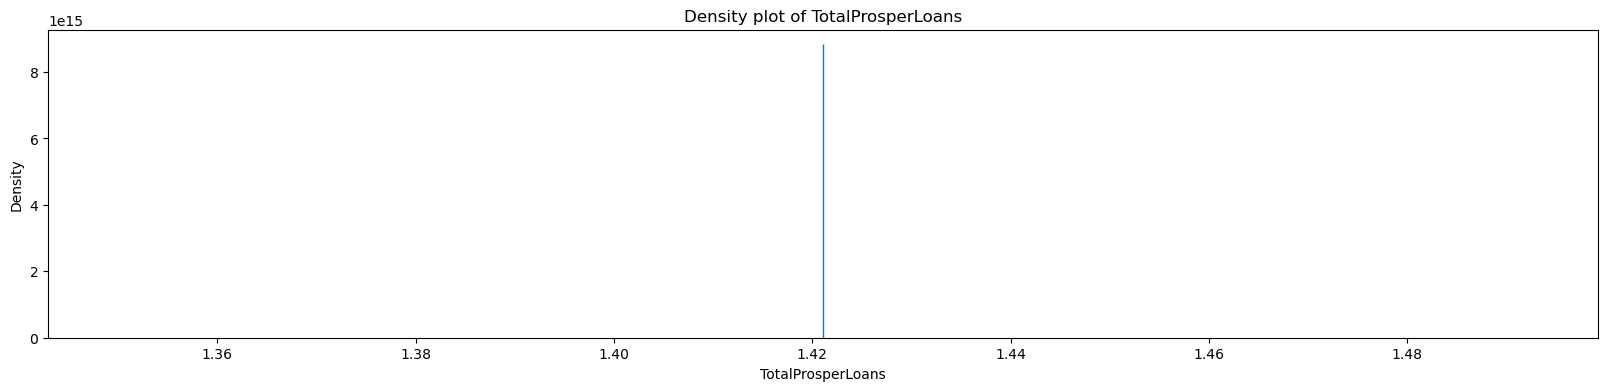

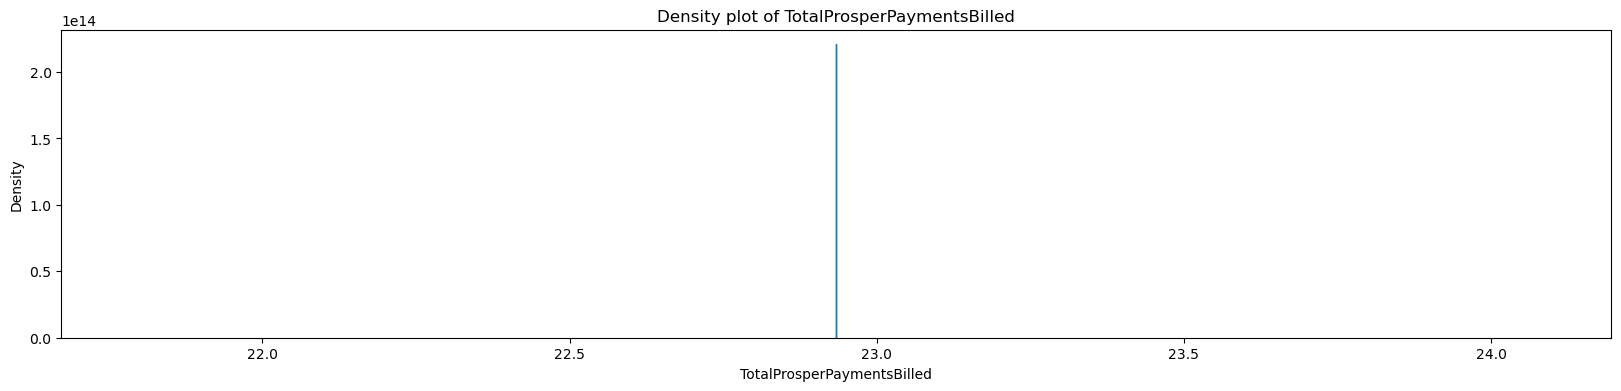

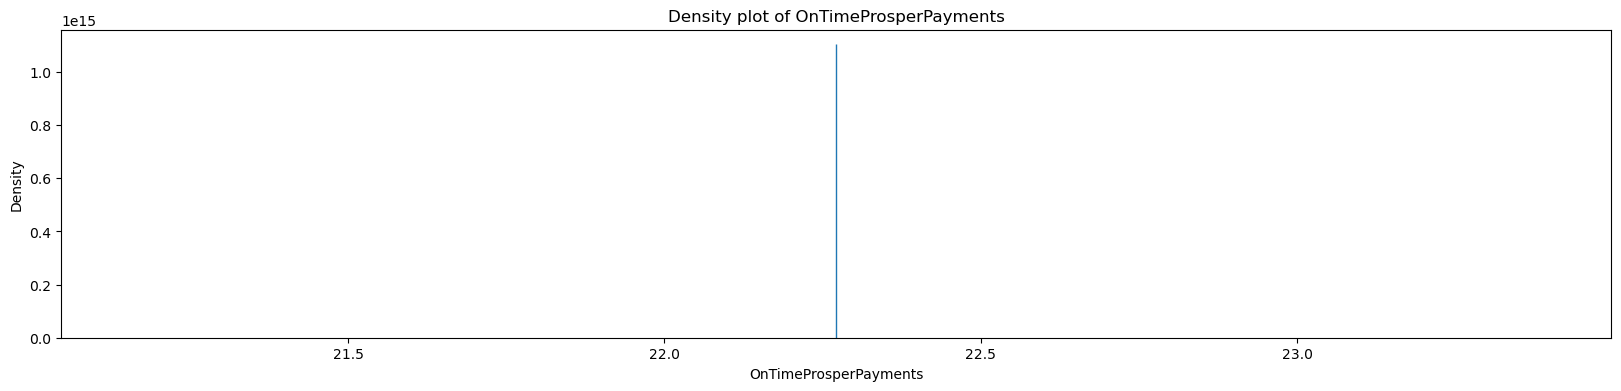

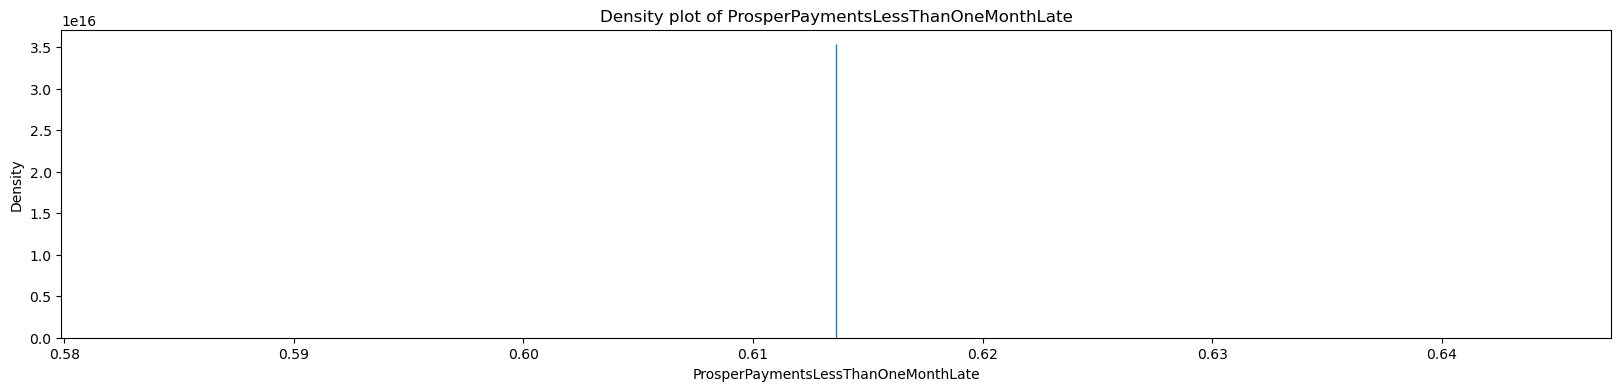

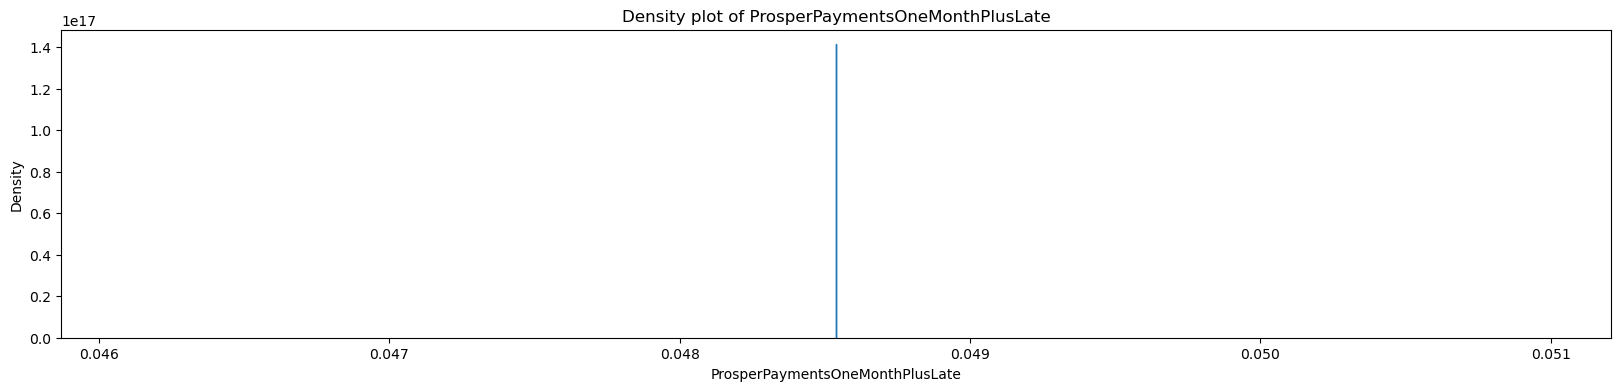

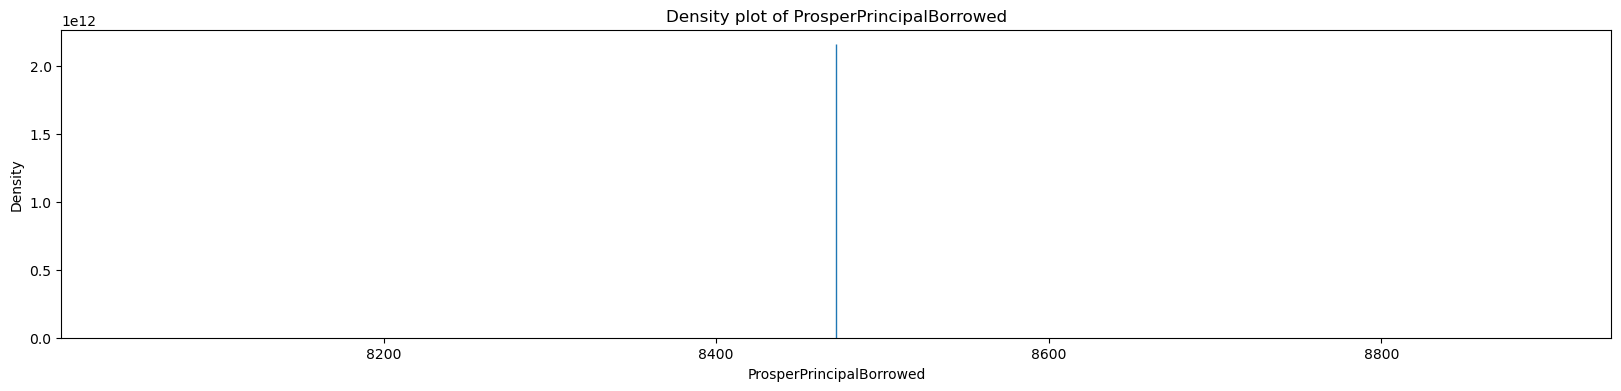

LinAlgError: singular matrix

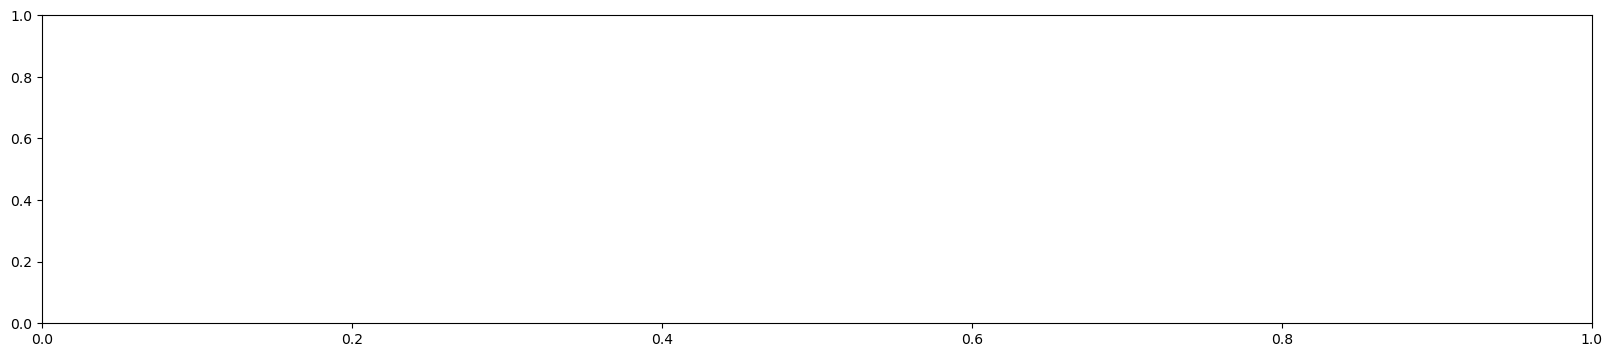

In [30]:
# Plotting denisty plots for better visualization after box plots
for col in num_cols.columns:
    if num_cols[col].dtype != 'object': # check if the column is numeric
        fig, ax = plt.subplots(figsize = (20, 4))
        sns.kdeplot(num_cols[col], shade=True)
        plt.title('Density plot of {}'.format(col))
        plt.show()

## Categorical Columns Visualization

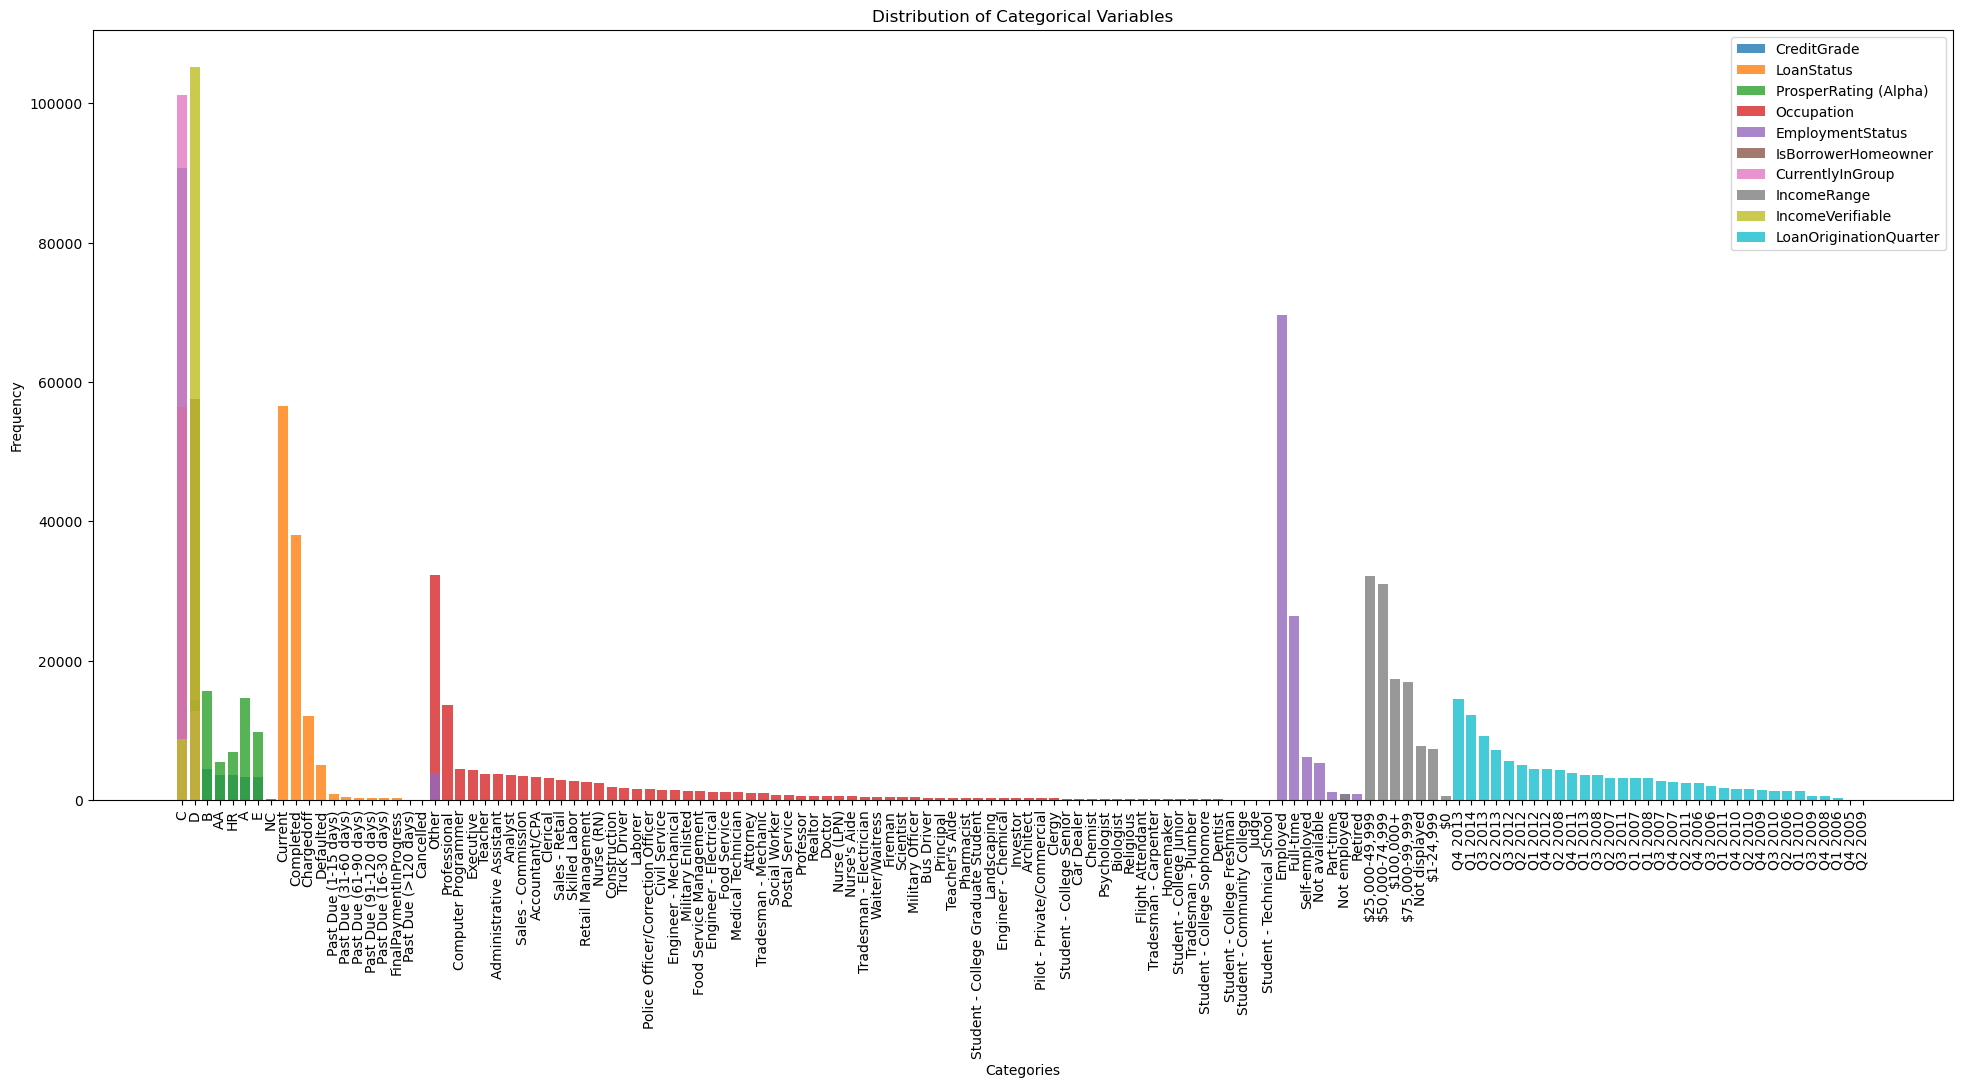

In [31]:
fig, ax = plt.subplots(figsize=(24, 10))

for col in cat_cols.columns:
    # Calculate the frequency of each category in the column
    counts = df[col].value_counts()
    # Create a stacked bar plot with the data
    plt.bar(counts.index, counts.values, label=col, alpha=0.8)
    # Add a legend to the plot
    plt.legend()

# Set the title and axis labels of the plot
plt.title('Distribution of Categorical Variables')
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
# Show the plot
plt.show()

In [32]:
cat_cols.columns

Index(['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationQuarter'], dtype='object')

In [33]:
num_cols.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'ScorexChange

## Deriving the Target variable through LoanStatus Column

In [34]:
# Removing current staus from LoanStatus column
cat_cols = cat_cols[cat_cols['LoanStatus']!= 'Current']
cat_cols.head(10)

CreditGrade            LoanStatus ProsperRating (Alpha)          Occupation EmploymentStatus  IsBorrowerHomeowner  CurrentlyInGroup     IncomeRange  IncomeVerifiable LoanOriginationQuarter
0            C             Completed                     C               Other    Self-employed                 True              True  $25,000-49,999              True                Q3 2007
2           HR             Completed                     C               Other    Not available                False              True   Not displayed              True                Q1 2007
11           C             Completed                     C     Waiter/Waitress        Full-time                False             False       $1-24,999              True                Q4 2007
12           C  Past Due (1-15 days)                     B      Sales - Retail         Employed                False             False  $25,000-49,999              True                Q1 2014
15           C             Defaulted                    HR               Other            Other                 True             False  $50,000-74,999              True                Q2 2012
17          AA            Chargedoff                     C        Professional    Not available                 True              True   Not displayed              True                Q3 2006
21           D             Completed                     C        Professional        Full-time                False              True  $25,000-49,999              True                Q4 2007
23           C             Defaulted                     D       Skilled Labor         Employed                False             False  $25,000-49,999              True                Q2 2013
26           C             Completed                     E  Sales - Commission         Employed                False             False  $25,000-49,999              True                Q1 2013
27           C             Completed                     A           Executive        Full-time                 True             False  $75,000-99,999              True                Q2 2010

In [35]:
cat_cols.columns

Index(['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationQuarter'], dtype='object')

In [36]:
cat_cols['LoanStatus'].unique()

array(['Completed', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff',
       'Past Due (16-30 days)', 'Cancelled', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [37]:
print (df['LoanCurrentDaysDelinquent'].unique())
num_cols['LoanCurrentDaysDelinquent'].unique()

[   0    3  140 ...  916 2349 1081]


array([ 0., nan])

In [38]:
df['DefaultStatusCatCol'] = ['Defaulted' if x >= 180 else 'Not-Defauled' for x in df['LoanCurrentDaysDelinquent']]

In [39]:
df['DefaultStatusNumCol'] = ['1' if x >= 180 else '0' for x in df['LoanCurrentDaysDelinquent']]

In [40]:
num_cols['DefaultStatusNumCol'] = df['DefaultStatusNumCol']

In [41]:
cat_cols['DefaultStatusCatCol'] = df['DefaultStatusCatCol']

In [42]:
# For verifying I am printing the 50 rows
print(cat_cols[['DefaultStatusCatCol', 'LoanStatus']].head(50))

    DefaultStatusCatCol             LoanStatus
0          Not-Defauled              Completed
2          Not-Defauled              Completed
11         Not-Defauled              Completed
12         Not-Defauled   Past Due (1-15 days)
15         Not-Defauled              Defaulted
17            Defaulted             Chargedoff
21         Not-Defauled              Completed
23            Defaulted              Defaulted
26         Not-Defauled              Completed
27         Not-Defauled              Completed
30         Not-Defauled              Completed
33         Not-Defauled              Completed
39         Not-Defauled              Completed
42            Defaulted             Chargedoff
46         Not-Defauled              Completed
57            Defaulted             Chargedoff
59         Not-Defauled              Completed
62            Defaulted             Chargedoff
63         Not-Defauled              Completed
66         Not-Defauled              Completed
67         No

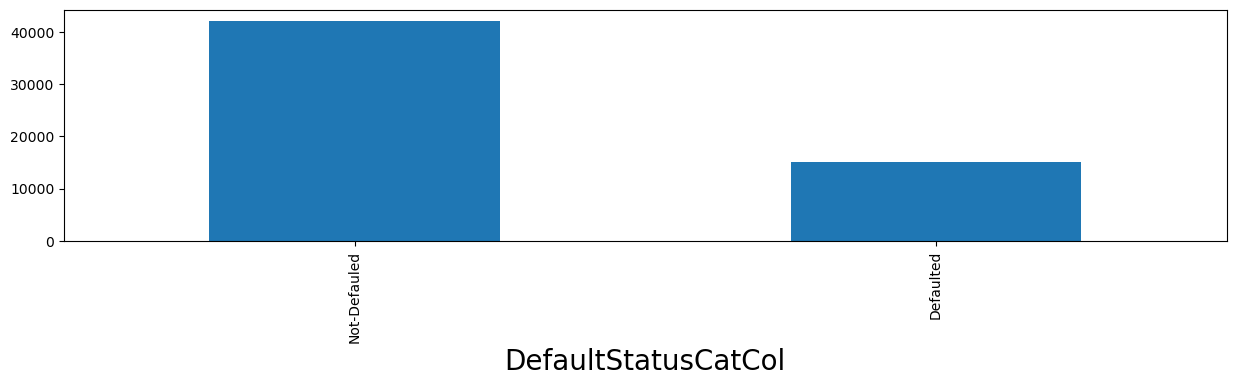

In [43]:
# Creating Bar Plot for DefaultStatus / Taret Variable column
plt.figure(figsize=(15,3))
cat_cols['DefaultStatusCatCol'].value_counts().plot.bar()
plt.xlabel('DefaultStatusCatCol', fontsize=20)
None

### Generating new column from CrediGrade Column

In [44]:
mapping = {
    'AA': 'The highest credit grade',
    'A': 'A strong credit grade',
    'B': 'A medium credit grade',
    'C': 'A lower credit grade',
    'D': 'A very low credit grade',
    'E': 'A grade indicating default',
    'HR': 'High risk',
    'NC': 'No credit history'
}

# Create a new column 'description' based on the mapping
cat_cols['CreditGrade_description'] = cat_cols['CreditGrade'].map(mapping)

# Print the resulting DataFrame
cat_cols

CreditGrade              LoanStatus ProsperRating (Alpha)       Occupation EmploymentStatus  IsBorrowerHomeowner  CurrentlyInGroup     IncomeRange  IncomeVerifiable LoanOriginationQuarter DefaultStatusCatCol   CreditGrade_description
0                C               Completed                     C            Other    Self-employed                 True              True  $25,000-49,999              True                Q3 2007        Not-Defauled      A lower credit grade
2               HR               Completed                     C            Other    Not available                False              True   Not displayed              True                Q1 2007        Not-Defauled                 High risk
11               C               Completed                     C  Waiter/Waitress        Full-time                False             False       $1-24,999              True                Q4 2007        Not-Defauled      A lower credit grade
12               C    Past Due (1-15 days)                     B   Sales - Retail         Employed                False             False  $25,000-49,999              True                Q1 2014        Not-Defauled      A lower credit grade
15               C               Defaulted                    HR            Other            Other                 True             False  $50,000-74,999              True                Q2 2012        Not-Defauled      A lower credit grade
...            ...                     ...                   ...              ...              ...                  ...               ...             ...               ...                    ...                 ...                       ...
113927          AA               Completed                     C        Executive        Full-time                 True              True       $100,000+              True                Q2 2008        Not-Defauled  The highest credit grade
113928           C               Completed                     C            Other        Full-time                False             False  $25,000-49,999              True                Q2 2011        Not-Defauled      A lower credit grade
113929           C               Completed                     E   Accountant/CPA         Employed                False             False  $50,000-74,999              True                Q3 2013        Not-Defauled      A lower credit grade
113933           C  FinalPaymentInProgress                     A     Professional         Employed                 True             False  $75,000-99,999              True                Q4 2011        Not-Defauled      A lower credit grade
113935           C               Completed                     C     Food Service        Full-time                 True             False  $25,000-49,999              True                Q4 2011        Not-Defauled      A lower credit grade

[57361 rows x 12 columns]

## Univariate Analysis

In [45]:
num_cols

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0       36.0      0.16516        0.1580       0.1380                 0.168661       0.080306         0.096068                 4.072243      5.950067                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   NaN               NaN                      4.0                       0.0                        0.0                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333             1.4211                   22.934345              22.271949                             0.613629                          0.04854               8472.311961                  2930.313906                    -3.223214                        0.0                      16.268464   
1       36.0      0.12016        0.0920       0.0820                 0.079600       0.024900         0.054700                 6.000000      7.000000                        2.0                 44.000000                  680.0                  699.0           14.000000        14.000000                        29.0                   13.0                        389.0                   3.0             5.0                   0.0               0.0                      0.0                       NaN                        0.0             3989.000000             0.210000             10266.000000    29.000000                            1.000000                 2.000000               0.18          6125.000000             1.4211                   22.934345              22.271949                             0.613629                          0.04854               8472.311961                  2930.313906                    -3.223214                        0.0                      16.268464   
2       36.0      0.28269        0.2750       0.2400                 0.168661       0.080306         0.096068                 4.072243      5.950067                        0.0                 96.071582                    NaN                    NaN           10.317192         9.260164                         3.0                    0.0                          0.0                   0.0             1.0                   NaN               NaN                      0.0                       0.0                        NaN            17598.706751             0.561309             11210.225447    23.230034                            0.885897                 0.802327               0.06          2083.333333             1.4211                   22.934345              22.271949                             0.613629                          0.04854               8472.311961                  2930.313906                    -3.223214                        0.0                      16.268464   
3       36.0      0.12528        0.0974       0.

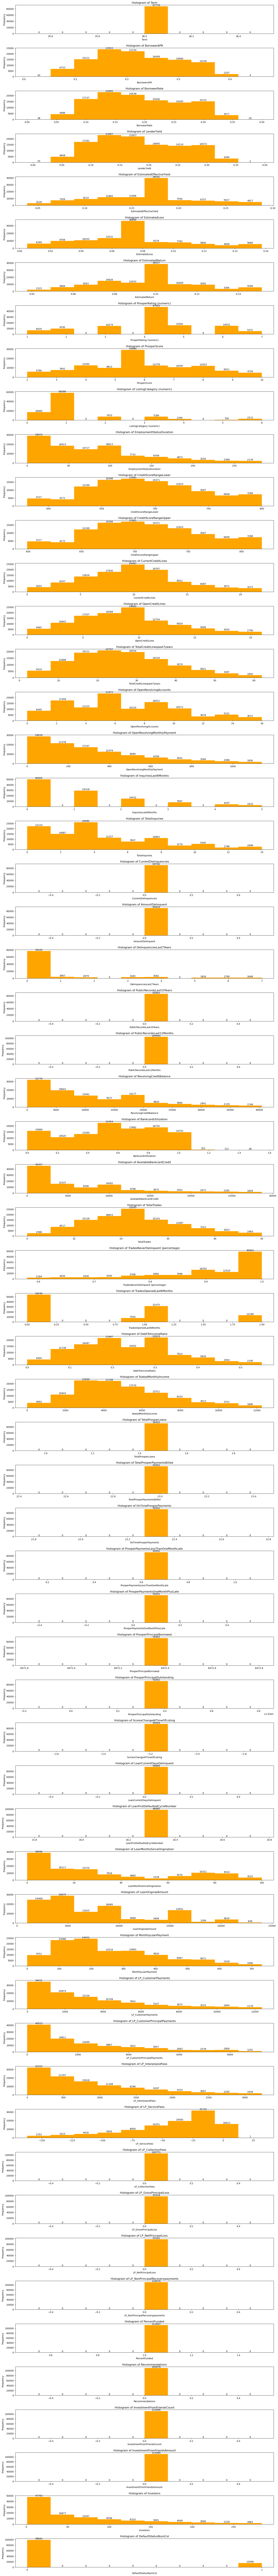

In [46]:
# Set the number of rows and columns for the plot grid
num_rows = 60
numeric_cols = 1

# Create the plot grid
fig, axs = plt.subplots(num_rows, numeric_cols, figsize=(20, 200))

# Flatten the axis array so we can loop through it
axs = axs.flatten()

# Loop through the numerical columns and plot a histogram for each one
for i, col in enumerate(num_cols):
    n, bins, patches = axs[i].hist(num_cols[col], color='orange')
    bin_counts = [int(count) for count in n]
    for j in range(len(patches)):
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 5
        axs[i].text(x, y, bin_counts[j], ha='center', va='bottom')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Histogram of {col}")

# Hide any unused plot grids
for i in range(len(num_cols), num_rows*numeric_cols):
    axs[i].axis('off')

# Adjust the plot spacing
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

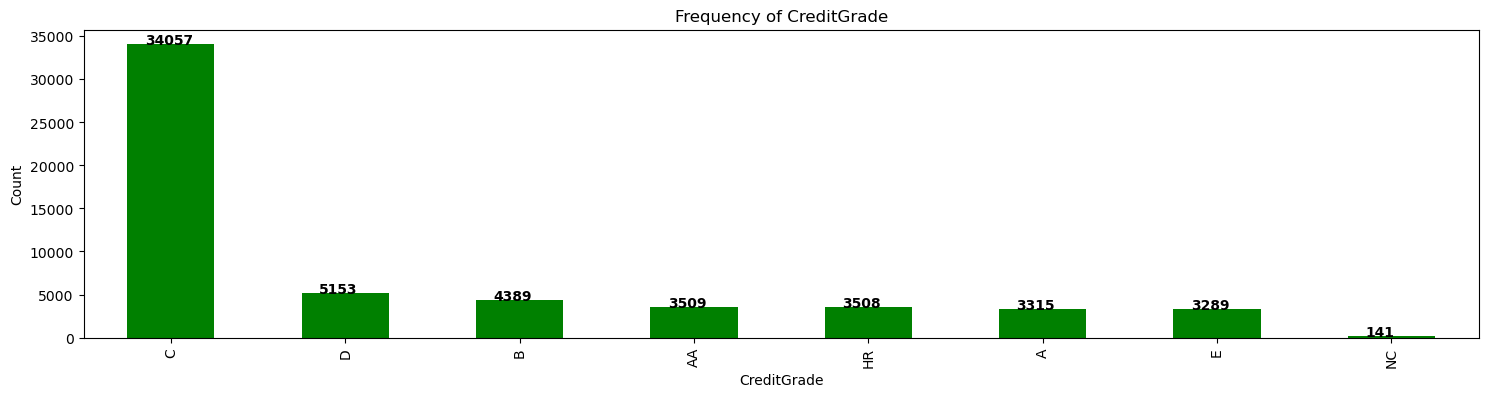

In [47]:
# Plotting the bar Graph for CreditGrade column
fig = plt.figure(figsize = (18,4))
count = cat_cols['CreditGrade'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("CreditGrade")
plt.ylabel('Count')
plt.title('Frequency of CreditGrade')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

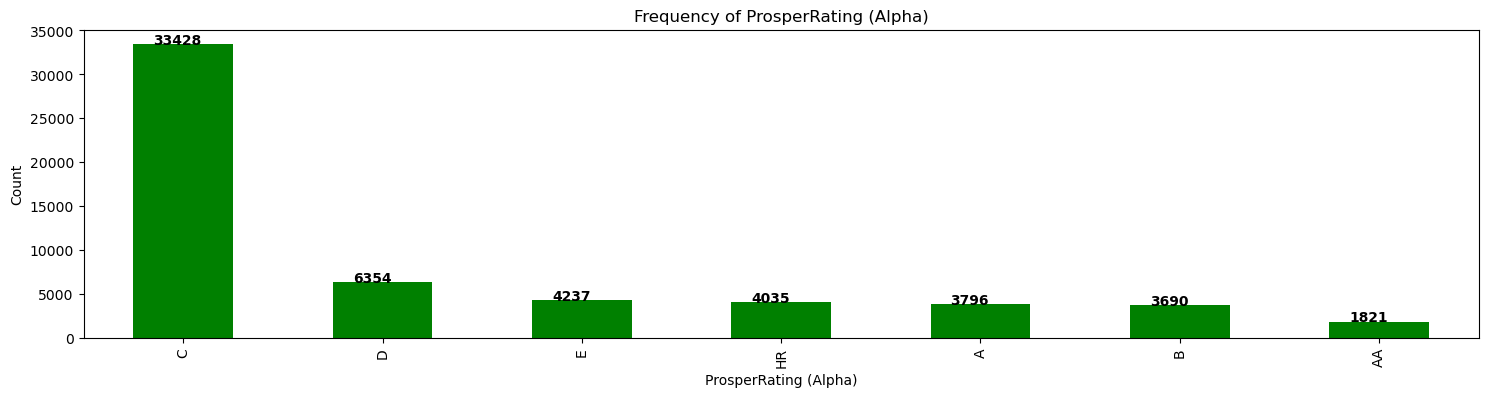

In [48]:
# Plotting the bar Graph for ProsperRating (Alpha) column
fig = plt.figure(figsize = (18,4))
count = cat_cols['ProsperRating (Alpha)'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("ProsperRating (Alpha)")
plt.ylabel('Count')
plt.title('Frequency of ProsperRating (Alpha)')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

In [49]:
# Plotting the bar Graph for Occupation column
fig = plt.figure(figsize = (24,4))
count = cat_cols['Occupation'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("Occupation")
plt.ylabel('Count')
plt.title('Frequency of Occupation')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

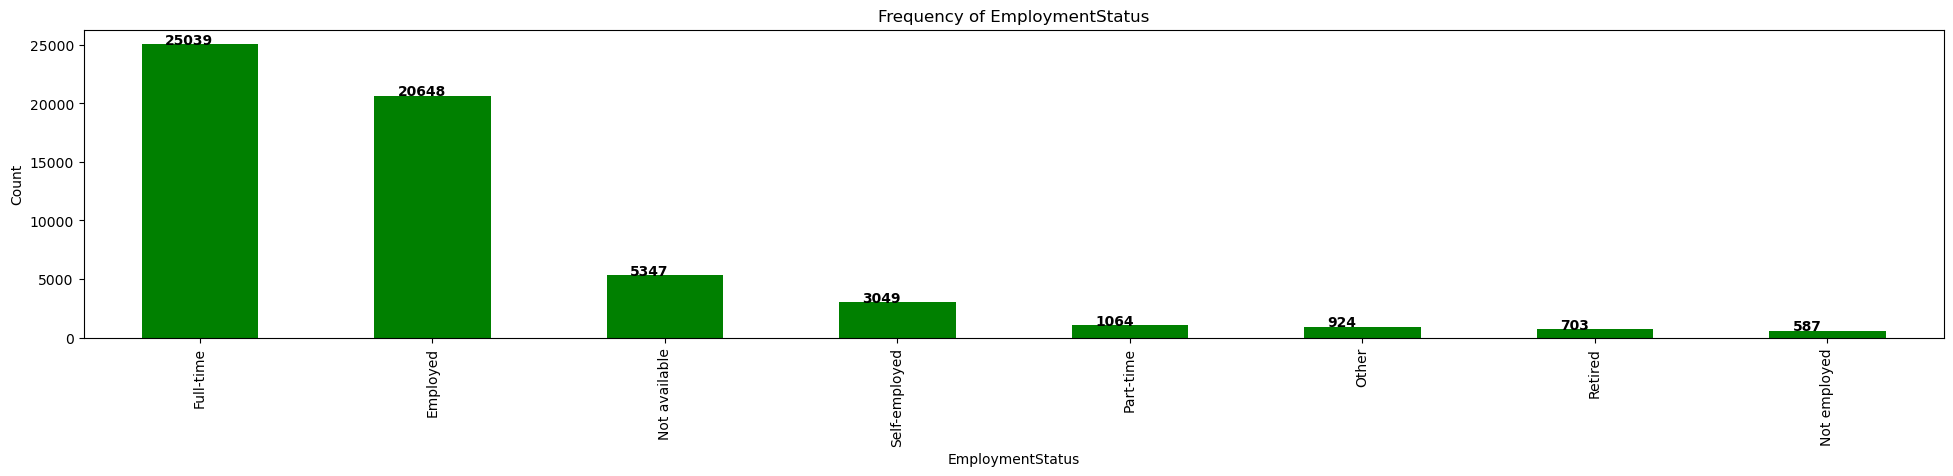

In [50]:
# Plotting the bar Graph for EmploymentStatus column
fig = plt.figure(figsize = (24,4))
count = cat_cols['EmploymentStatus'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("EmploymentStatus")
plt.ylabel('Count')
plt.title('Frequency of EmploymentStatus')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

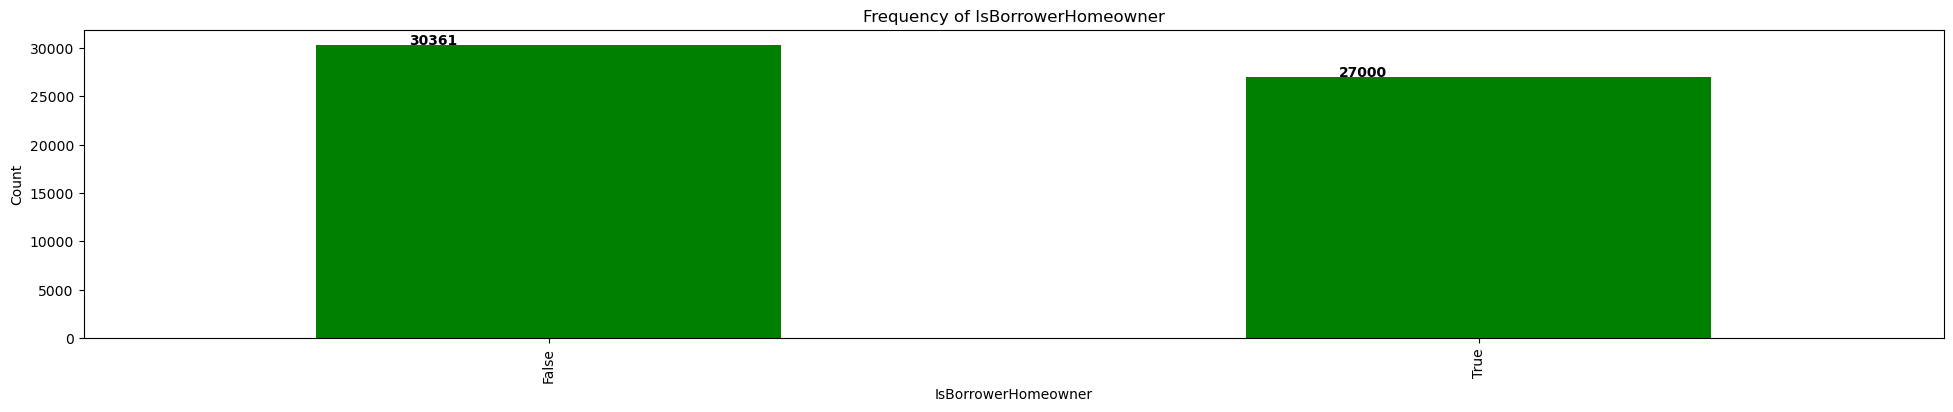

In [51]:
# Plotting the bar Graph for IsBorrowerHomeowner column
fig = plt.figure(figsize = (24,4))
count = cat_cols['IsBorrowerHomeowner'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IsBorrowerHomeowner")
plt.ylabel('Count')
plt.title('Frequency of IsBorrowerHomeowner')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

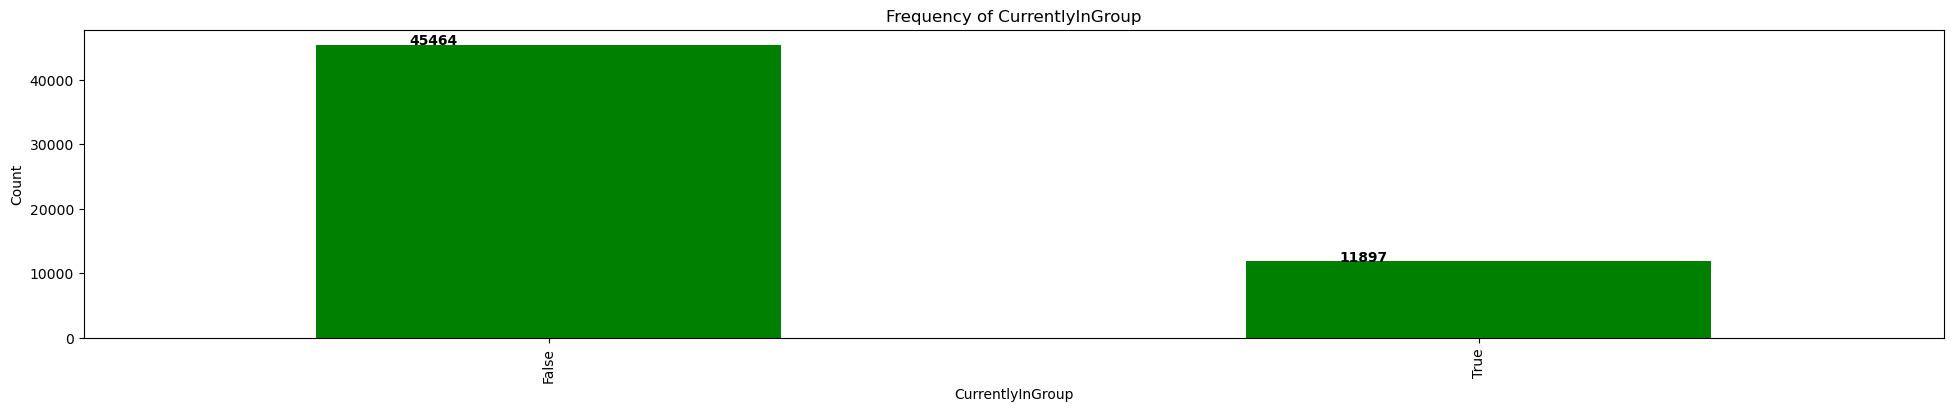

In [52]:
# Plotting the bar Graph for CurrentlyInGroup column
fig = plt.figure(figsize = (24,4))
count = cat_cols['CurrentlyInGroup'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("CurrentlyInGroup")
plt.ylabel('Count')
plt.title('Frequency of CurrentlyInGroup')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

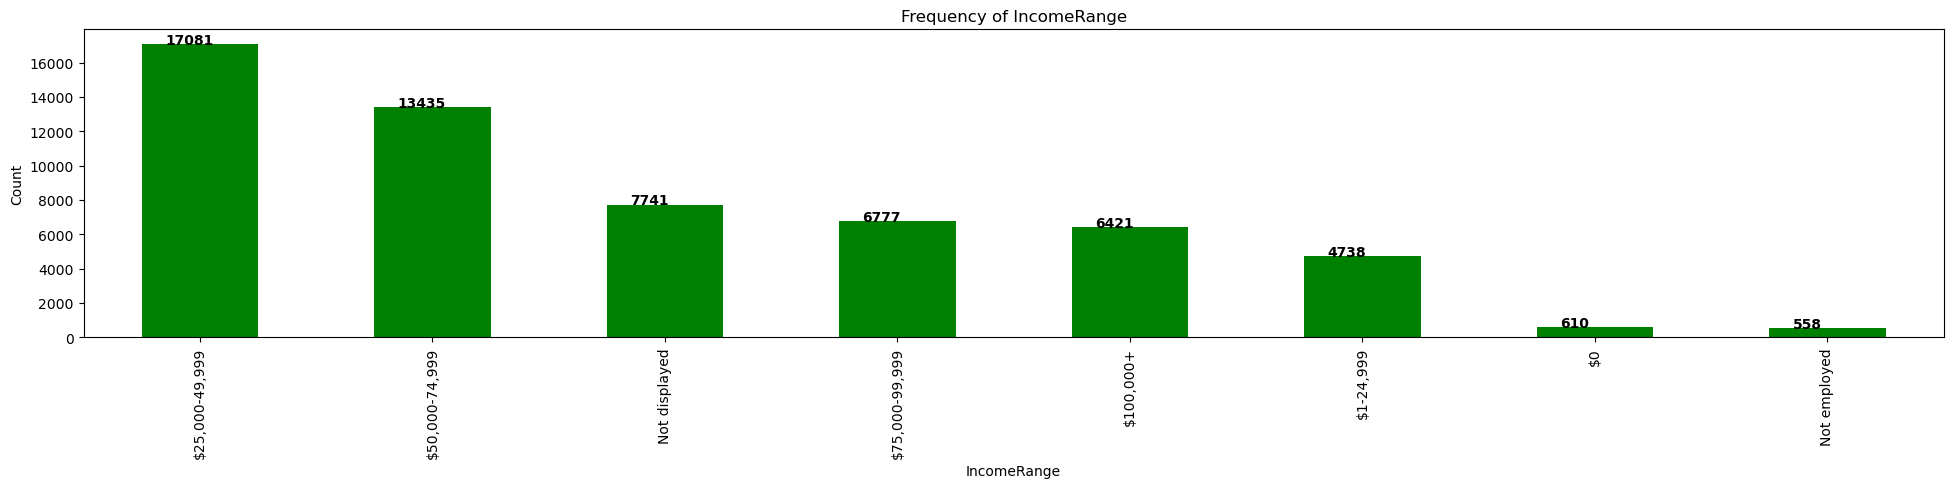

In [53]:
# Plotting the bar Graph for IncomeRange column
fig = plt.figure(figsize = (24,4))
count = cat_cols['IncomeRange'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IncomeRange")
plt.ylabel('Count')
plt.title('Frequency of IncomeRange')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

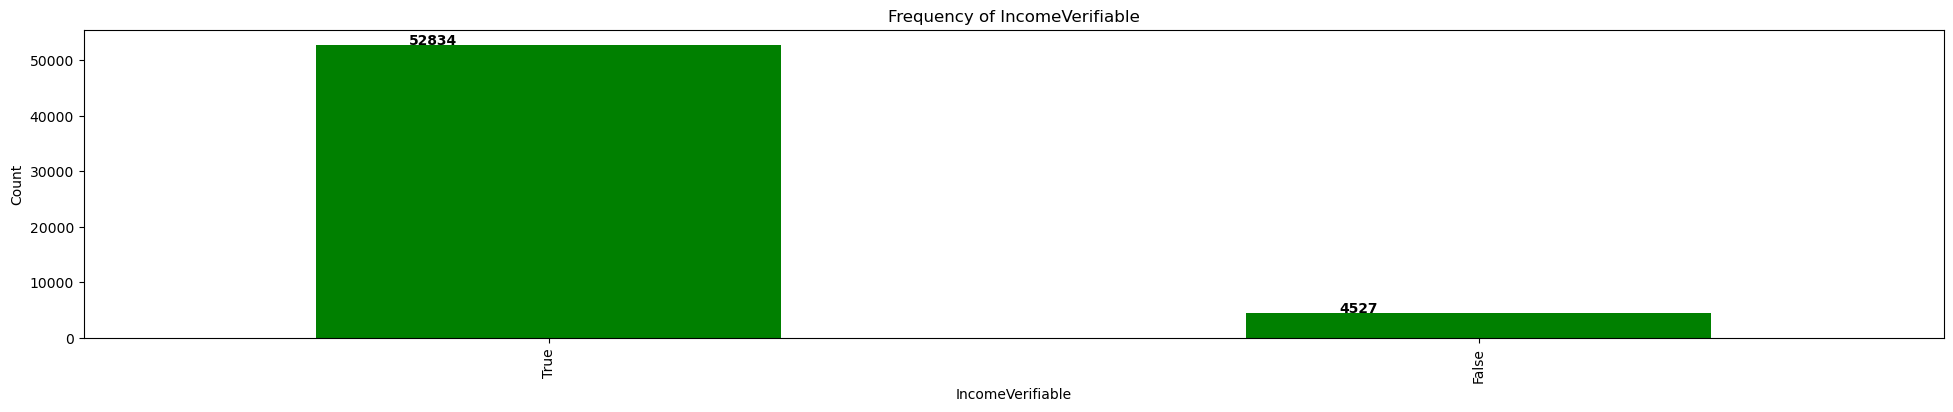

In [54]:
# Plotting the bar Graph for IncomeVerifiable column
fig = plt.figure(figsize = (24,4))
count = cat_cols['IncomeVerifiable'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IncomeVerifiable")
plt.ylabel('Count')
plt.title('Frequency of IncomeVerifiable')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

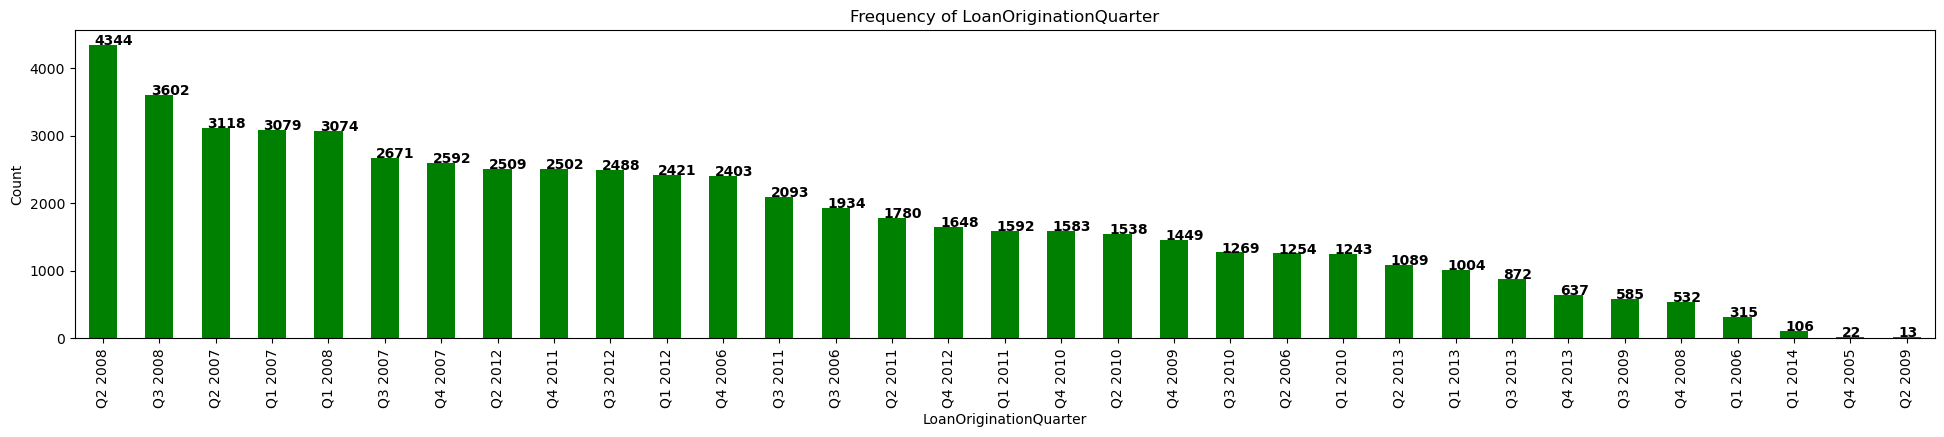

In [55]:
# Plotting the bar Graph for LoanOriginationQuarter column
fig = plt.figure(figsize = (24,4))
count = cat_cols['LoanOriginationQuarter'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("LoanOriginationQuarter")
plt.ylabel('Count')
plt.title('Frequency of LoanOriginationQuarter')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

## Bivariate Analysis

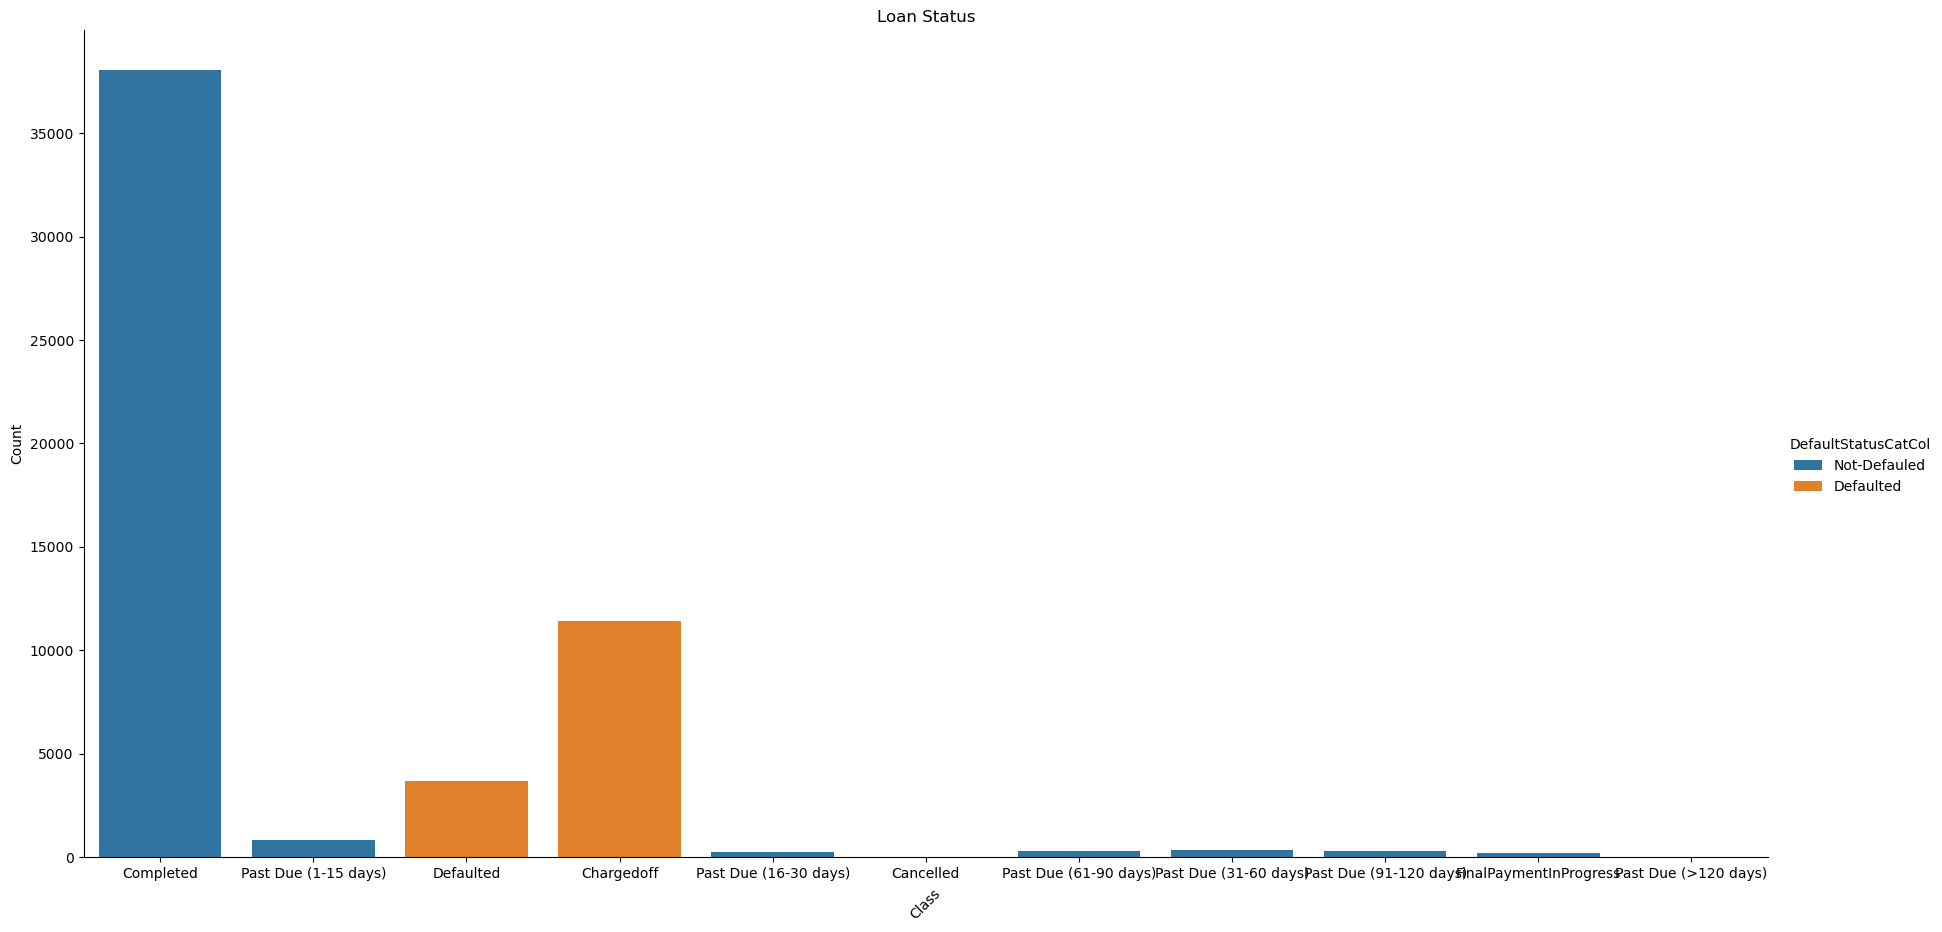

In [56]:
# Here we have the target variable on Y
# Plotting the Graph for LoanStatus and DefaultStatus columns
sns.catplot(x="LoanStatus", hue="DefaultStatusCatCol", kind="count", data=cat_cols, dodge=False, height=9, aspect=2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("Class", rotation=45)
plt.ylabel("Count")
plt.title("Loan Status")

# Display the plot
plt.show()

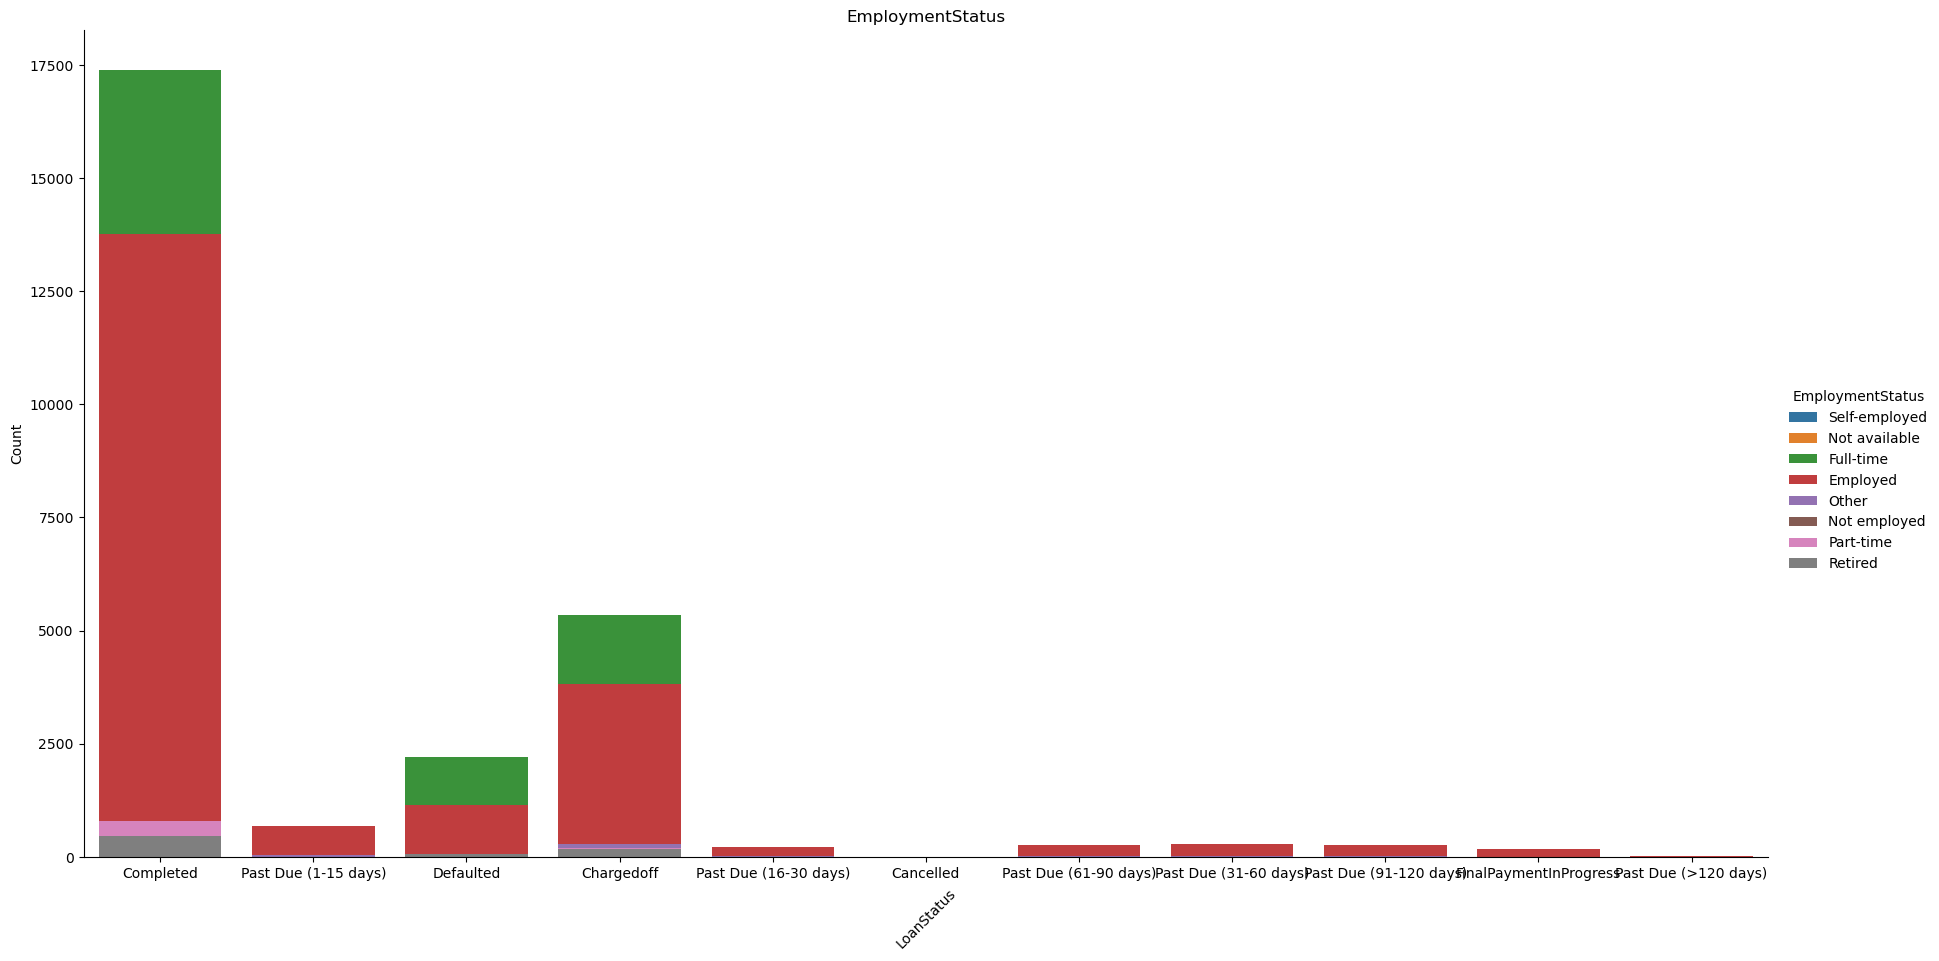

In [57]:
# Plotting the Graph for LoanStatus and EmploymentStatus columns
sns.catplot(x="LoanStatus", hue="EmploymentStatus", kind="count", data=cat_cols, dodge=False, height=9, aspect=2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("LoanStatus", rotation=45)
plt.ylabel("Count")
plt.title("EmploymentStatus")

# Display the plot
plt.show()

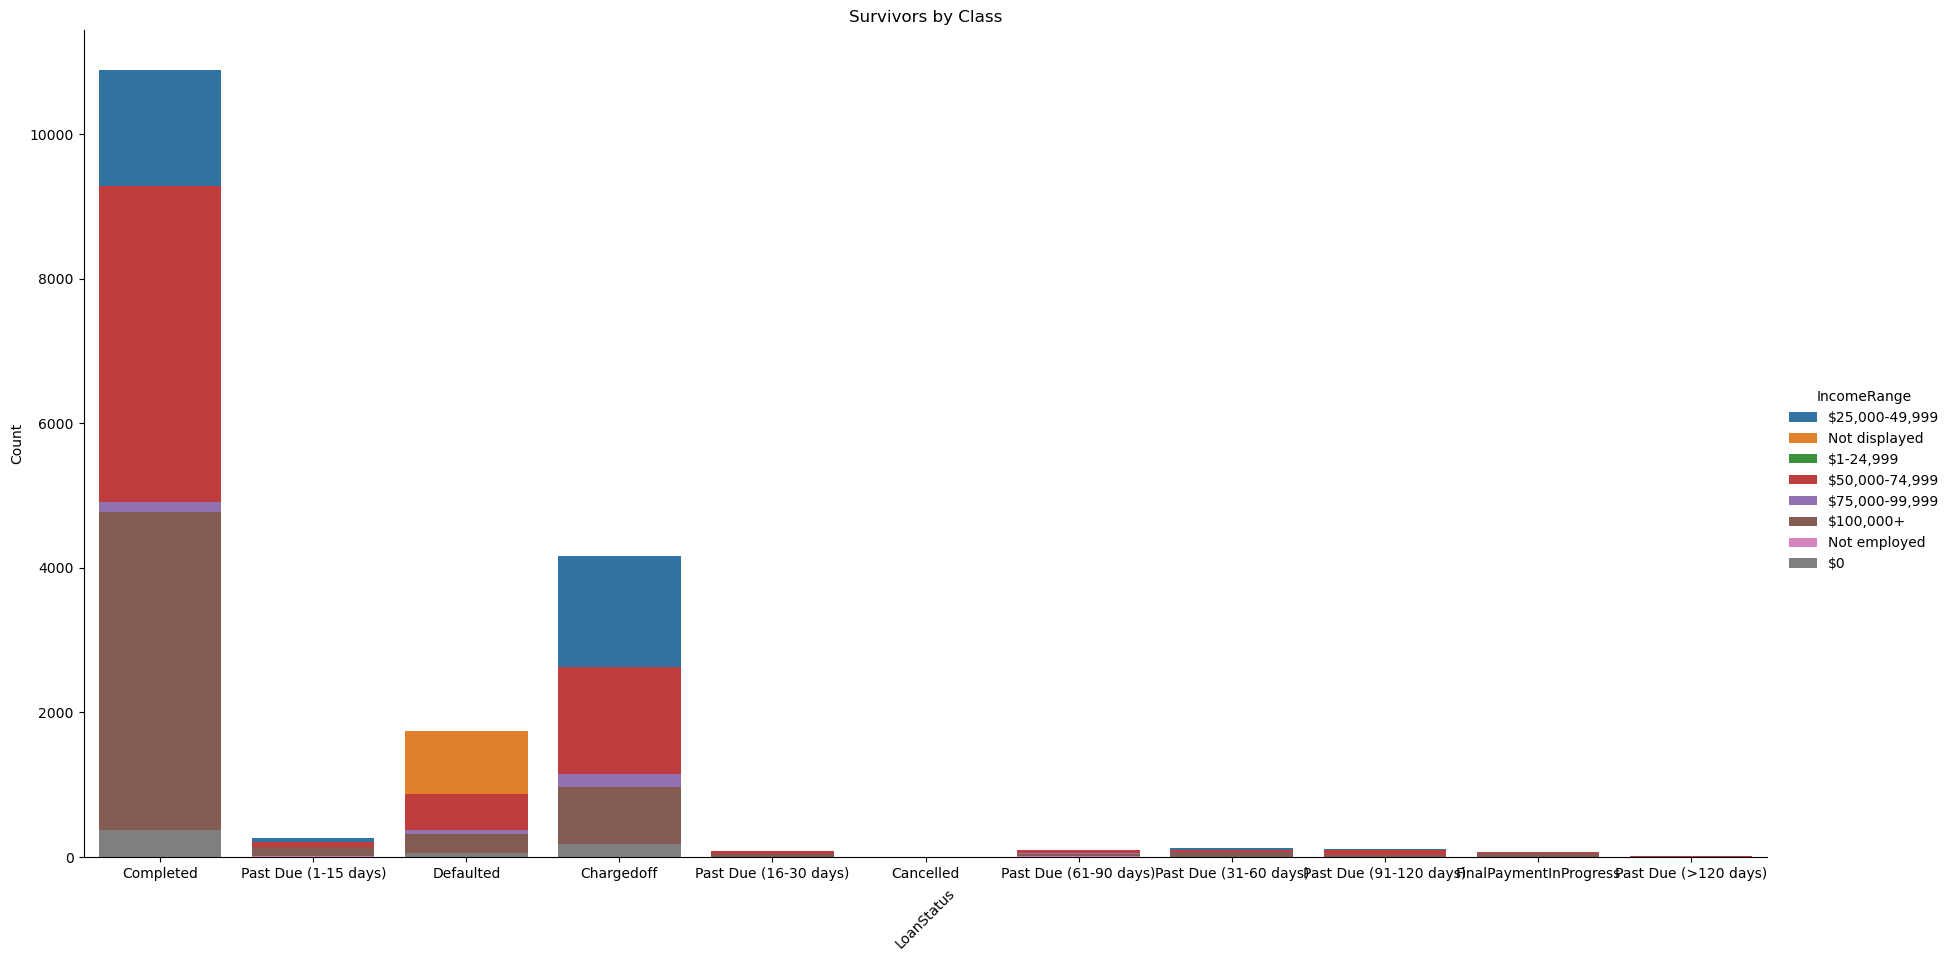

In [58]:
# Plotting the Graph for LoanStatus and IncomeRange columns
sns.catplot(x = "LoanStatus", hue = "IncomeRange", kind = "count", data = cat_cols, dodge = False, height = 9, aspect = 2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("LoanStatus", rotation=45)
plt.ylabel("Count")
plt.title("Survivors by Class")

# Display the plot
plt.show()

# Feature Engineering

In [ ]:
# Things to remember in feature eng
# 1.fill the missing values using simple imputer or knn
# 2.check the mutual information score and remove the unwanted variable
# 3.separate numerical and cat variable
# 4.do feature scaling for numerical data
# 5.do pca for numerical variable and encoding for cat variable
# 6.check the dependent variable is imbalanced or not and do smote if it is imbalanced

## Finding the mutual information score for numerical data set

In [60]:
num_cols.isna().sum()

Term                                   26159
BorrowerAPR                                3
BorrowerRate                               6
LenderYield                                6
EstimatedEffectiveYield                 5920
EstimatedLoss                           6306
EstimatedReturn                         3263
ProsperRating (numeric)                    0
ProsperScore                            2448
ListingCategory (numeric)              18319
EmploymentStatusDuration                6264
CreditScoreRangeLower                   7855
CreditScoreRangeUpper                   7855
CurrentCreditLines                      3193
OpenCreditLines                         2516
TotalCreditLinespast7years              1706
OpenRevolvingAccounts                   4481
OpenRevolvingMonthlyPayment             6743
InquiriesLast6Months                    5578
TotalInquiries                          7418
CurrentDelinquencies                   24195
AmountDelinquent                       24119
Delinquenc

In [61]:
# Filling the missig values
num_cols = num_cols.fillna(num_cols.mean())
num_cols.isnull().sum()

Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLas

## Calculating the Mututal Information Score

In [62]:
X = num_cols.drop('DefaultStatusNumCol', axis = 1)
y = num_cols['DefaultStatusNumCol']

# calculating mutual information score for each feature
mi_scores = mutual_info_regression(X,y)
mi_scores = pd.Series(mi_scores, name = 'MI_Scores', index = X.columns)
mi_scores = mi_scores.sort_values (ascending = False)
mi_scores

BorrowerAPR                            0.096396
EstimatedReturn                        0.094076
LoanMonthsSinceOrigination             0.093360
EstimatedEffectiveYield                0.090713
EstimatedLoss                          0.086009
BorrowerRate                           0.084583
LP_CustomerPrincipalPayments           0.080532
LenderYield                            0.077239
ProsperRating (numeric)                0.067619
MonthlyLoanPayment                     0.062268
ProsperScore                           0.057424
LP_CustomerPayments                    0.053473
CreditScoreRangeUpper                  0.034751
ListingCategory (numeric)              0.033672
Investors                              0.030157
CreditScoreRangeLower                  0.028889
TotalInquiries                         0.027491
ProsperPrincipalBorrowed               0.026004
AvailableBankcardCredit                0.025057
InquiriesLast6Months                   0.023893
LP_ServiceFees                         0

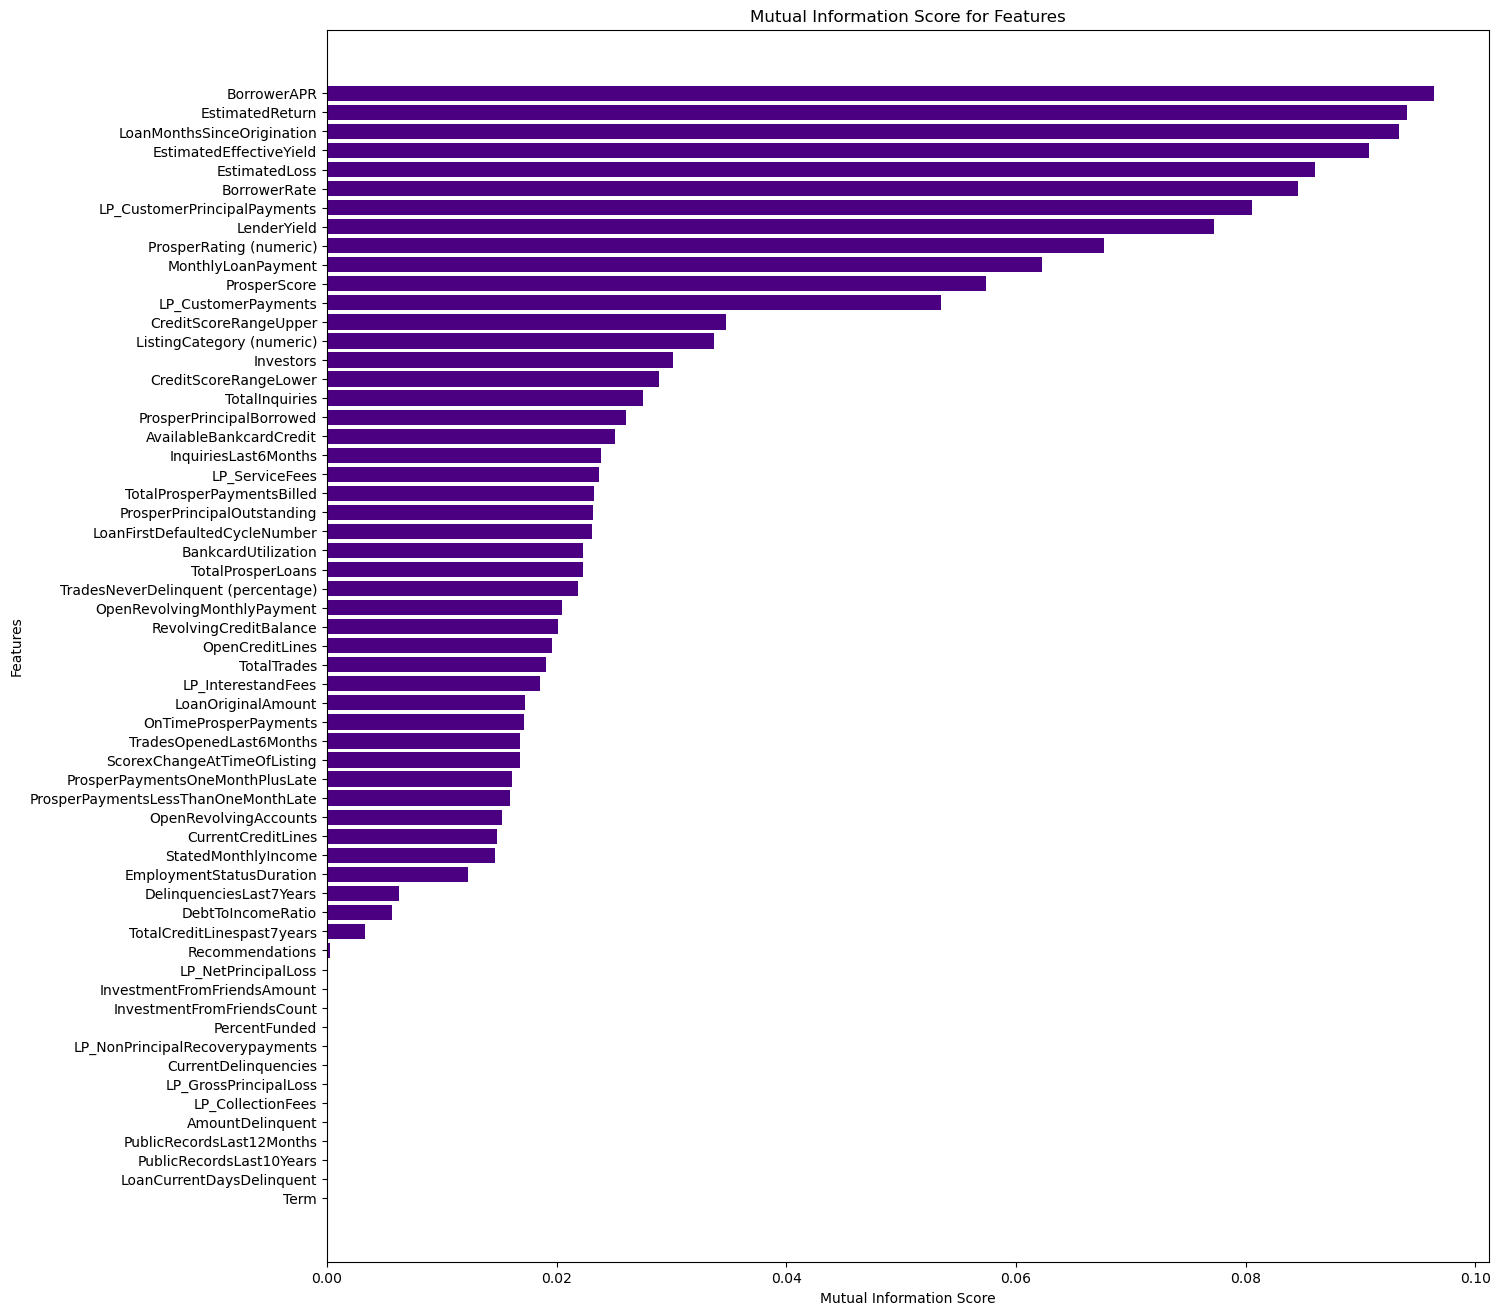

In [63]:
fig, ax = plt.subplots(figsize = (15,16))
mi_scores_sorted = mi_scores.iloc[::-1]
ax.barh(mi_scores_sorted.index, mi_scores_sorted.values, color = 'indigo')
ax.set_xlabel('Mutual Information Score')
ax.set_ylabel('Features')
ax.set_title('Mutual Information Score for Features')
plt.show()

In [64]:
# Choosing top 10 best features based on mi_score with respect to highest score
top_k = 10
top10_features = []

for feature, score in mi_scores.iteritems():
    if len(top10_features) < top_k:
        top10_features.append(feature)
    else:
        break

In [65]:
top10_features

['BorrowerAPR',
 'EstimatedReturn',
 'LoanMonthsSinceOrigination',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'BorrowerRate',
 'LP_CustomerPrincipalPayments',
 'LenderYield',
 'ProsperRating (numeric)',
 'MonthlyLoanPayment']

In [66]:
num_col_updated = num_cols[[
'EstimatedEffectiveYield',
'BorrowerAPR',
'EstimatedReturn',
'EstimatedLoss',
'LoanMonthsSinceOrigination',
'BorrowerRate',
'LenderYield',
'LP_CustomerPrincipalPayments',
'ProsperRating (numeric)',
'MonthlyLoanPayment', 
'DefaultStatusNumCol']]

In [67]:
print (num_cols.shape)
num_col_updated.shape

(113937, 60)


(113937, 11)

## Performing Feature Scaling on updated numerical values data

In [68]:
X = num_col_updated.drop('DefaultStatusNumCol', axis = 1)
y = num_col_updated['DefaultStatusNumCol']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [69]:
X_scaled

array([[ 1.14191747e-01, -6.67899469e-01,  5.34831722e-02, ...,
         9.73610817e-15, -6.15101410e-16,  4.89917431e-01],
       [-1.63290759e+00, -1.22800702e+00, -1.77011952e+00, ...,
        -1.03538226e+00,  1.33505417e+00,  4.16785542e-01],
       [ 1.14191747e-01,  7.94976972e-01,  5.34831722e-02, ...,
         4.24872165e-01, -6.15101410e-16, -8.27156086e-01],
       ...,
       [ 4.99044034e-01,  2.61630120e-01, -4.00046856e-01, ...,
        -9.46263436e-01, -7.42573689e-01,  1.26928892e-01],
       [ 1.60189939e+00,  8.12278072e-01,  1.08404311e-12, ...,
         9.73610817e-15, -5.00310686e-02,  1.24743661e+00],
       [-1.41496517e+00, -1.08200565e+00, -1.50077769e+00, ...,
        -1.01239092e+00,  1.33505417e+00, -1.19866608e+00]])

## Performing PCA to Scaled Data

In [70]:
# create a PCA object with the desired number of components
pca = PCA(n_components = 2)

# fit the PCA model to the scaled data
pca.fit(X_scaled)

# transform the data to the new principal component space
X_pca = pca.transform(X_scaled)

In [71]:
X_pca

array([[ 0.56617814,  1.15832373],
       [ 3.86368907, -1.42580658],
       [-1.32693898,  1.52226922],
       ...,
       [-0.93957138, -1.3721324 ],
       [-1.57294082, -0.72744869],
       [ 3.25271161, -0.85002841]])

## One Hot Encdoding on Categorical Columns Data Frame

In [73]:
# assume df is your categorical dataframe
oheCatCols = pd.get_dummies(cat_cols, drop_first=True)

# concatenate the encoded dataframe with the original dataframe
cat_col_concat = pd.concat([cat_cols, oheCatCols], axis=1)

In [74]:
print (cat_cols.shape)
print (oheCatCols.shape)
print (cat_col_concat.shape)

(57361, 12)
(57361, 146)
(57361, 158)
